# Project Chicago: Transform ResStock UPGRADE Results to 15 SFD prototypes (Elevate Energy)
Created on: 12/15/2020 \
By: Lixi Liu (Lixi.Liu@nrel.gov)

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
print(f'Notebook path: {os.getcwd()}')

Notebook path: /Users/lliu2/Documents/GitHub/resstock/files


### Download results online
* unprocessed upgrade results: S3/resbldg-datasets/chicagoeui
* processed result tables for plots: https://nrel.sharepoint.com/sites/ChicagoRetrofits/Shared%20Documents/Forms/AllItems.aspx?viewid=289cdd1a%2D97c9%2D4bcc%2D8416%2Dc19bf01c6302&id=%2Fsites%2FChicagoRetrofits%2FShared%20Documents%2FGeneral%2FUpgrade%20results

### Initialize
For modifying plots, can go directly to section 2.3 after initialization

In [37]:
# local path to downloaded results
iteration = '01' # <----- options: '01'
iter_path = f'cookcnty_upgrades_{iteration}'
result_dir = '/Users/lliu2/Documents/Chicago retrofits/ResStock results'
result_path = os.path.join(result_dir,iter_path)

## create folder for post-processed results:
if not os.path.exists(os.path.join(result_path, 'processed results')):
    os.mkdir(os.path.join(result_path, 'processed results'))
    
## create folder for exported baseline and upgrade results to csv (to share with Elevate):
combined_res_csv_path = os.path.join(result_path, 'processed results', 'raw combined csvs')
if not os.path.exists(combined_res_csv_path):
    os.mkdir(combined_res_csv_path)
    
## create folder for plots:
plot_path = os.path.join(result_path, 'processed results', 'plots')
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

print(f'Result path: \n   {result_path}')


Result path: 
   /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02b


### Functions

In [38]:
def add_sqft_eui(df):
    global res
    sqft_map = {'0-499': 328,
                '500-749': 633,
                '750-999': 885,
                '1000-1499': 1220,
                '1500-1999': 1690,
                '2000-2499': 2176,
                '2500-2999': 2663,
                '3000-3999': 3301,
                '4000+': 8194}

    df['sqft'] = res['build_existing_model.geometry_floor_area'].map(sqft_map)
    df['gas_eui'] = df['simulation_output_report.total_site_natural_gas_therm'].divide(df['sqft']) # therm/sqft
    df['elec_eui'] = df['simulation_output_report.total_site_electricity_kwh'].divide(df['sqft']) # kwh/sqft
    df['site_eui'] = df['simulation_output_report.total_site_energy_mbtu'].divide(df['sqft'])*1000 # kbtu/sqft
    
    return df

print('func loaded: "add_sqft_eui"')

def get_res_by_prototype(df, slice_by_df, row):
    """
    df: df to slice on
    slice_by_df: df used to do the slicing
    """
    res_group_i = df[slice_by_df['build_existing_model.geometry_stories'].isin(row['Stories'].split(',')) & \
        slice_by_df['build_existing_model.geometry_wall_type'].isin(row['WallType'].split(',')) & \
        slice_by_df['build_existing_model.vintage_acs'].isin(row['Vintage'].split(',')) & \
        slice_by_df['build_existing_model.geometry_building_type_recs'].isin(['Single-Family Detached'])]
    res_group_i = res_group_i[res_group_i['completed_status']=="Success"]
    
    return res_group_i

print('func loaded: "get_res_by_prototype"')

func loaded: "add_sqft_eui"
func loaded: "get_res_by_prototype"


### 1. BASELINE results

In [39]:
save_a_copy_in_csv = True # <-----
res = pd.read_parquet(os.path.join(result_path,'baseline','results_up00.parquet'))

# (1) get sqft, gas/elec/site eui
res = add_sqft_eui(res)

if save_a_copy_in_csv:
    res.to_csv(os.path.join(combined_res_csv_path,'results_baseline.csv'), index=False)
res

building_id  job_id          started_at        completed_at  \
0                1      53 2021-01-17 20:36:44 2021-01-17 20:38:13   
1                2     153 2021-01-17 20:30:21 2021-01-17 20:31:58   
2                3     133 2021-01-17 20:32:11 2021-01-17 20:33:39   
3                4     159 2021-01-17 12:47:05 2021-01-17 12:48:28   
4                5     121 2021-01-17 10:29:06 2021-01-17 10:30:23   
...            ...     ...                 ...                 ...   
37531        37532     120 2021-01-17 20:45:38 2021-01-17 20:52:58   
37532        37533      99 2021-01-17 10:18:07 2021-01-17 11:03:35   
37533        37534     152 2021-01-17 21:41:45 2021-01-17 21:56:08   
37534        37535      63 2021-01-17 10:24:35 2021-01-17 10:35:20   
37535        37536     198 2021-01-17 11:51:13 2021-01-17 12:43:14   

      completed_status apply_upgrade.applicable apply_upgrade.upgrade_name  \
0              Success                     None                       None   
1              Success                     None                       None   
2              Success                     None                       None   
3              Success                     None                       None   
4              Success                     None                       None   
...                ...                      ...                        ...   
37531          Success                     None                       None   
37532          Success                     None                       None   
37533          Success                     None                       None   
37534          Success                     None                       None   
37535          Success                     None                       None   

      apply_upgrade.reference_scenario  \
0                                        
1                                        
2                                        
3                                        
4                                        
...                                ...   
37531                                    
37532                                    
37533                                    
37534                                    
37535                                    

               build_existing_model.ahs_region  \
0      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
1      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
2      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
3      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
4      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
...                                        ...   
37531  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37532  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37533  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37534  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37535  CBSA Chicago-Naperville-Elgin, IL-IN-WI   

      build_existing_model.applicable  ...  \
0                                True  ...   
1                                True  ...   
2                                True  ...   
3                                True  ...   
4                                True  ...   
...                               ...  ...   
37531                            True  ...   
37532                            True  ...   
37533                            True  ...   
37534                            True  ...   
37535                            True  ...   

      qoi_report.average_of_top_ten_highest_peaks_timing_cooling_hour  \
0                                              16.909091                
1                                              14.727273                
2                                              16.272727                
3                                              16.272727                
4                                              16.272727                
...                                                  ...                
37531                                          14.454545   

In [40]:
# assign heating/cooling
cooling_col = 'build_existing_model.hvac_cooling_type'
heating_col = 'build_existing_model.hvac_heating_type_and_fuel'
print('selected')

# if using a national run
if iteration == '_national_2018':
    res = res[res['build_existing_model.ahs_region']=='CBSA Chicago-Naperville-Elgin, IL-IN-WI'].reset_index(drop=True)
    res
    

selected


### 1.1. Check housing charateristics distributions in BASELINE

In [41]:
proto_chars = ['build_existing_model.geometry_stories',
              'build_existing_model.geometry_wall_type',
              'build_existing_model.vintage_acs',
              cooling_col,
              heating_col,
              'build_existing_model.geometry_floor_area'
             ]

Ns = len(res.query('completed_status=="Success"')); N = len(res)
print(f'>>> ResStock - {iter_path} - BASELINE result summary:\n')
print(f'  * {Ns} / {N} samples ran successfully, {N-Ns} failed, efficacy: {Ns/N:.1%} \n')

print('>>> Housing characteristics splits:\n')

Res_char = []
for i, char in enumerate(proto_chars,1):
    Nchar = res.groupby(char)['building_id'].count()
    Nchar = Nchar/Ns
    Nchar['N_failed'] = len(res[res[char].isnull()])
    print(f'  * [{i}] {Nchar}\n')
    
    ## append for export
    Nchar = Nchar.rename('fraction').to_frame()
    Nchar['housing_char'] = Nchar.index.name
    Res_char.append(Nchar)
    
Res_char = pd.concat(Res_char, axis=0)
Res_char.index.name = 'sub_char'
Res_char = Res_char.reset_index()
Res_char = Res_char[['housing_char','sub_char','fraction']]

Res_char.to_csv(os.path.join(result_path, 'baseline', 'baseline_housing_char_breakdown.csv'), index=False)
print(f'>>> file saved to:\n  {os.path.join(result_path, "baseline")}')

>>> ResStock - cookcnty_upgrades_02b - BASELINE result summary:

  * 37512 / 37536 samples ran successfully, 24 failed, efficacy: 99.9% 

>>> Housing characteristics splits:

  * [1] build_existing_model.geometry_stories
1            0.528151
2            0.247254
3            0.224595
N_failed    24.000000
Name: building_id, dtype: float64

  * [2] build_existing_model.geometry_wall_type
Masonry      0.728967
WoodStud     0.271033
N_failed    24.000000
Name: building_id, dtype: float64

  * [3] build_existing_model.vintage_acs
1940-59      0.241523
1960-79      0.255838
1980-99      0.123640
2000-09      0.070351
2010s        0.011490
<1940        0.297158
N_failed    24.000000
Name: building_id, dtype: float64

  * [4] build_existing_model.hvac_cooling_type
Central AC     0.604047
Heat Pump      0.025645
None           0.053903
Room AC        0.316405
N_failed      24.000000
Name: building_id, dtype: float64

  * [5] build_existing_model.hvac_heating_type_and_fuel
Electricity ASHP   

### 1.2. Add additional metrics to Baseline

In [42]:
# (2) aggregate heating and cooling end uses in ResStock results
res['total_gas_heating'] = res['simulation_output_report.natural_gas_central_system_heating_therm'] +\
    res['simulation_output_report.natural_gas_heating_therm']

res['total_elec_heating'] = res['simulation_output_report.electricity_central_system_heating_kwh'] +\
    res['simulation_output_report.electricity_central_system_pumps_heating_kwh'] +\
    res['simulation_output_report.electricity_fans_heating_kwh'] +\
    res['simulation_output_report.electricity_heating_kwh'] +\
    res['simulation_output_report.electricity_pumps_heating_kwh']

res['total_elec_cooling'] = res['simulation_output_report.electricity_central_system_cooling_kwh'] +\
    res['simulation_output_report.electricity_central_system_pumps_cooling_kwh'] +\
    res['simulation_output_report.electricity_cooling_kwh'] +\
    res['simulation_output_report.electricity_fans_cooling_kwh'] +\
    res['simulation_output_report.electricity_pumps_cooling_kwh']

## EE prototype tags
res['vintage_ee'] = '3: post-1978'
res.loc[res['build_existing_model.vintage_acs'].isin(['1940-59','1960-79']),'vintage_ee'] = '2: 1942-1978'
res.loc[res['build_existing_model.vintage_acs']=='<1940','vintage_ee'] = '1: pre-1942'

res['stories'] = '2: 2+ stories'
res.loc[res['build_existing_model.geometry_stories']=='1','stories'] = '1: <2 stories'

print('new cols added to "res"')
res

new cols added to "res"


building_id  job_id          started_at        completed_at  \
0                1      53 2021-01-17 20:36:44 2021-01-17 20:38:13   
1                2     153 2021-01-17 20:30:21 2021-01-17 20:31:58   
2                3     133 2021-01-17 20:32:11 2021-01-17 20:33:39   
3                4     159 2021-01-17 12:47:05 2021-01-17 12:48:28   
4                5     121 2021-01-17 10:29:06 2021-01-17 10:30:23   
...            ...     ...                 ...                 ...   
37531        37532     120 2021-01-17 20:45:38 2021-01-17 20:52:58   
37532        37533      99 2021-01-17 10:18:07 2021-01-17 11:03:35   
37533        37534     152 2021-01-17 21:41:45 2021-01-17 21:56:08   
37534        37535      63 2021-01-17 10:24:35 2021-01-17 10:35:20   
37535        37536     198 2021-01-17 11:51:13 2021-01-17 12:43:14   

      completed_status apply_upgrade.applicable apply_upgrade.upgrade_name  \
0              Success                     None                       None   
1              Success                     None                       None   
2              Success                     None                       None   
3              Success                     None                       None   
4              Success                     None                       None   
...                ...                      ...                        ...   
37531          Success                     None                       None   
37532          Success                     None                       None   
37533          Success                     None                       None   
37534          Success                     None                       None   
37535          Success                     None                       None   

      apply_upgrade.reference_scenario  \
0                                        
1                                        
2                                        
3                                        
4                                        
...                                ...   
37531                                    
37532                                    
37533                                    
37534                                    
37535                                    

               build_existing_model.ahs_region  \
0      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
1      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
2      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
3      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
4      CBSA Chicago-Naperville-Elgin, IL-IN-WI   
...                                        ...   
37531  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37532  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37533  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37534  CBSA Chicago-Naperville-Elgin, IL-IN-WI   
37535  CBSA Chicago-Naperville-Elgin, IL-IN-WI   

      build_existing_model.applicable  ... qoi_report.peak_magnitude_use_kw  \
0                                True  ...                        20.743684   
1                                True  ...                        21.032739   
2                                True  ...                        17.635847   
3                                True  ...                        13.289626   
4                                True  ...                        32.823039   
...                               ...  ...                              ...   
37531                            True  ...                       303.681271   
37532                            True  ...                      1100.880575   
37533                            True  ...                      1009.142840   
37534                            True  ...                       926.759680   
37535                            True  ...                       569.953390   

         sqft    gas_eui     elec_eui     site_eui total_gas_heating  \
0       885.0   1.147362    11.142590   152.728881        642.139144   
1      3301.0   0.456519     3

### 1.3. Get BASELINE results by building prototypes from Elevate Energy
#### Note: cannot add prototype tags directly to ResStock results as prototypes overlap in chars

In [43]:
## Load prototype csv
groups = pd.read_csv(os.path.join(result_dir,'Groups.csv'))
print('prototypes loaded')


prototypes loaded


In [44]:
### (1) get count & median consumption
Metric_map1 = {'count': 'completed_status',
           'median gas': 'simulation_output_report.total_site_natural_gas_therm',
           'median elec': 'simulation_output_report.total_site_electricity_kwh'}

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map1.items():
        if metric == 'count':
            groups.loc[i, 'count'] = len(res_group_i)
        else:
            groups.loc[i, metric] = res_group_i[res_var].median()

groups['Gas Diff-med(%)'] = ((groups['Non-normalized gas usage'] - groups['median gas']) / groups['Non-normalized gas usage']) * 100
groups['Elec Diff-med(%)'] = ((groups['Non-normalized elec. usage'] - groups['median elec']) / groups['Non-normalized elec. usage']) * 100
print('>> (1) median consumption computed')


>> (1) median consumption computed


In [45]:
### (2) get mean consumption
Metric_map2 = {'mean gas': 'simulation_output_report.total_site_natural_gas_therm',
           'mean elec': 'simulation_output_report.total_site_electricity_kwh'} # metric: res_var

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

groups['Gas Diff-mean(%)'] = ((groups['Non-normalized gas usage'] - groups['mean gas']) / groups['Non-normalized gas usage']) * 100
groups['Elec Diff-mean(%)'] = ((groups['Non-normalized elec. usage'] - groups['mean elec']) / groups['Non-normalized elec. usage']) * 100
print('>> (2) mean consumption computed')


>> (2) mean consumption computed


In [46]:
### (3) get median & mean sqft & eui
Metric_map1 = {'median sqft': 'sqft',
               'median gas eui': 'gas_eui', 
               'median elec eui': 'elec_eui'}
Metric_map2 = {'mean sqft': 'sqft', 
               'mean gas eui': 'gas_eui', 
               'mean elec eui': 'elec_eui'}

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    ### (3.1) get median values
    for metric, res_var in Metric_map1.items():
        groups.loc[i, metric] = res_group_i[res_var].median()

    ### (3.2) get mean values
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = \
            res_group_i[res_var].mean()

print('>> (3) median & mean sqft & eui computed:');

groups.set_index(['HousingGroupNo','HousingGroupName'])[['median sqft', 'mean sqft',
                                                         'median gas','mean gas',
                                                         'median gas eui', 'mean gas eui', 
                                                         'median elec','mean elec', 
                                                         'median elec eui','mean elec eui']]


>> (3) median & mean sqft & eui computed:


median sqft  \
HousingGroupNo HousingGroupName                                     
1              Masonry Post-1978 less than 2 stories       2176.0   
2              Masonry All Years Split Level               1690.0   
3              Masonry Post-1978 2 or more stories         3301.0   
4              Masonry 1942-1978 Less than 2 Stories       1690.0   
5              Masonry 1942-1978 2 or more stories         2176.0   
6              Masonry Pre-1942 less than 2 stories        1220.0   
7              Masonry Pre-1942 2 or more stories          2176.0   
8              Frame Post-1978 Less than 2 stories         2176.0   
9              Frame Post-1978 Split Level                 2176.0   
10             Frame Post-1978 2 or more stories           2663.0   
11             Frame 1942-1978 less than 2 stories         1690.0   
12             Frame Pre-1942 Split Level                  1690.0   
13             Frame 1942-1978 2 or more stories           1690.0   
14             Frame Pre-1942 less than 2 stories          1220.0   
15             Frame Pre-1942 2 or more stories            2176.0   

                                                        mean sqft  \
HousingGroupNo HousingGroupName                                     
1              Masonry Post-1978 less than 2 stories  2394.582482   
2              Masonry All Years Split Level          2000.196867   
3              Masonry Post-1978 2 or more stories    4058.270428   
4              Masonry 1942-1978 Less than 2 Stories  1680.132653   
5              Masonry 1942-1978 2 or more stories    2392.638539   
6              Masonry Pre-1942 less than 2 stories   1460.060606   
7              Masonry Pre-1942 2 or more stories     2552.909881   
8              Frame Post-1978 Less than 2 stories    2243.300336   
9              Frame Post-1978 Split Level            3012.053452   
10             Frame Post-1978 2 or more stories      3622.142477   
11             Frame 1942-1978 less than 2 stories    1690.260624   
12             Frame Pre-1942 Split Level             2020.515977   
13             Frame 1942-1978 2 or more stories      2276.806678   
14             Frame Pre-1942 less than 2 stories     1402.300142   
15             Frame Pre-1942 2 or more stories       2325.502456   

                                                       median gas  \
HousingGroupNo HousingGroupName                                     
1              Masonry Post-1978 less than 2 stories   814.176472   
2              Masonry All Years Split Level          1160.188446   
3              Masonry Post-1978 2 or more stories    1331.608504   
4              Masonry 1942-1978 Less than 2 Stories  1041.965863   
5              Masonry 1942-1978 2 or more stories    1585.851757   
6              Masonry Pre-1942 less than 2 stories   1362.174432   
7              Masonry Pre-1942 2 or more stories     1818.719734   
8              Frame Post-1978 Less than 2 stories     857.015417   
9              Frame Post-1978 Split Level            1098.217867   
10             Frame Post-1978 2 or more stories      1341.786474   
11             Frame 1942-1978 less than 2 stories    1106.606380   
12             Frame Pre-1942 Split Level             1797.643113   
13             Frame 1942-1978 2 or more stories      1690.251095   
14             Frame Pre-1942 less than 2 stories     1417.258296   
15             Frame Pre-1942 2 or more stories       1965.872884   

                                                         mean gas  \
HousingGroupNo HousingGroupName                                     
1              Masonry Post-1978 less than 2 stories   896.130592   
2              Masonry All Years Split Level          1286.125138   
3              Masonry Post-1978 2 or more stories    1366.546562   
4              Masonry 1942-1978 Less than 2 Stories  1136.678088   
5              Masonry 1942-1978 2 or more stories    1670.642537   
6              Masonry Pre-1942 less than 2 stori

In [47]:
### (4) optional - get heating and cooling end uses to "groups"
Metric_map1 = ['frac_gas_heating', 'frac_elec_heating', 'frac_elec_cooling']
Metric_map2 = {'size_heating_kbut_h': 'simulation_output_report.size_heating_system_kbtu_h',
               'size_cooling_kbut_h': 'simulation_output_report.size_cooling_system_kbtu_h'}


for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row)
    
    ### (4.1) get fractions
    groups.loc[i, 'frac_gas_heating'] = res_group_i['total_gas_heating'].mean() / \
        res_group_i['simulation_output_report.total_site_natural_gas_therm'].mean()

    groups.loc[i, 'frac_elec_heating'] = res_group_i['total_elec_heating'].mean() / \
        res_group_i['simulation_output_report.total_site_electricity_kwh'].mean()
    
    groups.loc[i, 'frac_elec_cooling'] = res_group_i['total_elec_cooling'].mean() / \
        res_group_i['simulation_output_report.total_site_electricity_kwh'].mean()
    
    ### (4.2) get mean values
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

print('(4) heating and cooling end uses computed')

(4) heating and cooling end uses computed


In [48]:
### (5) optional - get heating & cooling and floor area char breakdowns
House = []
House_chars = [cooling_col, heating_col,
              #'build_existing_model.geometry_floor_area',
              'build_existing_model.insulation_unfinished_attic']

for i, row in groups.iterrows():
    
    res_group_i = get_res_by_prototype(res, res, row)
    
    Ns = len(res_group_i)
    Hi = []
    for char in House_chars:
        Nchar = res_group_i.groupby(char)['building_id'].count()/Ns # fractions
        Nchar = Nchar.rename('fraction').to_frame()
        Nchar['housing_char'] = Nchar.index.name
        Hi.append(Nchar)
    
    Hi = pd.concat(Hi, axis=0)
    Hi.index.name = 'sub_char'
    Hi = Hi.reset_index()
    Hi['HousingGroupNo'] = row['HousingGroupNo']
    
    House.append(Hi)
    
House = pd.concat(House, axis=0)
House = pd.pivot_table(House, values='fraction', index=['HousingGroupNo'],
                    columns=['housing_char','sub_char'], aggfunc=np.sum)

print('(5) heating & cooling and floor area char breakdowns computed')

(5) heating & cooling and floor area char breakdowns computed


In [49]:
### Combine "groups" + "House" into "Out" for export
out = groups.drop(['Stories','WallType','Vintage'], axis=1)
out = pd.concat([out.set_index('HousingGroupNo')], axis=1, keys=['none']).join(House)

out

none                     \
                                     HousingGroupName Chicago Prevalence   
HousingGroupNo                                                             
1               Masonry Post-1978 less than 2 stories           0.009009   
2                       Masonry All Years Split Level           0.012012   
3                 Masonry Post-1978 2 or more stories           0.044044   
4               Masonry 1942-1978 Less than 2 Stories           0.235235   
5                 Masonry 1942-1978 2 or more stories           0.072072   
6                Masonry Pre-1942 less than 2 stories           0.160160   
7                  Masonry Pre-1942 2 or more stories           0.041041   
8                 Frame Post-1978 Less than 2 stories           0.001001   
9                         Frame Post-1978 Split Level           0.004004   
10                  Frame Post-1978 2 or more stories           0.025025   
11                Frame 1942-1978 less than 2 stories           0.082082   
12                         Frame Pre-1942 Split Level           0.014014   
13                  Frame 1942-1978 2 or more stories           0.023023   
14                 Frame Pre-1942 less than 2 stories           0.218218   
15                   Frame Pre-1942 2 or more stories           0.059059   

                                                              \
               Cook Cnty Prevalence Non-normalized gas usage   
HousingGroupNo                                                 
1                          0.012987                     1133   
2                          0.019980                     1416   
3                          0.032967                     1812   
4                          0.191808                     1210   
5                          0.045954                     1427   
6                          0.073926                     1504   
7                          0.021978                     2044   
8                          0.015984                     1054   
9                          0.021978                     1168   
10                         0.087912                     1422   
11                         0.183816                     1176   
12                         0.064935                     1297   
13                         0.066933                     1530   
14                         0.109890                     1340   
15                         0.048951                     1753   

                                                                              \
               Non-normalized elec. usage   count   median gas   median elec   
HousingGroupNo                                                                 
1                                   10282   685.0   814.176472   8455.592702   
2                                    9661  9128.0  1160.188446   8691.571327   
3                                   18225   514.0  1331.608504  11165.891658   
4                                    8779  5488.0  1041.965863   8219.999688   
5                                   10549   794.0  1585.851757   9836.595132   
6                                    9299   726.0  1362.174432   8385.192118   
7                                   13272   921.0  1818.719734  10400.016137   
8                                    9353   596.0   857.015417   8409.295904   
9                                   10445  1347.0  1098.217867   9431.754031   
10                                  13495   751.0  1341.786474  10584.482546   
11                                   9213  3012.0  1106.606380   8094.493818   
12                                   9964  2128.0  1797.643113   9418.223412   
13                                  12543  1138.0  1690.251095   9622.460944   
14                                   9103   703.0  1417.258296   8167.086510   
15                                  11967  1425.0  1965.872884  10003.147122   

                                                 ...  \
               Gas Diff-med(%)

In [50]:
### export BASELINE prototype summary
out.to_csv(os.path.join(result_path, 'baseline', 'baseline_prototype_results.csv'), index=True)
print(f'BASELINE prototype summary saved to:\n  {os.path.join(result_path, "baseline")}')


BASELINE prototype summary saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02b/baseline


## 2. UPGRADE summary ###

In [51]:
### set utility rates ###
NG_rate_multiplier = 1 # <-----

if NG_rate_multiplier > 1:
    fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
else:
    fn_ext = ''

### utility rates ###########################################
# ref (EIA): 
# avg ComEd res elec rate 2019: $ 0.1330 /kWh
# weighted avg IL gas rate 2019: $ 0.77183 /therm

## electricity ##
# annual fixed rates = monthly x 12
EH_fixed = 15.70 * 12 # annual
NEH_fixed = 14.28 *12 # annual
# avg of summer rates (J,J,A,S) and non-summer rates
EH_rate = (0.10273*4+0.10952*8)/12 # 0.08019, $/kWh, electric rate for electric heating customers
NEH_rate = (0.12168*4+0.12847*8)/12 # 0.09889, $/kWh, electric rate for non-electric heating customers
# marginal carbon emission factor:
elec_CO2_rate = 0.000834702 # metric tons of CO2e/kWh

## gas ##
# annual fixed rates = monthly x 12
GH_fixed = 45.32 
NGH_fixed = 21.51 
# variable rates
GH_rate = 0.61648 * NG_rate_multiplier # 0.19477, $/therm, gas rate for NG heating customers
NGH_rate = 0.56758 * NG_rate_multiplier # 0.14964, $/therm, gas rate for non-NG heating customers
# marginal carbon emission factor:
gas_CO2_rate = 0.00532181 # metric tons of CO2e/therm


### upgrades that will cause utility rate change: ###########################################
HVAC_upgrades_rate_change = {
    24: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # SEER 15 ASHP
    25: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # SEER 22 ASHP
    27: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Room AC to Heat Pump
    28: [GH_rate, GH_fixed,  NEH_rate, NEH_fixed], # EnergyStar 96% AFUE Natural Gas Furnace
    29: [GH_rate, GH_fixed,  NEH_rate, NEH_fixed], # EnergyStar Natural Gas Boiler
    30: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Electric Furnace to Heat Pump, High Eff
    31: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Electric Furnace to Heat Pump, Min Eff
    32: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-ducted Electric to MSHP
    33: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-ducted Non-electric to MSHP
    34: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-electric Furnace to Heat Pump, High Eff
    35: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-electric Furnace to Heat Pump, Min Eff
}

# assign rates accordingly
Elec_heating_types = ['Electricity Baseboard','Electricity ASHP','Electricity Electric Furnace',
                      'Electricity Electric Boiler', 'Electricity Electric Wall Furnace']
NG_heating_types = ['Natural Gas Fuel Wall/Floor Furnace', 'Natural Gas Fuel Furnace',
                    'Natural Gas Fuel Boiler']

res['elec_fixed'] = NEH_fixed
res['elec_rate'] = NEH_rate
res['elec_CO2_rate'] = elec_CO2_rate
res['gas_fixed'] = NGH_fixed
res['gas_rate'] = NGH_rate
res['gas_CO2_rate'] = gas_CO2_rate

res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(Elec_heating_types)]).index,
        'elec_fixed'] = EH_fixed
res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(Elec_heating_types)]).index,
        'elec_rate'] = EH_rate
res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(NG_heating_types)]).index,
       'gas_fixed'] = GH_fixed
res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(NG_heating_types)]).index,
       'gas_rate'] = GH_rate
# assign 0 rates to building with no energy use 
res.loc[res['simulation_output_report.total_site_electricity_kwh']==0, 'elec_fixed'] = 0 
res.loc[res['simulation_output_report.total_site_electricity_kwh']==0, 'elec_rate'] = 0 
res.loc[res['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_fixed'] = 0 
res.loc[res['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_rate'] = 0 

print(f'Natural gas rate multiplier: {NG_rate_multiplier}')


Natural gas rate multiplier: 1


In [52]:
export_all_upgrades_to_csv = False # <------

#### count upgrades
N_upgrades = 0

for _, dirnames, _ in os.walk(os.path.join(result_path,'upgrades')):
    N_upgrades += len(dirnames)

print(f'>>> {iter_path} has {N_upgrades:,} upgrades')

if export_all_upgrades_to_csv:
    print(f'    Exporting upgrades results to {combined_res_csv_path}\n')
    
## get summary table
summary_upgrades = []
for n in range(1, N_upgrades+1):
    nf = f'0{n}' if n<10 else n
    p = pd.read_parquet(os.path.join(result_path,'upgrades',
                                     f'upgrade={n}/results_up{nf}.parquet'))
    print(f'\nUpgrade {n}')
    
    ## assign rates
    p['gas_rate'] = res['gas_rate']
    p['gas_fixed'] = res['gas_fixed']
    p['gas_CO2_rate'] = res['gas_CO2_rate']
    p['elec_rate'] = res['elec_rate']
    p['elec_fixed'] = res['elec_fixed']
    p['elec_CO2_rate'] = res['elec_CO2_rate']
    if n in HVAC_upgrades_rate_change.keys():
        new_rates = HVAC_upgrades_rate_change[n]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_rate'] = new_rates[0]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_fixed'] = new_rates[1]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_rate'] = new_rates[2]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_fixed'] = new_rates[3]
    # assign 0 rates to building with no energy use  
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_rate'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_rate'] = 0 
    
    ### collapse upgrade cost and lifetime cols
    p['upgrade_cost'] = p['upgrade_lifetime'] = 0
    for col in p.columns:
        if col[-8:]=='cost_usd':
            p['upgrade_cost'] += p[col].fillna(0)
            p = p.drop(col, axis=1)
        if col[-12:]=='lifetime_yrs':
            p['upgrade_lifetime'] += p[col].fillna(0)
            p = p.drop(col, axis=1)

    p['upgrade_cost'] = p['upgrade_cost'].replace(0,np.nan)
    p['upgrade_lifetime'] = p['upgrade_lifetime'].replace(0,np.nan)
    
    ### check if upgrade has 0 successful sims
    if len(p[p['completed_status']=='Success']) == 0:
        print(f' * upgrade={n} has 0 successful simulations')
    
    ### calculate metrics
    p = add_sqft_eui(p)
    for var in ['gas_eui','elec_eui','site_eui']:
        p[f'pct_delta_{var}'] = ((p[var]-res[var])/res[var]*100)
    
    # annual kBtu saved per upgrade cost:
    p['ann_kbtu_saved_per_dollar'] = p['simulation_output_report.total_site_energy_mbtu'].divide(
                            p['upgrade_cost'])*1000 
    
    # annual energy cost:
    p['ann_energy_cost_saving'] = \
        res['simulation_output_report.total_site_natural_gas_therm']*res['gas_rate']+res['gas_fixed']-\
         (p['simulation_output_report.total_site_natural_gas_therm']*p['gas_rate']+p['gas_fixed']) + \
        res['simulation_output_report.total_site_electricity_kwh']*res['elec_rate']+res['elec_fixed']-\
         (p['simulation_output_report.total_site_electricity_kwh']*p['elec_rate']+p['elec_fixed'])
        
    p['simple_payback'] = p['upgrade_cost']/p['ann_energy_cost_saving']
    
    # annual metric ton carbon emission savings:
    p['ann_metric_ton_co2e_saving'] = \
        (res['simulation_output_report.total_site_natural_gas_therm']-\
         p['simulation_output_report.total_site_natural_gas_therm'])*p['gas_CO2_rate'] +\
        (res['simulation_output_report.total_site_electricity_kwh']-\
         p['simulation_output_report.total_site_electricity_kwh'])*p['elec_CO2_rate']
    
    ### check for simple_payback > 100 yr or if < 0 yr
    spb_100 = p[p['simple_payback']>100]
    if len(spb_100)>0:
        print(f'    *PAYBACK - too large* upgrade={n} has {len(spb_100)} simple_payback>100 ' +\
              f'(including {len(p[p["simple_payback"]==np.inf])} INF)')
    spb_neg = p[p['simple_payback']<0]
    if len(spb_neg)>0:
        print(f'    *PAYBACK - negative*  upgrade={n} has {len(spb_neg)} simple_payback<0 ' +\
              '(due to negative energy cost saving)')
    
    ### check for eui==inf
    for eui in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui']:
        eui_inf = p[p[eui]==np.inf]
        if len(eui_inf)>0:
            print(f'       *EUI - inf* upgrade={n} has {len(eui_inf)} {eui}=INF ' +\
                  '(due to fuel introduction from upgrade)')
    
    ### check for neg carbon savings
    ces_neg = p[p['ann_metric_ton_co2e_saving']<0]
    if len(ces_neg)>0:
        print(f'    *CARBON - negative*  upgrade={n} has {len(ces_neg)} carbon saving<0 ')
    
    ### subset to only those that have been applied with the upgrades successfully:
    upgrade_name = p['apply_upgrade.upgrade_name'].unique()[0]
    p = p[p['apply_upgrade.applicable']==True]
    p['upgrade_no'] = n
    
    ### export upgrade results to csv 
    if export_all_upgrades_to_csv:
        p.to_csv(os.path.join(combined_res_csv_path, f'results_up{nf}.csv'), index=False)
        
    for eui in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui']:
        p[eui] = p[eui].replace([np.inf, -np.inf], np.nan) # for mean calc
   
    ### add to summary table
    summ = pd.DataFrame()
    summ.loc[0,'upgrade_no'] = n
    summ.loc[0,'upgrade_name'] = upgrade_name
    summ.loc[0,'n_applied'] = len(p)
    summ.loc[0,'n_success'] = len(p[p['completed_status']=='Success'])
    summ.loc[0,'n_fail'] = len(p[p['completed_status']=='Fail'])
    summ['pct_success'] = round(summ['n_success']/summ['n_applied']*100,1)
    
    p = p[p['completed_status']=='Success']
    summ['mean_pct_delta_gas_eui'] = round(p['pct_delta_gas_eui'].mean(), 3)
    summ['mean_pct_delta_elec_eui'] = round(p['pct_delta_elec_eui'].mean(), 3)
    summ['mean_pct_delta_site_eui'] = round(p['pct_delta_site_eui'].mean(), 3)
    summ['mean_upgrade_cost'] = round(p['upgrade_cost'].mean(),2)
    summ['mean_ann_kbtu_saved_per_dollar'] = p['ann_kbtu_saved_per_dollar'].mean() # annual kBtu saved per upgrade cost
    summ['mean_ann_energy_cost_saving'] = round(p['ann_energy_cost_saving'].mean(),2)
    summ['median_simple_payback'] = p['simple_payback'].median()
    summ['mean_ann_metric_ton_co2e_saving'] = p['ann_metric_ton_co2e_saving'].mean()
    
    summary_upgrades.append(summ)
    
summary_upgrades = pd.concat(summary_upgrades).reset_index(drop=True)
summary_upgrades


>>> cookcnty_upgrades_02b has 36 upgrades

Upgrade 1
    *PAYBACK - too large* upgrade=1 has 21025 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=1 has 2032 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=1 has 417 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=1 has 744 carbon saving<0 

Upgrade 2
    *PAYBACK - too large* upgrade=2 has 5363 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 240 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=2 has 417 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=2 has 448 carbon saving<0 

Upgrade 3
    *PAYBACK - too large* upgrade=3 has 20898 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 221 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=3 has 417 pct_delta_gas_eui=INF (due 

    *PAYBACK - too large* upgrade=36 has 10811 simple_payback>100 (including 2891 INF)
    *PAYBACK - negative*  upgrade=36 has 6769 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=36 has 9038 carbon saving<0 


upgrade_no                              upgrade_name  n_applied  \
0          1.0                Reference Gas Water Heater    37512.0   
1          2.0           Condensing NG Tank Water Heater    37512.0   
2          3.0                  NG Tankless Water Heater    37512.0   
3          4.0           Reference Electric Water Heater    37512.0   
4          5.0      Electric Water Heater to 50 gal HPWH    37512.0   
5          6.0      Electric Water Heater to 80 gal HPWH    37512.0   
6          7.0  Non-electric Water Heater to 50 gal HPWH    37512.0   
7          8.0  Non-electric Water Heater to 80 gal HPWH    37512.0   
8          9.0          Reference Electric Clothes Dryer    37512.0   
9         10.0            Electric Clothes Dryer to HPCD    37512.0   
10        11.0              Reference Fuel Clothes Dryer    37512.0   
11        12.0      Electrify Non-electric Clothes Dryer    37512.0   
12        13.0        Non-electric Clothes Dryer to HPCD    37512.0   
13        14.0                       Reference Pool Pump    37512.0   
14        15.0                       Efficient Pool Pump    37512.0   
15        16.0                    Reference Pool Heating    37512.0   
16        17.0                    Electrify Pool Heating    37512.0   
17        18.0                     Reference Gas Cooking    37512.0   
18        19.0            Electrify Non-electric Cooking    37512.0   
19        20.0         Non-electric Cooking to Induction    37512.0   
20        21.0                Reference Electric Cooking    37512.0   
21        22.0             Electric Cooking to Induction    37512.0   
22        23.0                                       LED    37512.0   
23        24.0                    Reference Refrigerator    37512.0   
24        25.0                   EnergyStar Refrigerator    37512.0   
25        26.0         EnergyStar Refrigerator, Most Eff    37512.0   
26        27.0                  Reference Clothes Washer    37512.0   
27        28.0                 EnergyStar Clothes Washer    37512.0   
28        29.0       EnergyStar Clothes Washer, Most Eff    37512.0   
29        30.0                      Reference Dishwasher    37512.0   
30        31.0                     EnergyStar Dishwasher    37512.0   
31        32.0           EnergyStar Dishwasher, Most Eff    37512.0   
32        33.0                  Plug Loads 25% Reduction    37512.0   
33        34.0                       Rooftop Solar, 4 kW    37512.0   
34        35.0                      Reference Thermostat    37512.0   
35        36.0                          Smart Thermostat    37512.0   

    n_success  n_fail  pct_success  mean_pct_delta_gas_eui  \
0     32946.0     0.0         87.8                  -4.748   
1     32946.0     0.0         87.8                  -8.321   
2     32946.0     0.0         87.8                  -9.006   
3      4536.0     0.0         12.1                   0.000   
4      4536.0     0.0         12.1                   0.000   
5      4536.0     0.0         12.1                   0.000   
6     32946.0     0.0         87.8                 -17.974   
7     32946.0     0.0         87.8                 -16.424   
8      7028.0     0.0         18.7                   0.000   
9      7028.0     0.0         18.7                   0.086   
10    16681.0     0.0         44.5                   0.108   
11    16681.0     0.0         44.5                  -5.163   
12    16681.0     0.0         44.5                  -5.148   
13     1326.0     0.0          3.5                   0.000   
14     1326.0     0.0          3.5                   0.000   
15      349.0     0.0          0.9                   0.000   
16      349.0     0.0          0.9                 -17.354   
17    18159.0     0.0         48.4                   0.180   
18    18159.0     0.0         48.4                  -4.987   
19    18159.0     0.0         48.4                  -4.970   
20    18597.0     0.0         49.6                   0.000   
21    18597.

In [53]:
### export UPGRADE summary
summary_upgrades.to_csv(os.path.join(result_path,'processed results',f'upgrades_summary{fn_ext}.csv'), index=False)
print(f'UPGRADE summary table saved to:\n  {os.path.join(result_path, "processed results")}')

UPGRADE summary table saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02b/processed results


In [54]:
### optional - export specific upgrade parquet as csv
save_to_csv = False # <-----
n = 35 # <-----

if save_to_csv:
    if n in ['baseline', 'bl', 0]:
        p = pd.read_parquet(os.path.join(result_path,'baseline',
                                     'results_up00.parquet'))
        p.to_csv(os.path.join(result_path,'baseline',
                                         'results_up00.csv'), index=False)
        print(f'baseline parquet file exported as csv')
        
    else:
        nf = f'0{n}' if n<10 else n
        p = pd.read_parquet(os.path.join(result_path,'upgrades',
                                         f'upgrade={n}/results_up{nf}.parquet'))
        p.to_csv(os.path.join(result_path,'upgrades',
                                         f'upgrade={n}/results_up{nf}.csv'), index=False)
        print(f'upgrade {nf} parquet file exported as csv')


upgrade 35 parquet file exported as csv


### 2.2. Get UPGRADE results by building prototypes from Elevate Energy

In [69]:
combine_all_upgrades_and_export_as_csv = True # <------ used to plot distributions

#### count upgrades
N_upgrades = 0

for _, dirnames, _ in os.walk(os.path.join(result_path,'upgrades')):
    N_upgrades += len(dirnames)

print(f'>>> {iter_path} has {N_upgrades:,} upgrades')

## (1) Load prototype csv
groups2 = pd.read_csv(os.path.join(result_dir,'Groups.csv'))
groups2 = groups2.drop(['Non-normalized gas usage','Non-normalized elec. usage'], axis=1)
chars_to_map = groups2[['HousingGroupNo','HousingGroupName','Stories','WallType','Vintage']]
print('prototypes loaded.')

Metric_map1 = {'count': '',
               'mean_gas_eui therm_per_sqft': 'gas_eui',
               'mean_elec_eui kwh_per_sqft': 'elec_eui',
               'mean_site_eui kbtu_per_sqft': 'site_eui'
              }

### (2) get baseline results
for i, row in chars_to_map.iterrows():
    res_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map1.items():
        if metric == 'count':
            groups2.loc[i, 'count'] = len(res_i)
        else:
            groups2.loc[i, metric] = res_i[res_var].mean()

groups2.columns = pd.MultiIndex.from_product([['Baseline'], groups2.columns])
print('Prototype baseline results copied.')
print(f'Number of buildings simulated: {len(res)}')
N_baseline = len(groups2.columns)

if combine_all_upgrades_and_export_as_csv:
    all_proto_upgrades = []

### (3) add upgrades results
for n in range(1, N_upgrades+1):
    nf = f'0{n}' if n<10 else n
    p = pd.read_parquet(os.path.join(result_path,'upgrades',
                                     f'upgrade={n}/results_up{nf}.parquet'))
    print(f'\nUpgrade {n}')
    
    ## assign rates
    p['gas_rate'] = res['gas_rate']
    p['gas_fixed'] = res['gas_fixed']
    p['gas_CO2_rate'] = res['gas_CO2_rate']
    p['elec_rate'] = res['elec_rate']
    p['elec_fixed'] = res['elec_fixed']
    p['elec_CO2_rate'] = res['elec_CO2_rate']
    if n in HVAC_upgrades_rate_change.keys():
        new_rates = HVAC_upgrades_rate_change[n]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_rate'] = new_rates[0]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_fixed'] = new_rates[1]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_rate'] = new_rates[2]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_fixed'] = new_rates[3]
    # assign 0 rates to building with no energy use  
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_rate'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_rate'] = 0 
        
    ### collapse upgrade cost and lifetime cols
    p['upgrade_cost'] = p['upgrade_lifetime'] = 0
    for col in p.columns:
        if col[-8:]=='cost_usd':
            p['upgrade_cost'] += p[col].fillna(0)
            p = p.drop(col, axis=1)
        if col[-12:]=='lifetime_yrs':
            p['upgrade_lifetime'] += p[col].fillna(0)
            p = p.drop(col, axis=1)
    p['upgrade_cost'] = p['upgrade_cost'].replace(0,np.nan)
    p['upgrade_lifetime'] = p['upgrade_lifetime'].replace(0,np.nan)
    
    ### check if upgrade has 0 successful sims
    if len(p[p['completed_status']=='Success']) == 0:
        print(f' * upgrade={n} has 0 successful simulations\n')
    
    ### calculate metrics 
    p = add_sqft_eui(p)
    for var in ['gas_eui','elec_eui','site_eui']:
        p[f'pct_delta_{var}'] = ((p[var]-res[var])/res[var]*100)
        p.loc[res[var]==0, f'pct_delta_{var}'] = np.nan
    
    # annual kBtu saved per upgrade cost:
    p['ann_kbtu_saved_per_dollar'] = p['simulation_output_report.total_site_energy_mbtu'].divide(
                            p['upgrade_cost'])*1000 
    # annual energy cost:
    p['ann_energy_cost_saving'] = \
        res['simulation_output_report.total_site_natural_gas_therm']*res['gas_rate']+res['gas_fixed']-\
         (p['simulation_output_report.total_site_natural_gas_therm']*p['gas_rate']+p['gas_fixed']) + \
        res['simulation_output_report.total_site_electricity_kwh']*res['elec_rate']+res['elec_fixed']-\
         (p['simulation_output_report.total_site_electricity_kwh']*p['elec_rate']+p['elec_fixed'])
        
    p['simple_payback'] = p['upgrade_cost']/p['ann_energy_cost_saving']
    
    # annual metric ton carbon emission savings:
    p['ann_metric_ton_co2e_saving'] = \
        (res['simulation_output_report.total_site_natural_gas_therm']-\
         p['simulation_output_report.total_site_natural_gas_therm'])*p['gas_CO2_rate'] +\
        (res['simulation_output_report.total_site_electricity_kwh']-\
         p['simulation_output_report.total_site_electricity_kwh'])*p['elec_CO2_rate']
    
    ### check for simple_payback > 100 yr, make 100 yr, or if < 0 yr
    spb_100 = p[p['simple_payback']>100]
    if len(spb_100)>0:
        print(f'    *PAYBACK - too large* upgrade={n} has {len(spb_100)} simple_payback>100 ' +\
              f'(including {len(p[p["simple_payback"]==np.inf])} INF)')
    
    spb_neg = p[p['simple_payback']<0]
    if len(spb_neg)>0:
        print(f'    *PAYBACK - negative*  upgrade={n} has {len(spb_neg)} simple_payback<0 ' +\
              '(due to negative energy cost saving)')
    
    ### check for eui==inf
    for eui in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui']:
        eui_inf = p[p[eui]==np.inf]
        if len(eui_inf)>0:
            print(f'       *EUI - inf* upgrade={n} has {len(eui_inf)} {eui}=INF ' +\
                  '(due to fuel introduction from upgrade)')
            
    ### check for neg carbon savings
    ces_neg = p[p['ann_metric_ton_co2e_saving']<0]
    if len(ces_neg)>0:
        print(f'    *CARBON - negative*  upgrade={n} has {len(ces_neg)} carbon saving<0 ')        

    ### subset to only those that have been applied with the upgrades successfully:
    p = p[p['simulation_output_report.applicable']==True]
    p['upgrade_no'] = n
    
    ### get results by prototype
    for i, row in chars_to_map.iterrows():
        pi = get_res_by_prototype(p, res, row) # <----
        
        if combine_all_upgrades_and_export_as_csv:
            pi['HousingGroupNo'] = row["HousingGroupNo"]
            pi['HousingGroupName'] = row["HousingGroupName"]
            all_proto_upgrades.append(pi)
        
        for var in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui','ann_metric_ton_co2e_saving']:
            pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
            groups2.loc[i, ((f'mean_{var}'),(f'upg{nf}'))] = round(pi[var].mean(), 3)
        for var in ['upgrade_cost', 'ann_kbtu_saved_per_dollar','ann_energy_cost_saving']:
            pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
            groups2.loc[i, ((f'mean_{var}'),(f'upg{nf}'))] = round(pi[var].mean(), 2)
        for var in ['simple_payback']:
            groups2.loc[i, ((f'median_{var}'),(f'upg{nf}'))] = round(pi[var].median(), 2)

if combine_all_upgrades_and_export_as_csv:
    all_proto_upgrades = pd.concat(all_proto_upgrades).reset_index(drop=True).replace('',np.nan).dropna(axis=1, how='all')
    all_proto_upgrades.to_csv(os.path.join(result_path,'processed results',f'all_upgrades_by_prototype_combined{fn_ext}.csv'), index=False)
    print(f'\nall {N_upgrades} UPGRADEs are combined and saved to:\n  {os.path.join(result_path, "processed results")}')            

# split to sort
groups_upgrades = groups2.iloc[:, N_baseline:].sort_index(axis=1, level=[0,1]) # in upgrades section, sort by col indices
groups2 = pd.concat([groups2.iloc[:, :N_baseline],groups_upgrades], axis=1)              
groups2


>>> cookcnty_upgrades_01 has 58 upgrades
prototypes loaded.
Prototype baseline results copied.
Number of buildings simulated: 16777

Upgrade 1
    *PAYBACK - too large* upgrade=1 has 307 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=1 has 1148 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=1 has 1294 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 2
    *PAYBACK - too large* upgrade=2 has 1238 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 1188 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=2 has 1456 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 3
    *PAYBACK - too large* upgrade=3 has 285 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 1 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=3 has 4 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 4
    *PAYBACK - too large* upgrade=4 has 1107 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=4 has 2 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=4 has 6 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 5
 * upgrade=5 has 0 successful simulations


Upgrade 6


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    *PAYBACK - too large* upgrade=6 has 962 simple_payback>100 (including 5 INF)
    *PAYBACK - negative*  upgrade=6 has 246 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=6 has 218 carbon saving<0 

Upgrade 7


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=7 has 390 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=7 has 11 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=7 has 13 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 8
    *PAYBACK - too large* upgrade=8 has 12377 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=8 has 48 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=8 has 52 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 9
    *PAYBACK - too large* upgrade=9 has 12995 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=9 has 18 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=9 has 19 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 10
    *PAYBACK - too large* upgrade=10 has 4137 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=10 has 12616 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=10 has 2135 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 11
    *PAYBACK - too large* upgrade=11 has 913 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=11 has 8 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=11 has 10 carbon saving<0 

Upgrade 12


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=12 has 80 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=12 has 11 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=12 has 13 carbon saving<0 

Upgrade 13


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=13 has 90 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=13 has 7 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=13 has 10 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 14
    *PAYBACK - too large* upgrade=14 has 216 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=14 has 11 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=14 has 14 carbon saving<0 

Upgrade 15


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=15 has 294 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=15 has 39 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=15 has 44 carbon saving<0 

Upgrade 16


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=16 has 681 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=16 has 40 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=16 has 45 carbon saving<0 

Upgrade 17


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=17 has 389 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=17 has 324 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=17 has 489 carbon saving<0 

Upgrade 18


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=18 has 621 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=18 has 61 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=18 has 44 carbon saving<0 

Upgrade 19


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=19 has 4 simple_payback>100 (including 0 INF)

Upgrade 20


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=20 has 16 simple_payback>100 (including 0 INF)

Upgrade 21


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=21 has 2024 simple_payback>100 (including 1450 INF)
    *PAYBACK - negative*  upgrade=21 has 1049 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=21 has 1056 carbon saving<0 

Upgrade 22


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=22 has 2889 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 10865 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=22 has 10870 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 23
    *PAYBACK - too large* upgrade=23 has 11916 simple_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 24
    *PAYBACK - too large* upgrade=24 has 77 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=24 has 154 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=24 has 13528 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 25
    *PAYBACK - too large* upgrade=25 has 118 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 151 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=25 has 12964 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 26
    *PAYBACK - too large* upgrade=26 has 1716 simple_payback>100 (including 0 INF)

Upgrade 27


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=27 has 5 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=27 has 18 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=27 has 115 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 28
    *PAYBACK - too large* upgrade=28 has 1656 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=28 has 96 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=28 has 83 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=28 has 96 carbon saving<0 

Upgrade 29


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=29 has 3459 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=29 has 45 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=29 has 41 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 30
    *PAYBACK - too large* upgrade=30 has 32 simple_payback>100 (including 0 INF)

Upgrade 31


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=31 has 60 simple_payback>100 (including 9 INF)
    *PAYBACK - negative*  upgrade=31 has 3 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=31 has 3 carbon saving<0 

Upgrade 32


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 33
    *PAYBACK - too large* upgrade=33 has 6 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=33 has 21 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=33 has 72 carbon saving<0 

Upgrade 34


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=34 has 104 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 95 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=34 has 10865 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 35
    *PAYBACK - too large* upgrade=35 has 82 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=35 has 98 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=35 has 11365 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 36
    *PAYBACK - too large* upgrade=36 has 39 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 75 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=36 has 105 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=36 has 121 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 37
    *PAYBACK - too large* upgrade=37 has 64 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=37 has 63 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=37 has 105 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=37 has 121 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 38
    *PAYBACK - too large* upgrade=38 has 33 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=38 has 6 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=38 has 6 carbon saving<0 

Upgrade 39


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=39 has 116 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=39 has 24 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=39 has 24 carbon saving<0 

Upgrade 40


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=40 has 1515 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=40 has 1143 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=40 has 15109 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 41
    *PAYBACK - too large* upgrade=41 has 3644 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=41 has 761 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=41 has 16141 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 42
    *PAYBACK - too large* upgrade=42 has 837 simple_payback>100 (including 0 INF)

Upgrade 43


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=43 has 98 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=43 has 12590 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=43 has 12780 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 44
    *PAYBACK - too large* upgrade=44 has 1179 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=44 has 11601 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=44 has 12780 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 45


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 46


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 47
    *PAYBACK - too large* upgrade=47 has 65 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=47 has 8803 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=47 has 8892 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 48
    *PAYBACK - too large* upgrade=48 has 5877 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=48 has 3014 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=48 has 8892 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 49
    *PAYBACK - too large* upgrade=49 has 5786 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=49 has 1902 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=49 has 1902 carbon saving<0 

Upgrade 50


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=50 has 4612 simple_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 51
    *PAYBACK - too large* upgrade=51 has 8471 simple_payback>100 (including 6101 INF)
    *PAYBACK - negative*  upgrade=51 has 2403 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=51 has 2403 carbon saving<0 

Upgrade 52


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=52 has 4415 simple_payback>100 (including 0 INF)

Upgrade 53


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=53 has 3 simple_payback>100 (including 1 INF)

Upgrade 54


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=54 has 9021 simple_payback>100 (including 1 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 55
    *PAYBACK - too large* upgrade=55 has 2754 simple_payback>100 (including 0 INF)

Upgrade 56


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da

    *PAYBACK - too large* upgrade=56 has 6979 simple_payback>100 (including 0 INF)

Upgrade 57


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 58


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


all 58 UPGRADEs are combined and saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/upgrades


Baseline                                                           \
   HousingGroupNo                       HousingGroupName Stories  WallType   
0               1  Masonry Post-1978 less than 2 stories       1   Masonry   
1               2          Masonry All Years Split Level   1,2,3   Masonry   
2               3    Masonry Post-1978 2 or more stories     2,3   Masonry   
3               4  Masonry 1942-1978 Less than 2 Stories       1   Masonry   
4               5    Masonry 1942-1978 2 or more stories     2,3   Masonry   
5               6   Masonry Pre-1942 less than 2 stories       1   Masonry   
6               7     Masonry Pre-1942 2 or more stories     2,3   Masonry   
7               8    Frame Post-1978 Less than 2 stories       1  WoodStud   
8               9            Frame Post-1978 Split Level   1,2,3  WoodStud   
9              10      Frame Post-1978 2 or more stories     2,3  WoodStud   
10             11    Frame 1942-1978 less than 2 stories       1  WoodStud   
11             12             Frame Pre-1942 Split Level   1,2,3  WoodStud   
12             13      Frame 1942-1978 2 or more stories     2,3  WoodStud   
13             14     Frame Pre-1942 less than 2 stories       1  WoodStud   
14             15       Frame Pre-1942 2 or more stories     2,3  WoodStud   

                                                                    \
                                        Vintage Chicago Prevalence   
0                         1980-99,2000-09,2010s           0.009009   
1   <1940,1940-59,1960-79,1980-99,2000-09,2010s           0.012012   
2                         1980-99,2000-09,2010s           0.044044   
3                               1940-59,1960-79           0.235235   
4                               1940-59,1960-79           0.072072   
5                                         <1940           0.160160   
6                                         <1940           0.041041   
7                         1980-99,2000-09,2010s           0.001001   
8                         1980-99,2000-09,2010s           0.004004   
9                         1980-99,2000-09,2010s           0.025025   
10                              1940-59,1960-79           0.082082   
11                                        <1940           0.014014   
12                              1940-59,1960-79           0.023023   
13                                        <1940           0.218218   
14                                        <1940           0.059059   

                                                             \
   Cook Cnty Prevalence   count mean_gas_eui therm_per_sqft   
0              0.012987   685.0                    0.438007   
1              0.019980  9128.0                    0.736299   
2              0.032967   514.0                    0.418799   
3              0.191808  5488.0                    0.723748   
4              0.045954   794.0                    0.785800   
5              0.073926   726.0                    1.061736   
6              0.021978   921.0                    0.910926   
7              0.015984   596.0                    0.480878   
8              0.021978  1347.0                    0.484808   
9              0.087912   751.0                    0.487928   
10             0.183816  3012.0                    0.762584   
11             0.064935  2128.0                    1.087288   
12             0.066933  1138.0                    0.899388   
13             0.109890   703.0                    1.168730   
14             0.048951  1425.0                    1.047110   

                               ... median_simple_payback                       \
   mean_elec_eui kwh_per_sqft  ...                 upg49  upg50         upg51   
0                    4.686193  ...                316.47  18.67           inf   
1                    5.887168  ...                582.41  18.01           inf   
2                    3.869550  ...                695.99  19.79  5.543711e+08   
3             

In [70]:
### export prototype UPGRADE summary
groups2.to_csv(os.path.join(result_path,'processed results',f'upgrades_prototype_results{fn_ext}.csv'), index=False)
print(f'UPGRADE by prototype table saved to:\n  {os.path.join(result_path, "processed results")}')

UPGRADE by prototype table saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/processed results


### 2.3. Get UPGRADE results for Chicago total stock

In [71]:
#### count upgrades
N_upgrades = 0

for _, dirnames, _ in os.walk(os.path.join(result_path,'upgrades')):
    N_upgrades += len(dirnames)

print(f'>>> {iter_path} has {N_upgrades:,} upgrades')

## (1) Load prototype csv
groups3 = pd.read_csv(os.path.join(result_dir,'Groups.csv'))
groups3 = groups3.drop(['Non-normalized gas usage','Non-normalized elec. usage'], axis=1)
chars_to_map = groups3[['HousingGroupNo','HousingGroupName','Stories','WallType','Vintage']]
print('prototypes loaded.')

groups3.columns = pd.MultiIndex.from_product([['Baseline'], groups3.columns])
print('Prototype baseline results copied.')
print(f'Number of buildings simulated: {len(res)}')
N_baseline = len(groups3.columns)

### (3) add upgrades results
for n in range(1, N_upgrades+1):
    nf = f'0{n}' if n<10 else n
    p = pd.read_parquet(os.path.join(result_path,'upgrades',
                                     f'upgrade={n}/results_up{nf}.parquet'))
    print(f'\nUpgrade {n}')
    
    ## assign rates
    p['gas_rate'] = res['gas_rate']
    p['gas_fixed'] = res['gas_fixed']
    p['gas_CO2_rate'] = res['gas_CO2_rate']
    p['elec_rate'] = res['elec_rate']
    p['elec_fixed'] = res['elec_fixed']
    p['elec_CO2_rate'] = res['elec_CO2_rate']
    if n in HVAC_upgrades_rate_change.keys():
        new_rates = HVAC_upgrades_rate_change[n]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_rate'] = new_rates[0]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_fixed'] = new_rates[1]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_rate'] = new_rates[2]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_fixed'] = new_rates[3]
    # assign 0 rates to building with no energy use  
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_rate'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_rate'] = 0 
        
    ### collapse upgrade cost and lifetime cols
    p['upgrade_cost'] = 0
    for col in p.columns:
        if col[-8:]=='cost_usd':
            p['upgrade_cost'] += p[col].fillna(0)
            p = p.drop(col, axis=1)
    p['upgrade_cost'] = p['upgrade_cost'].replace(0,np.nan)
    
    ### check if upgrade has 0 successful sims
    if len(p[p['completed_status']=='Success']) == 0:
        print(f' * upgrade={n} has 0 successful simulations\n')
    
    ### calculate metrics 
    # annual energy savings:
    p['ann_therm_gas_saving'] = res['simulation_output_report.total_site_natural_gas_therm']-\
         p['simulation_output_report.total_site_natural_gas_therm']
    p['ann_kwh_elec_saving'] = res['simulation_output_report.total_site_electricity_kwh']-\
         p['simulation_output_report.total_site_electricity_kwh']
    p['ann_mbtu_site_energy_saving'] = res['simulation_output_report.total_site_energy_mbtu']-\
        p['simulation_output_report.total_site_energy_mbtu']
    
    # annual energy costs:
    p['ann_gas_cost_saving'] = \
        res['simulation_output_report.total_site_natural_gas_therm']*res['gas_rate']+res['gas_fixed']-\
         (p['simulation_output_report.total_site_natural_gas_therm']*p['gas_rate']+p['gas_fixed'])
    p['ann_elec_cost_saving'] = \
        res['simulation_output_report.total_site_electricity_kwh']*res['elec_rate']+res['elec_fixed']-\
         (p['simulation_output_report.total_site_electricity_kwh']*p['elec_rate']+p['elec_fixed'])
    
    # annual metric ton carbon emission savings:
    p['ann_metric_ton_co2e_saving'] = p['ann_therm_gas_saving']*p['gas_CO2_rate'] +\
        p['ann_kwh_elec_saving']*p['elec_CO2_rate']
    
    ### check for neg carbon savings
    ces_neg = p[p['ann_metric_ton_co2e_saving']<0]
    if len(ces_neg)>0:
        print(f'    *CARBON - negative*  upgrade={n} has {len(ces_neg)} carbon saving<0 ')        

    ### subset to only those that have been applied with the upgrades:
    p = p[p['simulation_output_report.applicable']==True]
    p['upgrade_no'] = n
    
    ### get results by prototype
    for i, row in chars_to_map.iterrows():
        pi = get_res_by_prototype(p, res, row) # <----
        
        for var in ['ann_mbtu_site_energy_saving','ann_therm_gas_saving', 'ann_kwh_elec_saving', 
                    'ann_metric_ton_co2e_saving']:
            pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
            groups3.loc[i, ((f'mean_{var}'),(f'upg{nf}'))] = round(pi[var].mean(), 3)
        for var in ['upgrade_cost', 'ann_gas_cost_saving','ann_elec_cost_saving']:
            pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
            groups3.loc[i, ((f'mean_{var}'),(f'upg{nf}'))] = round(pi[var].mean(), 2)

# split to sort
groups_upgrades = groups3.iloc[:, N_baseline:].sort_index(axis=1, level=[0,1]) # in upgrades section, sort by col indices
groups3 = pd.concat([groups3.iloc[:, :N_baseline],groups_upgrades], axis=1)              
groups3


>>> cookcnty_upgrades_01 has 58 upgrades
prototypes loaded.
Prototype baseline results copied.
Number of buildings simulated: 16777

Upgrade 1
    *CARBON - negative*  upgrade=1 has 1294 carbon saving<0 

Upgrade 2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    *CARBON - negative*  upgrade=2 has 1456 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 3
    *CARBON - negative*  upgrade=3 has 4 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 4
    *CARBON - negative*  upgrade=4 has 6 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 5
 * upgrade=5 has 0 successful simulations



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 6
    *CARBON - negative*  upgrade=6 has 218 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 7
    *CARBON - negative*  upgrade=7 has 13 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 8
    *CARBON - negative*  upgrade=8 has 52 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 9
    *CARBON - negative*  upgrade=9 has 19 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 10
    *CARBON - negative*  upgrade=10 has 2135 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 11
    *CARBON - negative*  upgrade=11 has 10 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 12
    *CARBON - negative*  upgrade=12 has 13 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 13
    *CARBON - negative*  upgrade=13 has 10 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 14
    *CARBON - negative*  upgrade=14 has 14 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 15
    *CARBON - negative*  upgrade=15 has 44 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 16
    *CARBON - negative*  upgrade=16 has 45 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 17
    *CARBON - negative*  upgrade=17 has 489 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 18
    *CARBON - negative*  upgrade=18 has 44 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 19


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 20


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 21
    *CARBON - negative*  upgrade=21 has 1056 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 22
    *CARBON - negative*  upgrade=22 has 10870 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 23


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 24
    *CARBON - negative*  upgrade=24 has 13528 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 25
    *CARBON - negative*  upgrade=25 has 12964 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 26


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 27
    *CARBON - negative*  upgrade=27 has 115 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 28
    *CARBON - negative*  upgrade=28 has 96 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 29
    *CARBON - negative*  upgrade=29 has 41 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 30


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 31
    *CARBON - negative*  upgrade=31 has 3 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 32


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 33
    *CARBON - negative*  upgrade=33 has 72 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 34
    *CARBON - negative*  upgrade=34 has 10865 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 35
    *CARBON - negative*  upgrade=35 has 11365 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 36
    *CARBON - negative*  upgrade=36 has 121 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 37
    *CARBON - negative*  upgrade=37 has 121 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 38
    *CARBON - negative*  upgrade=38 has 6 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 39
    *CARBON - negative*  upgrade=39 has 24 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 40
    *CARBON - negative*  upgrade=40 has 15109 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 41
    *CARBON - negative*  upgrade=41 has 16141 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 42


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 43
    *CARBON - negative*  upgrade=43 has 12780 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 44
    *CARBON - negative*  upgrade=44 has 12780 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 45


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 46


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 47
    *CARBON - negative*  upgrade=47 has 8892 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 48
    *CARBON - negative*  upgrade=48 has 8892 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 49
    *CARBON - negative*  upgrade=49 has 1902 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 50


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 51
    *CARBON - negative*  upgrade=51 has 2403 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 52


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 53


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 54


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 55


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 56


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 57


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 58


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Baseline                                                           \
   HousingGroupNo                       HousingGroupName Stories  WallType   
0               1  Masonry Post-1978 less than 2 stories       1   Masonry   
1               2          Masonry All Years Split Level   1,2,3   Masonry   
2               3    Masonry Post-1978 2 or more stories     2,3   Masonry   
3               4  Masonry 1942-1978 Less than 2 Stories       1   Masonry   
4               5    Masonry 1942-1978 2 or more stories     2,3   Masonry   
5               6   Masonry Pre-1942 less than 2 stories       1   Masonry   
6               7     Masonry Pre-1942 2 or more stories     2,3   Masonry   
7               8    Frame Post-1978 Less than 2 stories       1  WoodStud   
8               9            Frame Post-1978 Split Level   1,2,3  WoodStud   
9              10      Frame Post-1978 2 or more stories     2,3  WoodStud   
10             11    Frame 1942-1978 less than 2 stories       1  WoodStud   
11             12             Frame Pre-1942 Split Level   1,2,3  WoodStud   
12             13      Frame 1942-1978 2 or more stories     2,3  WoodStud   
13             14     Frame Pre-1942 less than 2 stories       1  WoodStud   
14             15       Frame Pre-1942 2 or more stories     2,3  WoodStud   

                                                                    \
                                        Vintage Chicago Prevalence   
0                         1980-99,2000-09,2010s           0.009009   
1   <1940,1940-59,1960-79,1980-99,2000-09,2010s           0.012012   
2                         1980-99,2000-09,2010s           0.044044   
3                               1940-59,1960-79           0.235235   
4                               1940-59,1960-79           0.072072   
5                                         <1940           0.160160   
6                                         <1940           0.041041   
7                         1980-99,2000-09,2010s           0.001001   
8                         1980-99,2000-09,2010s           0.004004   
9                         1980-99,2000-09,2010s           0.025025   
10                              1940-59,1960-79           0.082082   
11                                        <1940           0.014014   
12                              1940-59,1960-79           0.023023   
13                                        <1940           0.218218   
14                                        <1940           0.059059   

                        mean_ann_elec_cost_saving                 ...  \
   Cook Cnty Prevalence                     upg01  upg02   upg03  ...   
0              0.012987                      0.59  15.22   14.49  ...   
1              0.019980                     14.64  37.79   36.02  ...   
2              0.032967                      6.95  51.79   13.83  ...   
3              0.191808                     14.55  28.11   22.15  ...   
4              0.045954                     25.87  73.55   17.25  ...   
5              0.073926                     11.18  35.04  111.02  ...   
6              0.021978                     23.88  75.75  103.80  ...   
7              0.015984                      7.74  21.36   16.02  ...   
8              0.021978                     11.95  45.98   17.66  ...   
9              0.087912                     15.17  65.52   18.99  ...   
10             0.183816                     14.70  29.80   22.66  ...   
11             0.064935                     21.51  56.22  113.04  ...   
12             0.066933                     27.42  79.73   16.15  ...   
13             0.109890                     16.15  43.50  130.60  ...   
14             0.048951                     23.20  62.49  104.29  ...   

   mean_upgrade_cost                                                          \
               upg49    upg50   upg51   upg52  upg53   upg54   upg55   upg56   
0             3800.0  2299.07  1340.0  2800.0  144.0  2800.0  2000.0  2400.0   
1        

### Pivot results for Chicago total stock

In [72]:
Nchicago = 273742 # no of sfd in Chicago
Wtchicago = groups3.loc[:,[('Baseline', 'HousingGroupName'),('Baseline', 'Chicago Prevalence')]
                       ]['Baseline'].set_index('HousingGroupName')

## add 'Chicago avg' and 'Chicago total'
groups_total = groups3.set_index(('Baseline', 'HousingGroupName')).drop('Baseline', level=0, axis=1)
groups_total.index.name = groups_total.index.name[1]
groups_total = groups_total.stack(level=0).stack().unstack(level=0)
groups_total['Chicago avg'] = np.where(np.isnan(groups_total),0,groups_total).dot(
    np.where(np.isnan(Wtchicago),0,Wtchicago)) # np.dot() ignoring nan
groups_total['Chicago total'] = groups_total['Chicago avg']*Nchicago

## add upgrade names
upgrade_name_map = summary_upgrades[['upgrade_no','upgrade_name']]
upgrade_name_map.loc[:,'upgrade'] = upgrade_name_map['upgrade_no'].astype(int)
# upgrade_name_map.loc[:,'upgrade'] = 'upg' + \
#     upgrade_name_map['upgrade_no'].astype(int).astype(str).str.rjust(2,'0')
upgrade_name_map = upgrade_name_map.set_index('upgrade')['upgrade_name']

groups_total = groups_total.reset_index().rename({'level_0':'metrics','level_1':'upgrade_no'}, axis=1)
groups_total['upgrade_no'] = groups_total['upgrade_no'].str[3:5].astype(int)
groups_total['upgrade_name'] = groups_total['upgrade_no'].map(upgrade_name_map)
groups_total = groups_total.set_index(['metrics','upgrade_no','upgrade_name']).sort_index().reset_index()
groups_total


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


HousingGroupName                    metrics  upgrade_no  \
0                 mean_ann_elec_cost_saving           1   
1                 mean_ann_elec_cost_saving           2   
2                 mean_ann_elec_cost_saving           3   
3                 mean_ann_elec_cost_saving           4   
4                 mean_ann_elec_cost_saving           6   
..                                      ...         ...   
394                       mean_upgrade_cost          54   
395                       mean_upgrade_cost          55   
396                       mean_upgrade_cost          56   
397                       mean_upgrade_cost          57   
398                       mean_upgrade_cost          58   

HousingGroupName                                       upgrade_name  \
0                 Air Leakage 25% Reduction, with Mech Vent unde...   
1                             Air Leakage to 1ACH50, with Mech Vent   
2                                            Attic Insulation, R-49   
3                                            Attic Insulation, R-60   
4                   Duct Sealing and Insulation to R-8, 10% Leakage   
..                                                              ...   
394                             EnergyStar Clothes Washer, Most Eff   
395                                           EnergyStar Dishwasher   
396                                 EnergyStar Dishwasher, Most Eff   
397                                        Plug Loads 25% Reduction   
398                                             Rooftop Solar, 4 kW   

HousingGroupName  Frame 1942-1978 2 or more stories  \
0                                             27.42   
1                                             79.73   
2                                             16.15   
3                                             16.92   
4                                             20.48   
..                                              ...   
394                                         2800.00   
395                                         2000.00   
396                                         2400.00   
397                                          600.00   
398                                        24000.00   

HousingGroupName  Frame 1942-1978 less than 2 stories  \
0                                               14.70   
1                                               29.80   
2                                               22.66   
3                                               23.78   
4                                               20.45   
..                                                ...   
394                                           2800.00   
395                                           2000.00   
396                                           2400.00   
397                                            600.00   
398                                          24000.00   

HousingGroupName  Frame Post-1978 2 or more stories  \
0                                             15.17   
1                                             65.52   
2                                             18.99   
3                                             21.27   
4                                             28.07   
..                                              ...   
394                                         2800.00   
395                                         2000.00   
396                                         2400.00   
397                                          600.00   
398                                        24000.00   

HousingGroupName  Frame Post-1978 Less than 2 stories  \
0                                                7.74   
1                                               21.36   
2                                               16.02   
3                                               18.46   
4                                               23.55   
..                                                ...   
394                             

In [73]:
### export prototype UPGRADE results for Chicago total stock
groups_total.to_csv(
    os.path.join(result_path,
                 'processed results',f'upgrades_prototype_chicago_total{fn_ext}.csv'), index=False)
print(f'UPGRADE total Chicago saved to:\n  {os.path.join(result_path, "processed results")}')


UPGRADE total Chicago saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/processed results


### 2.3. Visualize UPGRADE prototype summary 
#### 2.3.1. plot mean values by prototype
Run cell below to load df for plots

In [115]:
load_df_for_plot_below_from_file = False # <-----

if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''

    groups2 = pd.read_csv(os.path.join(result_path,'processed results',f'upgrades_prototype_results{fn_ext}.csv'),
                         header=[0, 1])
    
    print(f'"groups2{fn_ext}" df loaded from file.')
    display(groups2)


"groups2" df loaded from file.


Baseline                                                           \
   HousingGroupNo                       HousingGroupName Stories  WallType   
0               1  Masonry Post-1978 less than 2 stories       1   Masonry   
1               2          Masonry All Years Split Level   1,2,3   Masonry   
2               3    Masonry Post-1978 2 or more stories     2,3   Masonry   
3               4  Masonry 1942-1978 Less than 2 Stories       1   Masonry   
4               5    Masonry 1942-1978 2 or more stories     2,3   Masonry   
5               6   Masonry Pre-1942 less than 2 stories       1   Masonry   
6               7     Masonry Pre-1942 2 or more stories     2,3   Masonry   
7               8    Frame Post-1978 Less than 2 stories       1  WoodStud   
8               9            Frame Post-1978 Split Level   1,2,3  WoodStud   
9              10      Frame Post-1978 2 or more stories     2,3  WoodStud   
10             11    Frame 1942-1978 less than 2 stories       1  WoodStud   
11             12             Frame Pre-1942 Split Level   1,2,3  WoodStud   
12             13      Frame 1942-1978 2 or more stories     2,3  WoodStud   
13             14     Frame Pre-1942 less than 2 stories       1  WoodStud   
14             15       Frame Pre-1942 2 or more stories     2,3  WoodStud   

                                                                    \
                                        Vintage Chicago Prevalence   
0                         1980-99,2000-09,2010s           0.009009   
1   <1940,1940-59,1960-79,1980-99,2000-09,2010s           0.012012   
2                         1980-99,2000-09,2010s           0.044044   
3                               1940-59,1960-79           0.235235   
4                               1940-59,1960-79           0.072072   
5                                         <1940           0.160160   
6                                         <1940           0.041041   
7                         1980-99,2000-09,2010s           0.001001   
8                         1980-99,2000-09,2010s           0.004004   
9                         1980-99,2000-09,2010s           0.025025   
10                              1940-59,1960-79           0.082082   
11                                        <1940           0.014014   
12                              1940-59,1960-79           0.023023   
13                                        <1940           0.218218   
14                                        <1940           0.059059   

                                                             \
   Cook Cnty Prevalence   count mean_gas_eui therm_per_sqft   
0              0.012987   685.0                    0.438007   
1              0.019980  9128.0                    0.736299   
2              0.032967   514.0                    0.418799   
3              0.191808  5488.0                    0.723748   
4              0.045954   794.0                    0.785800   
5              0.073926   726.0                    1.061736   
6              0.021978   921.0                    0.910926   
7              0.015984   596.0                    0.480878   
8              0.021978  1347.0                    0.484808   
9              0.087912   751.0                    0.487928   
10             0.183816  3012.0                    0.762584   
11             0.064935  2128.0                    1.087288   
12             0.066933  1138.0                    0.899388   
13             0.109890   703.0                    1.168730   
14             0.048951  1425.0                    1.047110   

                               ... median_simple_payback                       \
   mean_elec_eui kwh_per_sqft  ...                 upg49  upg50         upg51   
0                    4.686193  ...                316.47  18.67           inf   
1                    5.887168  ...                582.41  18.01           inf   
2                    3.869550  ...                695.99  19.79  5.543711e+08   
3             

plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/processed results/plots/mean_values_by_prototype

>> 1. plotting mean_ann_energy_cost_saving...
>> 2. plotting median_simple_payback...


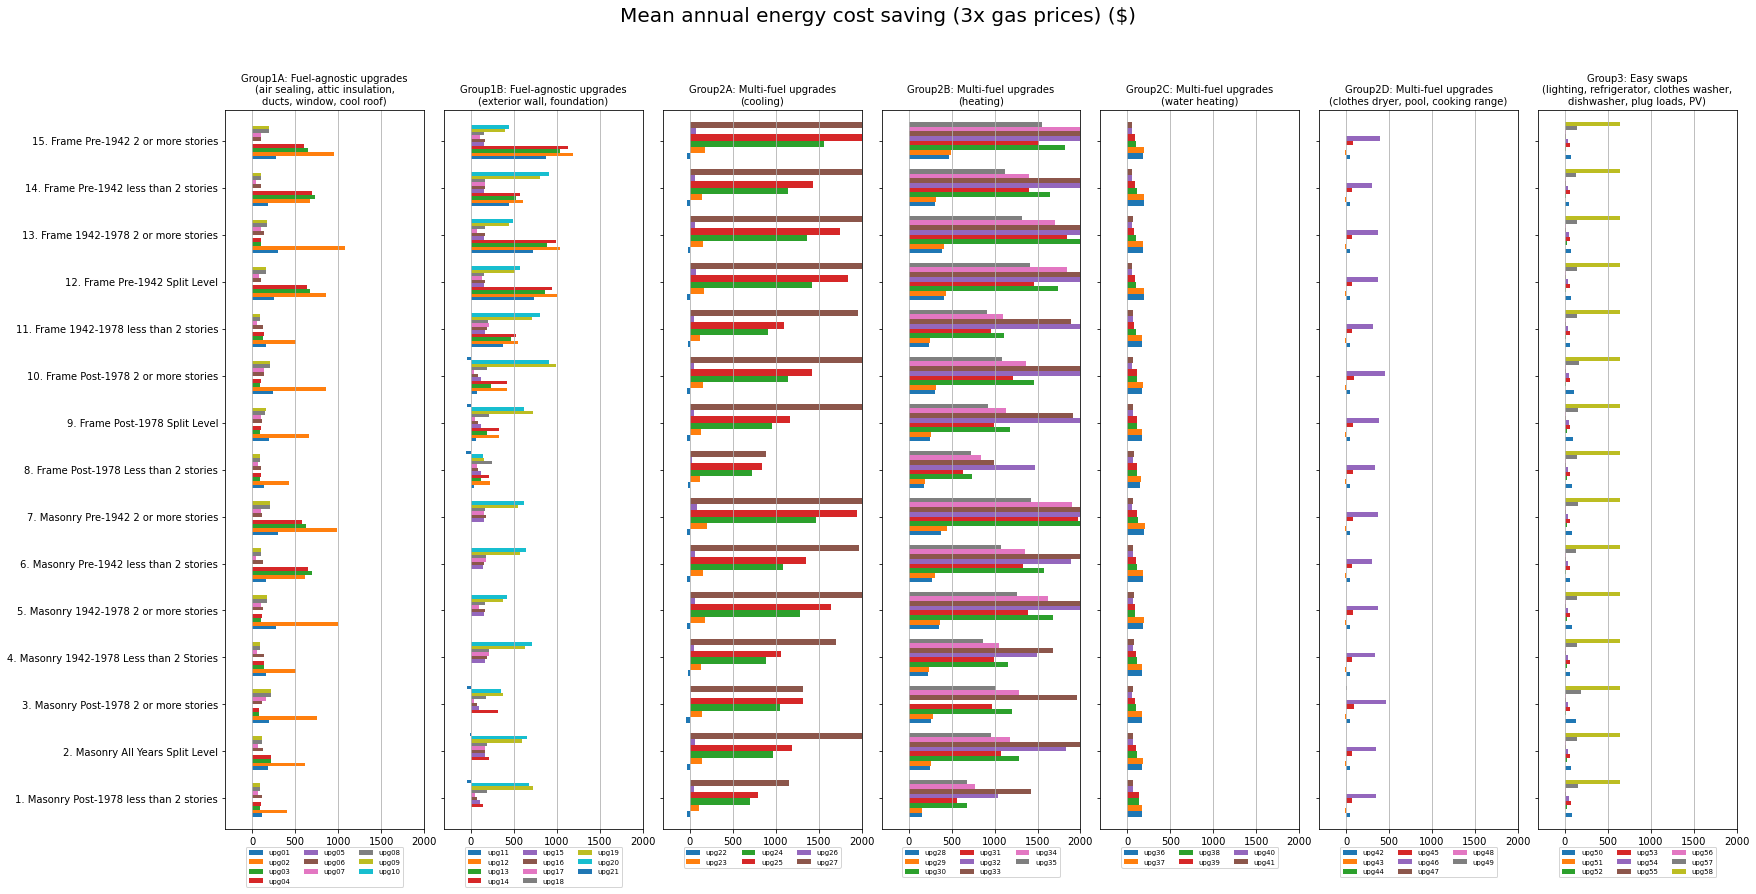

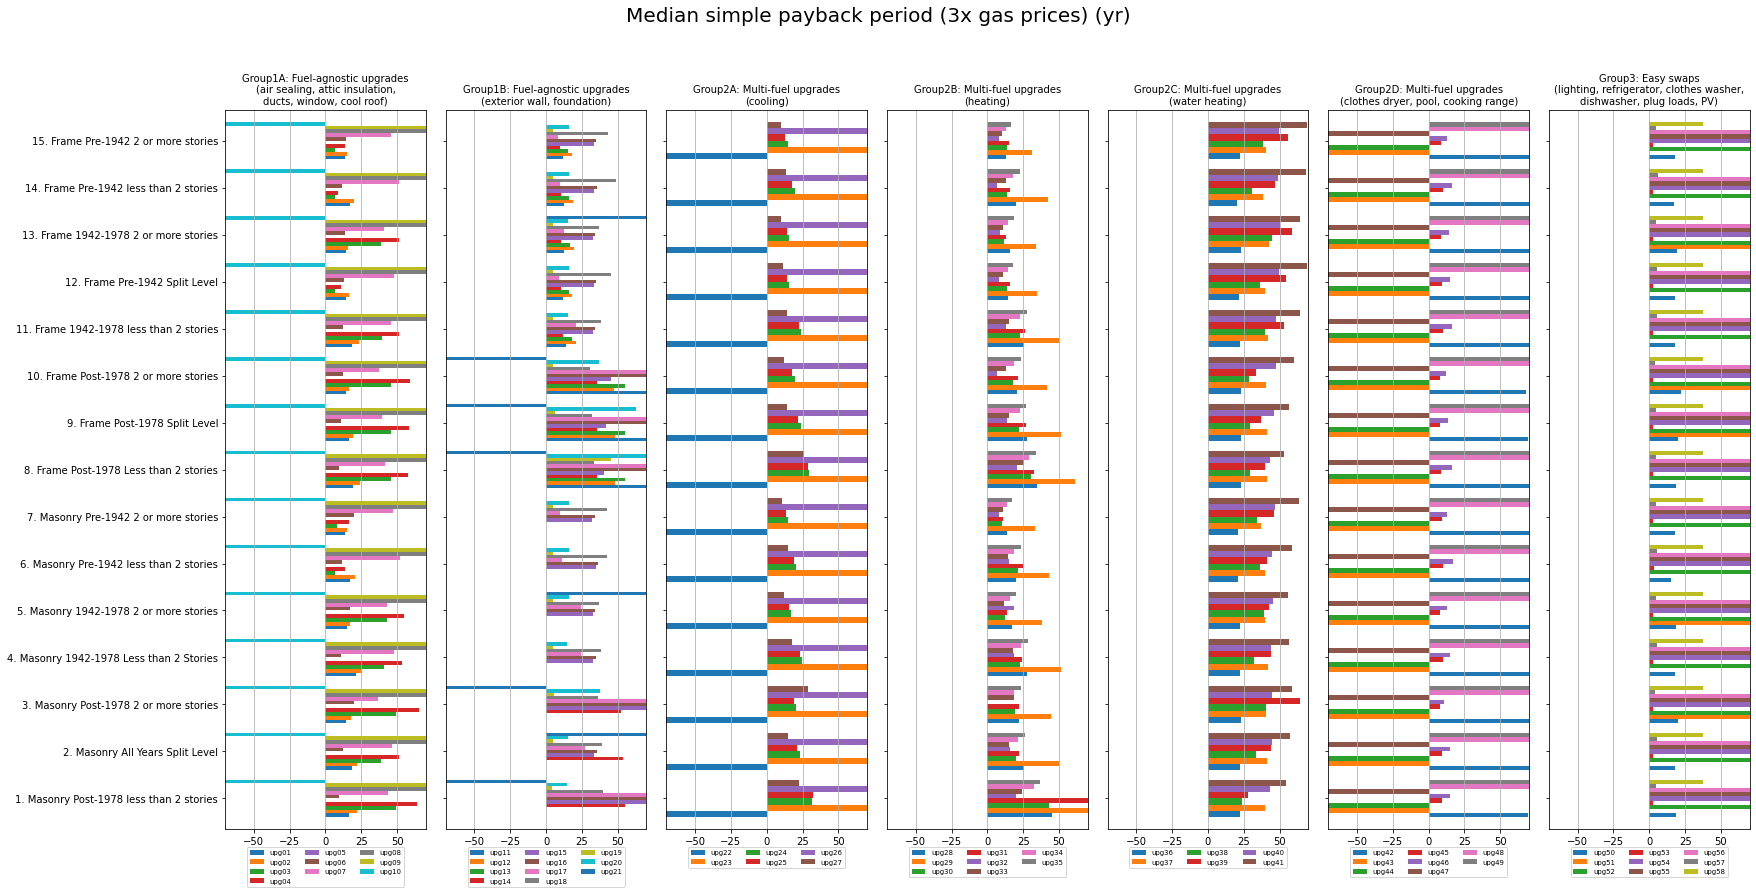

In [87]:
### other metrics to consider:
# energy savings per dollar (gas, elec)
# carbon savings (require timeseries results)

zoom_in_plots = False # <-------

zoom_in_xlimits = {
    'mean_pct_delta_gas_eui': [None, None],
    'mean_pct_delta_elec_eui': [None, None],
    'mean_pct_delta_site_eui': [-25, None],
    'mean_upgrade_cost': [None, 10000],
    'mean_ann_kbtu_saved_per_dollar': [None, 500],
    'mean_ann_energy_cost_saving': [None, 2000],
    'median_simple_payback': [-70, 70],
    'mean_ann_metric_ton_co2e_saving': [None, 20],
}

# create subfolder for plots:
plot_path1 = os.path.join(plot_path, 'mean_values_by_prototype')
if not os.path.exists(plot_path1):
    os.mkdir(plot_path1)
print(f'plot dir: {plot_path1}\n')

title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'

if NG_rate_multiplier == 1:
    para_labels = {
        'mean_pct_delta_gas_eui': 'Mean percent change from baseline in gas use intensity (therm/sqft)',
        'mean_pct_delta_elec_eui': 'Mean percent change from baseline in electricity use intensity (kWh/sqft)',
        'mean_pct_delta_site_eui': 'Mean percent change from baseline in site energy use intensity (kBtu/sqft)',
        'mean_upgrade_cost': 'Mean upgrade capital cost ($)',
        'mean_ann_kbtu_saved_per_dollar': 'Mean annual site energy saving per upgrade cost (kBtu/$)',
        'mean_ann_energy_cost_saving': f'Mean annual energy cost saving{title_ext} ($)',
        'median_simple_payback': f'Median simple payback period{title_ext} (yr)',
        'mean_ann_metric_ton_co2e_saving': f'Mean annual carbon emission saving (metric ton CO₂e)',
    }
else:
    para_labels = {
        'mean_ann_energy_cost_saving': f'Mean annual energy cost saving{title_ext} ($)',
        'median_simple_payback': f'Median simple payback period{title_ext} (yr)',
    }

    
for i, para_to_plot in enumerate(para_labels.keys(),1):
    
    zoom_ext = ''
    if zoom_in_plots:
        if len(list(x for x in zoom_in_xlimits[para_to_plot] if x is not None))>0:
            zoom_ext = '_zoomed'

    print(f'>> {i}. plotting {para_to_plot}{zoom_ext}...')
    para_label = para_labels[para_to_plot]

    idx = groups2.loc[:,(('Baseline'),('HousingGroupNo'))].astype(str) +'. '+\
          groups2.loc[:,(('Baseline'),('HousingGroupName'))]
    UPs = groups2.set_index(idx)[para_to_plot]
    xmin = UPs.replace([np.inf, -np.inf], np.nan).min().min()*1.05
    xmax = UPs.replace([np.inf, -np.inf], np.nan).max().max()*1.05
    
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, nrows=1, 
                                                            sharex=True, sharey=True, figsize=(3.5*7, 12))

    ### Group 1: Intensive, fuel-agnostic upgrades (upg01-upg21)
    # Group 1A: (upg01-upg10) N=10
    ax = ax1
    Name = 'Group1A: Fuel-agnostic upgrades\n(air sealing, attic insulation,\nducts, window, cool roof)'
    UPi = UPs.iloc[:, :10] 
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 1B: (upg11-upg21) N=11
    ax = ax2
    Name = 'Group1B: Fuel-agnostic upgrades\n(exterior wall, foundation)'
    UPi = UPs.iloc[:, 10:21]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    
    ### Group 2: Multi-fuel upgrades (upg22-upg49)
    # Group 2A: (upg22-upg27) N=6
    ax = ax3
    Name = 'Group2A: Multi-fuel upgrades\n(cooling)'
    UPi = UPs.iloc[:, 21:27]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 2B: (upg28-upg35) N=7
    ax = ax4
    Name = 'Group2B: Multi-fuel upgrades\n(heating)'
    UPi = UPs.iloc[:, 27:35]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 2C: (upg36-upg41) N=6
    ax = ax5
    Name = 'Group2C: Multi-fuel upgrades\n(water heating)'
    UPi = UPs.iloc[:, 35:41]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 2D: (upg42-upg49) N=8
    ax = ax6
    Name = 'Group2D: Multi-fuel upgrades\n(clothes dryer, pool, cooking range)'
    UPi = UPs.iloc[:, 41:49]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)


    ### Group 3: Easy swaps (upg50-upg58) N=9
    ax = ax7
    Name = 'Group3: Easy swaps\n(lighting, refrigerator, clothes washer,\ndishwasher, plug loads, PV)'
    UPi = UPs.iloc[:, 49:]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)
    
    if para_to_plot == 'median_simple_payback':
        ax.set_xlim(0,100)
    
    [xmin, xmax] = zoom_in_xlimits[para_to_plot]
    if xmin is not None:
        ax.set_xlim(left = xmin)
    if xmax is not None:
        ax.set_xlim(right=xmax)
    
    fig.suptitle(para_label, fontsize=20, y=1.03)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
    
    filename = f'{iter_path}-comparison_{para_to_plot}{zoom_ext}{fn_ext}.pdf'
    fig.savefig(os.path.join(plot_path1, filename),
                bbox_inches='tight')


#### 2.3.2. plot mean values for Chicago avg per SFD

In [116]:
Nchicago = 273742 # no of sfd in Chicago
Wtchicago = groups2.loc[:,[('Baseline', 'HousingGroupName'),('Baseline', 'Chicago Prevalence')]
                       ]['Baseline'].set_index('HousingGroupName')

## add 'Chicago avg' and 'Chicago total'
groups_avg = groups2.set_index(('Baseline', 'HousingGroupName')).drop('Baseline', level=0, axis=1)
groups_avg.index.name = groups_avg.index.name[1]
groups_avg = groups_avg.stack(level=0).stack().unstack(level=0)
groups_avg['Chicago avg'] = np.where(np.isnan(groups_avg),0,groups_avg).dot(
    np.where(np.isnan(Wtchicago),0,Wtchicago)) # np.dot() ignoring nan

## add upgrade names
upgrade_name_map = summary_upgrades[['upgrade_no','upgrade_name']]
upgrade_name_map.loc[:,'upgrade'] = upgrade_name_map['upgrade_no'].astype(int)
# upgrade_name_map.loc[:,'upgrade'] = 'upg' + \
#     upgrade_name_map['upgrade_no'].astype(int).astype(str).str.rjust(2,'0')
upgrade_name_map = upgrade_name_map.set_index('upgrade')['upgrade_name']

groups_avg = groups_avg.reset_index().rename({'level_0':'metrics','level_1':'upgrade_no'}, axis=1)
groups_avg['upgrade_no'] = groups_avg['upgrade_no'].str[3:5].astype(int)
groups_avg['upgrade_name'] = groups_avg['upgrade_no'].map(upgrade_name_map)
groups_avg = groups_avg.set_index(['metrics','upgrade_no','upgrade_name']).sort_index().reset_index()
groups_avg


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


HousingGroupName                      metrics  upgrade_no  \
0                 mean_ann_energy_cost_saving           1   
1                 mean_ann_energy_cost_saving           2   
2                 mean_ann_energy_cost_saving           3   
3                 mean_ann_energy_cost_saving           4   
4                 mean_ann_energy_cost_saving           6   
..                                        ...         ...   
451                     median_simple_payback          54   
452                     median_simple_payback          55   
453                     median_simple_payback          56   
454                     median_simple_payback          57   
455                     median_simple_payback          58   

HousingGroupName                                       upgrade_name  \
0                 Air Leakage 25% Reduction, with Mech Vent unde...   
1                             Air Leakage to 1ACH50, with Mech Vent   
2                                            Attic Insulation, R-49   
3                                            Attic Insulation, R-60   
4                   Duct Sealing and Insulation to R-8, 10% Leakage   
..                                                              ...   
451                             EnergyStar Clothes Washer, Most Eff   
452                                           EnergyStar Dishwasher   
453                                 EnergyStar Dishwasher, Most Eff   
454                                        Plug Loads 25% Reduction   
455                                             Rooftop Solar, 4 kW   

HousingGroupName  Frame 1942-1978 2 or more stories  \
0                                            304.52   
1                                           1079.26   
2                                             98.41   
3                                            102.05   
4                                            135.98   
..                                              ...   
451                                          116.21   
452                                          198.23   
453                                          347.38   
454                                            4.92   
455                                           37.46   

HousingGroupName  Frame 1942-1978 less than 2 stories  \
0                                              164.57   
1                                              508.80   
2                                              129.10   
3                                              135.23   
4                                              124.58   
..                                                ...   
451                                            118.09   
452                                            218.25   
453                                            358.01   
454                                              5.21   
455                                             37.46   

HousingGroupName  Frame Post-1978 2 or more stories  \
0                                            237.61   
1                                            853.68   
2                                             94.89   
3                                            106.44   
4                                            134.52   
..                                              ...   
451                                          113.94   
452                                          176.58   
453                                          288.50   
454                                            4.31   
455                                           37.46   

HousingGroupName  Frame Post-1978 Less than 2 stories  \
0                                              134.57   
1                                              424.32   
2                                               91.18   
3                                              103.65   
4                                               98.91   
..                                                ...   
451     

plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/processed results/plots/mean_values_chicago_avg

Plotting Chicago avg: mean_ann_energy_cost_saving (3x gas prices)...
    - Group1
    - Group2
    - Group3
Plotting Chicago avg: median_simple_payback (3x gas prices)...
    - Group1


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


    - Group2
    - Group3


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


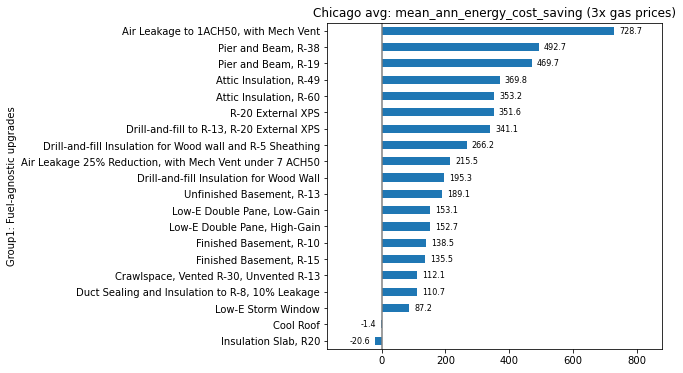

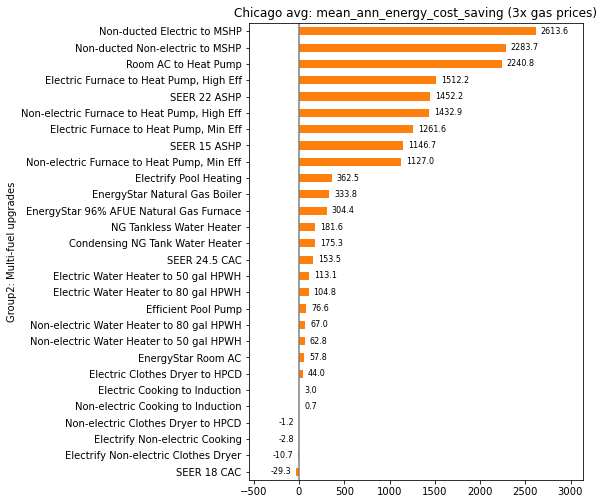

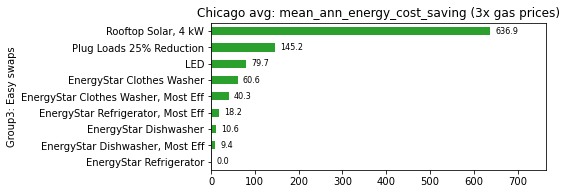

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


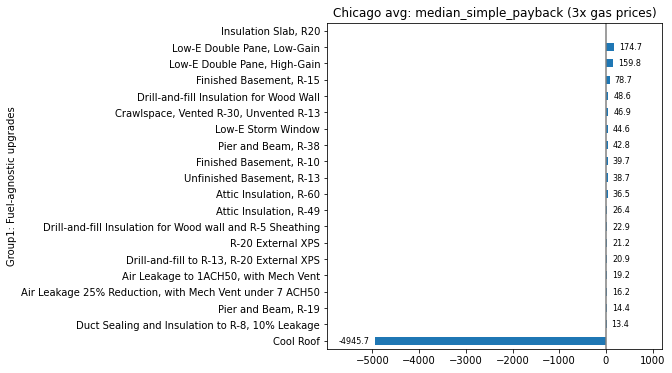

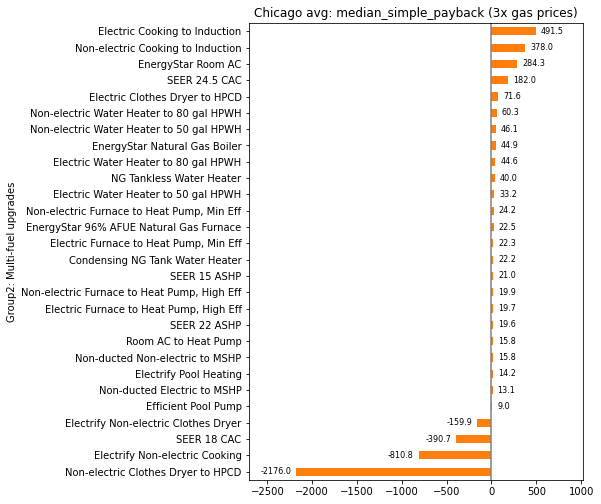

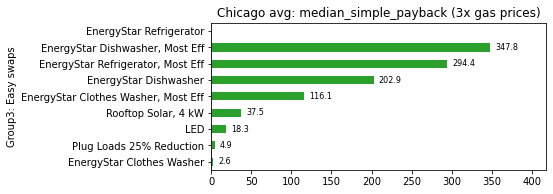

In [117]:
para_to_plot = 'Chicago avg' # <------

upgrade_sets = {
    'Group1: Fuel-agnostic upgrades': range(1, 22),
    'Group2: Multi-fuel upgrades': range(22, 50),
    'Group3: Easy swaps': range(50, 59),
}
upgrade_set_colors = {
    'Group1: Fuel-agnostic upgrades': 'tab:blue',
    'Group2: Multi-fuel upgrades': 'tab:orange',
    'Group3: Easy swaps': 'tab:green',
}

# create subfolder for plots:
plot_path2 = os.path.join(plot_path, 'mean_values_chicago_avg')
if not os.path.exists(plot_path2):
    os.mkdir(plot_path2)
print(f'plot dir: {plot_path2}\n')

if NG_rate_multiplier == 1: 
    metrics_to_plot = groups_avg['metrics'].unique()
else:
    metrics_to_plot = ['mean_ann_energy_cost_saving', 'median_simple_payback']
    
for metric in metrics_to_plot:
    title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'
    title = f'{para_to_plot}: {metric}{title_ext}'
    print(f'Plotting {title}...')
    
    for n, up in enumerate(upgrade_sets.keys(),1):
        print(f'    - Group{n}')
        
        groupi = groups_avg[(groups_avg['metrics']==metric) & 
                              (groups_avg['upgrade_no'].isin(upgrade_sets[up]))][[
            'upgrade_name',para_to_plot]].set_index('upgrade_name').sort_values(by=para_to_plot)
        groupi.index.name = up
        
        ht = len(groupi)
        fig, ax = plt.subplots(figsize=(6, 0.3*ht))
        groupi.plot.barh(color=upgrade_set_colors[up], legend=False, title=title, ax=ax)
        
        # For each bar: Place a label ############################
        rects = ax.patches
        for rect in rects:
            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = "{:.1f}".format(x_value)

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha,                      # Horizontally align label differently for
                fontsize=8)                 # positive and negative values. 
            
        ax.margins(x=0.2)    
        ax.axvline(x=0, linestyle='-', color='gray')
        if (metric[-3:]=='eui') & (ax.get_xlim()[0] < -50):
            ax.axvline(x=-50, linestyle='--', color='darkred')
        
        filename = f'upgrades_{iteration}-{para_to_plot}_{metric}_group{n}{fn_ext}.pdf'
        fig.savefig(os.path.join(plot_path2, filename),
                    bbox_inches='tight')
        

#### 2.3.3. plot mean values for Chicago total stock 
Run cell below to load df for plots

In [111]:
load_df_for_plot_below_from_file = False # <-----
    
if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''

    groups_total = pd.read_csv(os.path.join(result_path,'processed results',f'upgrades_prototype_chicago_total_{fn_ext}.csv'),
                         header=[0])
    
    print(f'"groups_total{fn_ext}" df loaded from file.')
    display(groups_total)


"groups_total" df loaded from file.


metrics  upgrade_no  \
0    mean_ann_elec_cost_saving           1   
1    mean_ann_elec_cost_saving           2   
2    mean_ann_elec_cost_saving           3   
3    mean_ann_elec_cost_saving           4   
4    mean_ann_elec_cost_saving           6   
..                         ...         ...   
394          mean_upgrade_cost          54   
395          mean_upgrade_cost          55   
396          mean_upgrade_cost          56   
397          mean_upgrade_cost          57   
398          mean_upgrade_cost          58   

                                          upgrade_name  \
0    Air Leakage 25% Reduction, with Mech Vent unde...   
1                Air Leakage to 1ACH50, with Mech Vent   
2                               Attic Insulation, R-49   
3                               Attic Insulation, R-60   
4      Duct Sealing and Insulation to R-8, 10% Leakage   
..                                                 ...   
394                EnergyStar Clothes Washer, Most Eff   
395                              EnergyStar Dishwasher   
396                    EnergyStar Dishwasher, Most Eff   
397                           Plug Loads 25% Reduction   
398                                Rooftop Solar, 4 kW   

     Frame 1942-1978 2 or more stories  Frame 1942-1978 less than 2 stories  \
0                                27.42                                14.70   
1                                79.73                                29.80   
2                                16.15                                22.66   
3                                16.92                                23.78   
4                                20.48                                20.45   
..                                 ...                                  ...   
394                            2800.00                              2800.00   
395                            2000.00                              2000.00   
396                            2400.00                              2400.00   
397                             600.00                               600.00   
398                           24000.00                             24000.00   

     Frame Post-1978 2 or more stories  Frame Post-1978 Less than 2 stories  \
0                                15.17                                 7.74   
1                                65.52                                21.36   
2                                18.99                                16.02   
3                                21.27                                18.46   
4                                28.07                                23.55   
..                                 ...                                  ...   
394                            2800.00                              2800.00   
395                            2000.00                              2000.00   
396                            2400.00                              2400.00   
397                             600.00                               600.00   
398                           24000.00                             24000.00   

     Frame Post-1978 Split Level  Frame Pre-1942 2 or more stories  \
0                          11.95                             23.20   
1                          45.98                             62.49   
2                          17.66                            104.29   
3                          20.03                             97.77   
4                          26.02                             16.75   
..                           ...                               ...   
394                      2800.00                           2800.00   
395                      2000.00                           2000.00   
396                      2400.00                           2400.00   
397                       600.00                            600.00   
398                     24000.00                          24000.00   

     Frame Pre-1942 Split Level  F

plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/processed results/plots/sum_values_chicago_total

Plotting Chicago total ann_elec_cost_saving...
    - Group1
    - Group2
    - Group3
Plotting Chicago total ann_gas_cost_saving...
    - Group1
    - Group2
    - Group3
Plotting Chicago total ann_kwh_elec_saving...
    - Group1
    - Group2
    - Group3
Plotting Chicago total ann_mbtu_site_energy_saving...
    - Group1
    - Group2
    - Group3
Plotting Chicago total ann_metric_ton_co2e_saving...
    - Group1
    - Group2
    - Group3
Plotting Chicago total ann_therm_gas_saving...
    - Group1
    - Group2
    - Group3
Plotting Chicago total upgrade_cost...
    - Group1
    - Group2
    - Group3


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


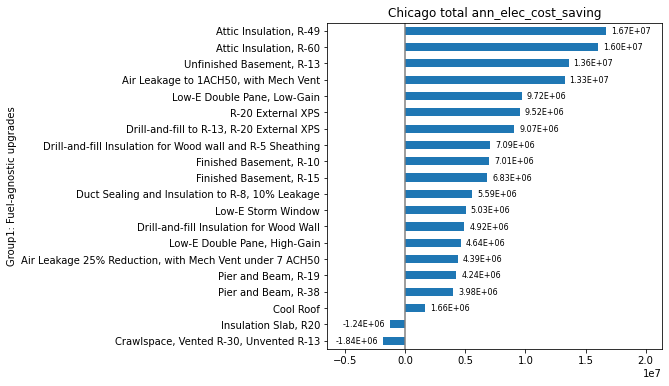

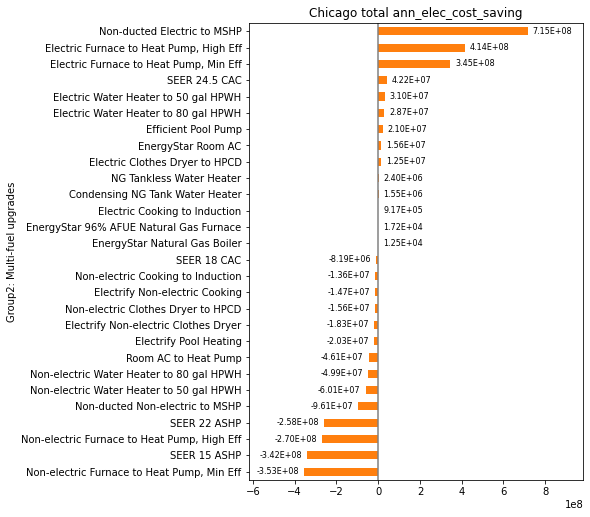

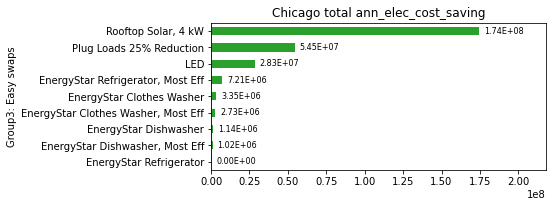

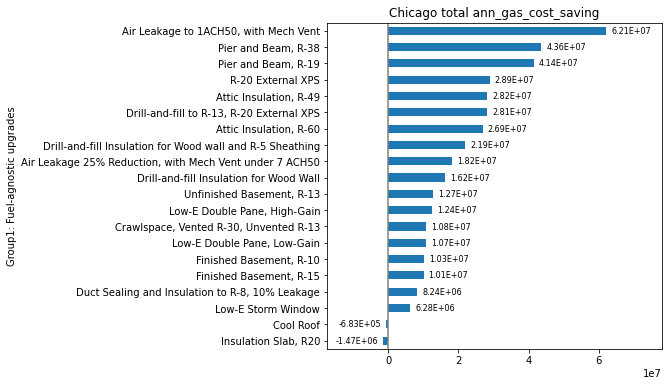

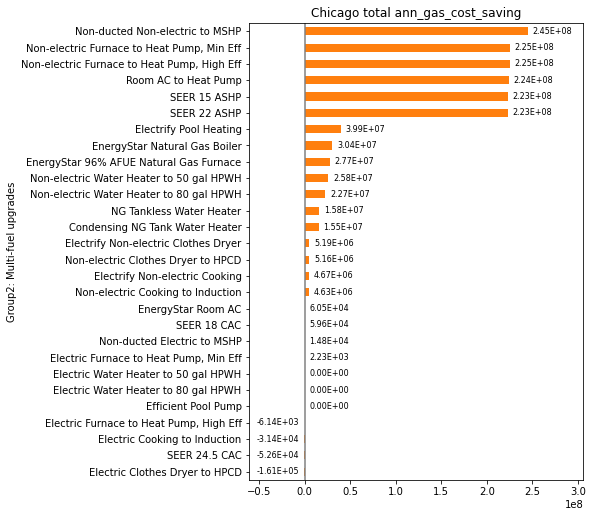

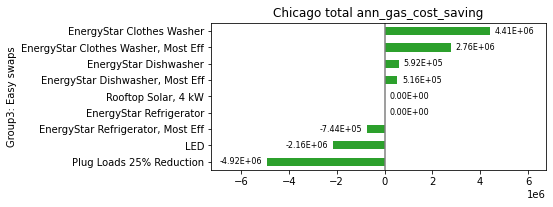

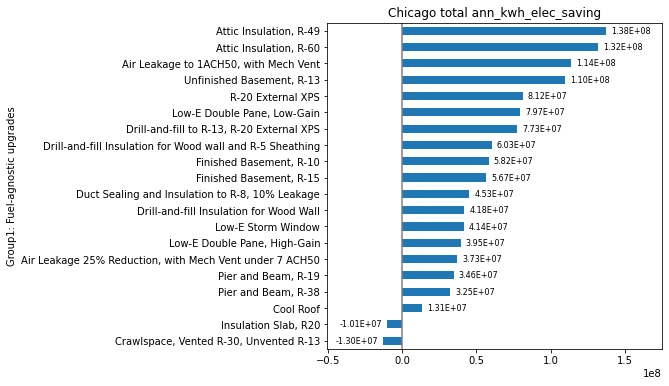

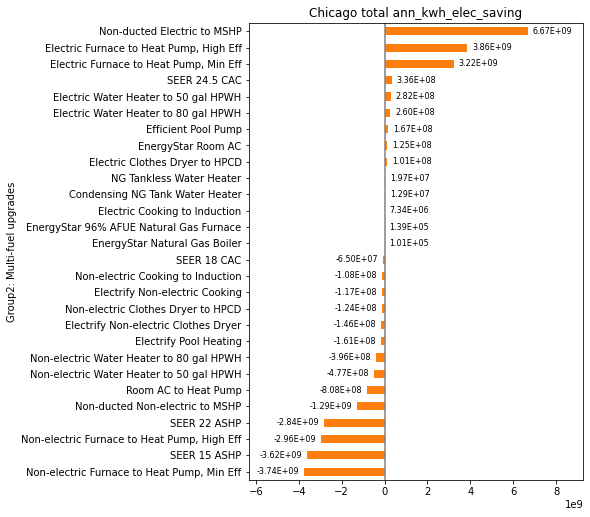

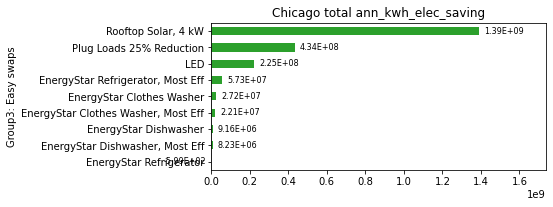

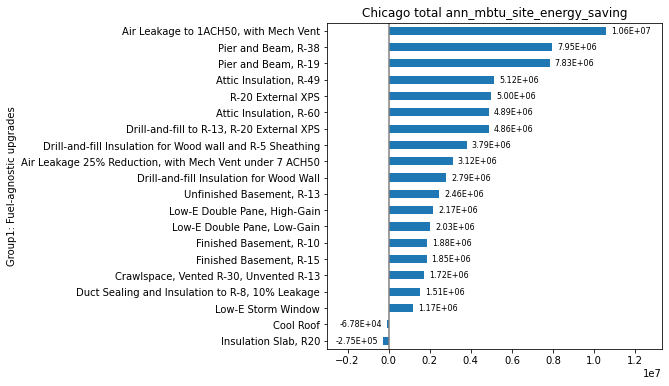

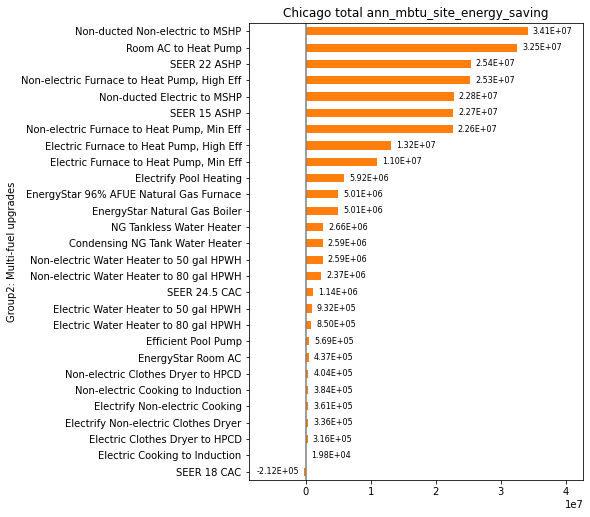

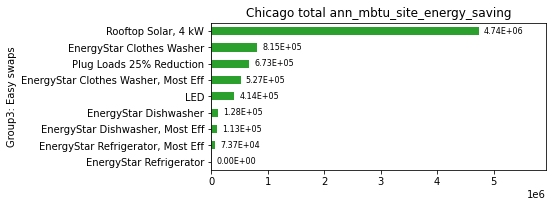

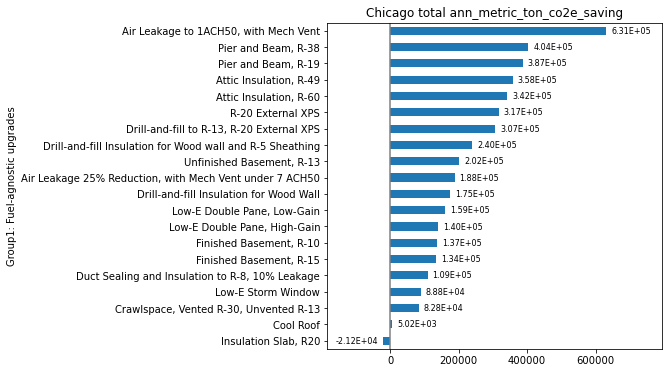

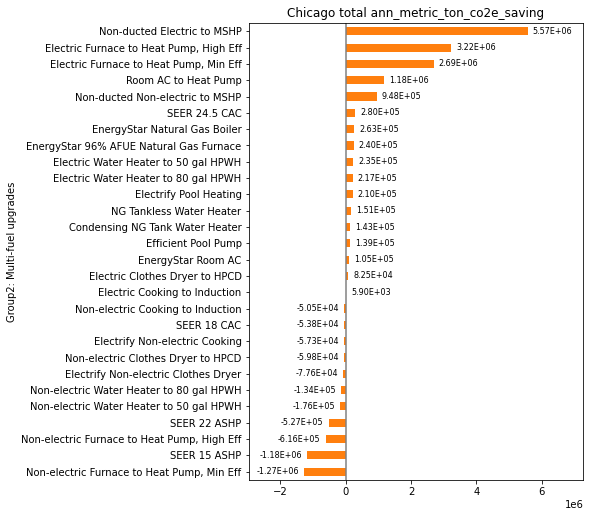

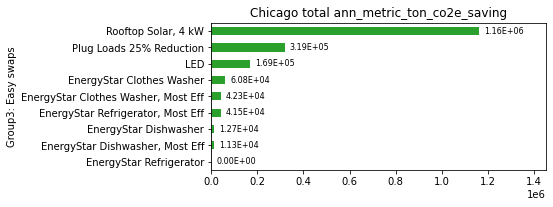

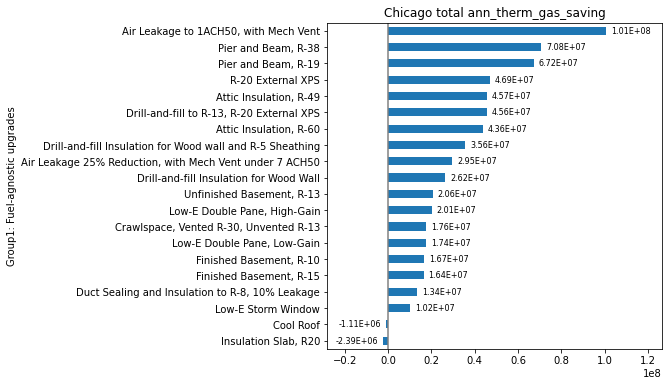

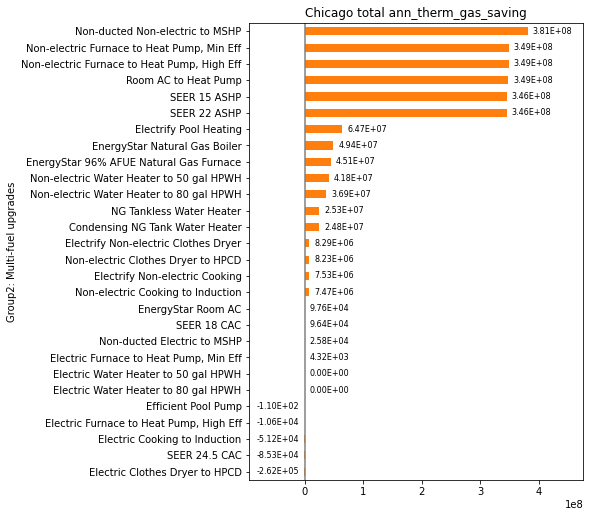

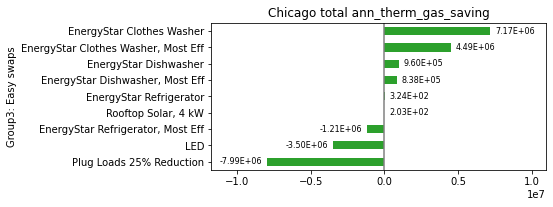

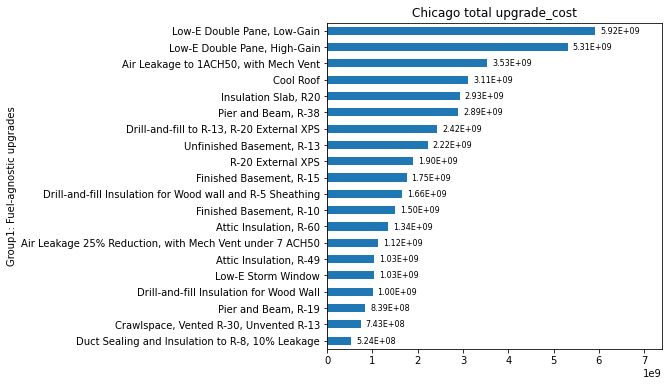

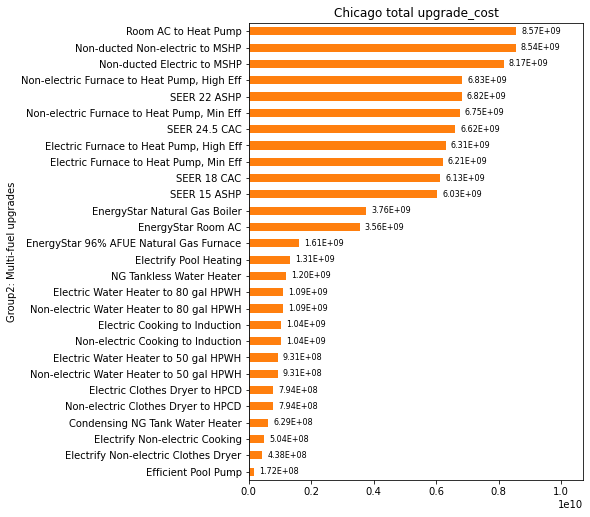

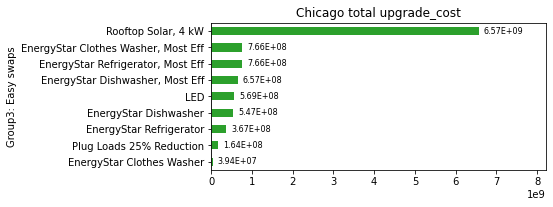

In [113]:
para_to_plot = 'Chicago total' # <------

upgrade_sets = {
    'Group1: Fuel-agnostic upgrades': range(1, 22),
    'Group2: Multi-fuel upgrades': range(22, 50),
    'Group3: Easy swaps': range(50, 59),
}
upgrade_set_colors = {
    'Group1: Fuel-agnostic upgrades': 'tab:blue',
    'Group2: Multi-fuel upgrades': 'tab:orange',
    'Group3: Easy swaps': 'tab:green',
}

# create subfolder for plots:
plot_path3 = os.path.join(plot_path, 'sum_values_chicago_total')
if not os.path.exists(plot_path3):
    os.mkdir(plot_path3)
print(f'plot dir: {plot_path3}\n')

if NG_rate_multiplier == 1: 
    metrics_to_plot = groups_total['metrics'].unique()
else:
    metrics_to_plot = ['mean_ann_gas_cost_saving']
    
for metric in metrics_to_plot:
    title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'
    title = f'{para_to_plot} {metric[5:]}{title_ext}'
    print(f'Plotting {title}...')
    
    for n, up in enumerate(upgrade_sets.keys(),1):
        print(f'    - Group{n}')
        
        groupi = groups_total[(groups_total['metrics']==metric) & 
                              (groups_total['upgrade_no'].isin(upgrade_sets[up]))][[
            'upgrade_name',para_to_plot]].set_index('upgrade_name').sort_values(by=para_to_plot)
        groupi.index.name = up
        
        ht = len(groupi)
        fig, ax = plt.subplots(figsize=(6, 0.3*ht))
        groupi.plot.barh(color=upgrade_set_colors[up], legend=False, title=title, ax=ax)
        
        # For each bar: Place a label ############################
        rects = ax.patches
        for rect in rects:
            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = "{:.2E}".format(x_value)

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha,                      # Horizontally align label differently for
                fontsize=8)                 # positive and negative values.                      
                                            
        ax.margins(x=0.25)
        ax.axvline(x=0, linestyle='-', color='gray')
        
        filename = f'upgrades_{iteration}-{para_to_plot}_{metric[5:]}_group{n}{fn_ext}.pdf'
        fig.savefig(os.path.join(plot_path3, filename),
                    bbox_inches='tight')

#### 2.3.4. plot metrics distribution
Run cell below to load df for plots

In [124]:
load_df_for_plot_below_from_file = False # <-----
    
if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''
    
    all_proto_upgrades = pd.read_csv(
        os.path.join(result_path, 'processed results', 'all_upgrades_by_prototype_combined.csv'))
    
    print(f'"all_proto_upgrades{fn_ext}" df loaded from file.')
    N_upgrades = all_proto_upgrades['upgrade_no'].nunique()
    print(f'   total number of upgrades: {N_upgrades}')
    
    display(all_proto_upgrades)
    

"all_proto_upgrades" df loaded from file.
   total number of upgrades: 57


building_id  job_id           started_at         completed_at  \
0                69     240  2020-12-15 23:47:30  2020-12-15 23:49:27   
1                74      90  2020-12-15 21:50:45  2020-12-15 21:52:39   
2               104      66  2020-12-15 22:39:34  2020-12-15 22:41:29   
3               130     116  2020-12-15 22:18:41  2020-12-15 22:20:33   
4               150      91  2020-12-15 23:21:59  2020-12-15 23:23:55   
...             ...     ...                  ...                  ...   
903050        16750     244  2020-12-16 00:43:41  2020-12-16 00:45:42   
903051        16758      13  2020-12-15 22:53:39  2020-12-15 22:55:42   
903052        16759     228  2020-12-15 22:12:46  2020-12-15 22:14:44   
903053        16769      91  2020-12-16 00:23:16  2020-12-16 00:25:22   
903054        16773      49  2020-12-15 22:03:01  2020-12-15 22:04:56   

       completed_status  apply_upgrade.applicable  \
0               Success                      True   
1               Success                      True   
2               Success                      True   
3               Success                      True   
4               Success                      True   
...                 ...                       ...   
903050          Success                      True   
903051          Success                      True   
903052          Success                      True   
903053          Success                      True   
903054          Success                      True   

                               apply_upgrade.upgrade_name  \
0       Air Leakage 25% Reduction, with Mech Vent unde...   
1       Air Leakage 25% Reduction, with Mech Vent unde...   
2       Air Leakage 25% Reduction, with Mech Vent unde...   
3       Air Leakage 25% Reduction, with Mech Vent unde...   
4       Air Leakage 25% Reduction, with Mech Vent unde...   
...                                                   ...   
903050                                Rooftop Solar, 4 kW   
903051                                Rooftop Solar, 4 kW   
903052                                Rooftop Solar, 4 kW   
903053                                Rooftop Solar, 4 kW   
903054                                Rooftop Solar, 4 kW   

        simulation_output_report.applicable  \
0                                      True   
1                                      True   
2                                      True   
3                                      True   
4                                      True   
...                                     ...   
903050                                 True   
903051                                 True   
903052                                 True   
903053                                 True   
903054                                 True   

        simulation_output_report.door_area_ft_2  \
0                                          20.0   
1                                          20.0   
2                                          20.0   
3                                          20.0   
4                                          20.0   
...                                         ...   
903050                                     20.0   
903051                                     20.0   
903052                                     20.0   
903053                                     20.0   
903054                                     20.0   

        simulation_output_report.duct_surface_area_ft_2  ...  \
0                                               1221.37  ...   
1                                                234.21  ...   
2                                               1221.37  ...   
3                                                805.12  ...   
4                                                805.12  ...   
...                                                 ...  ...   
903050                                           390.40  ...   
903051                                           852.16  ...   
903052 

plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_01/processed results/plots/distribution_by_prototype

>> 1. plotting pct_delta_gas_eui...
>> 2. plotting pct_delta_elec_eui...
>> 3. plotting pct_delta_site_eui...
>> 4. plotting upgrade_cost...
>> 5. plotting ann_kbtu_saved_per_dollar...
>> 6. plotting ann_energy_cost_saving...
>> 7. plotting simple_payback...
>> 8. plotting ann_metric_ton_co2e_saving...


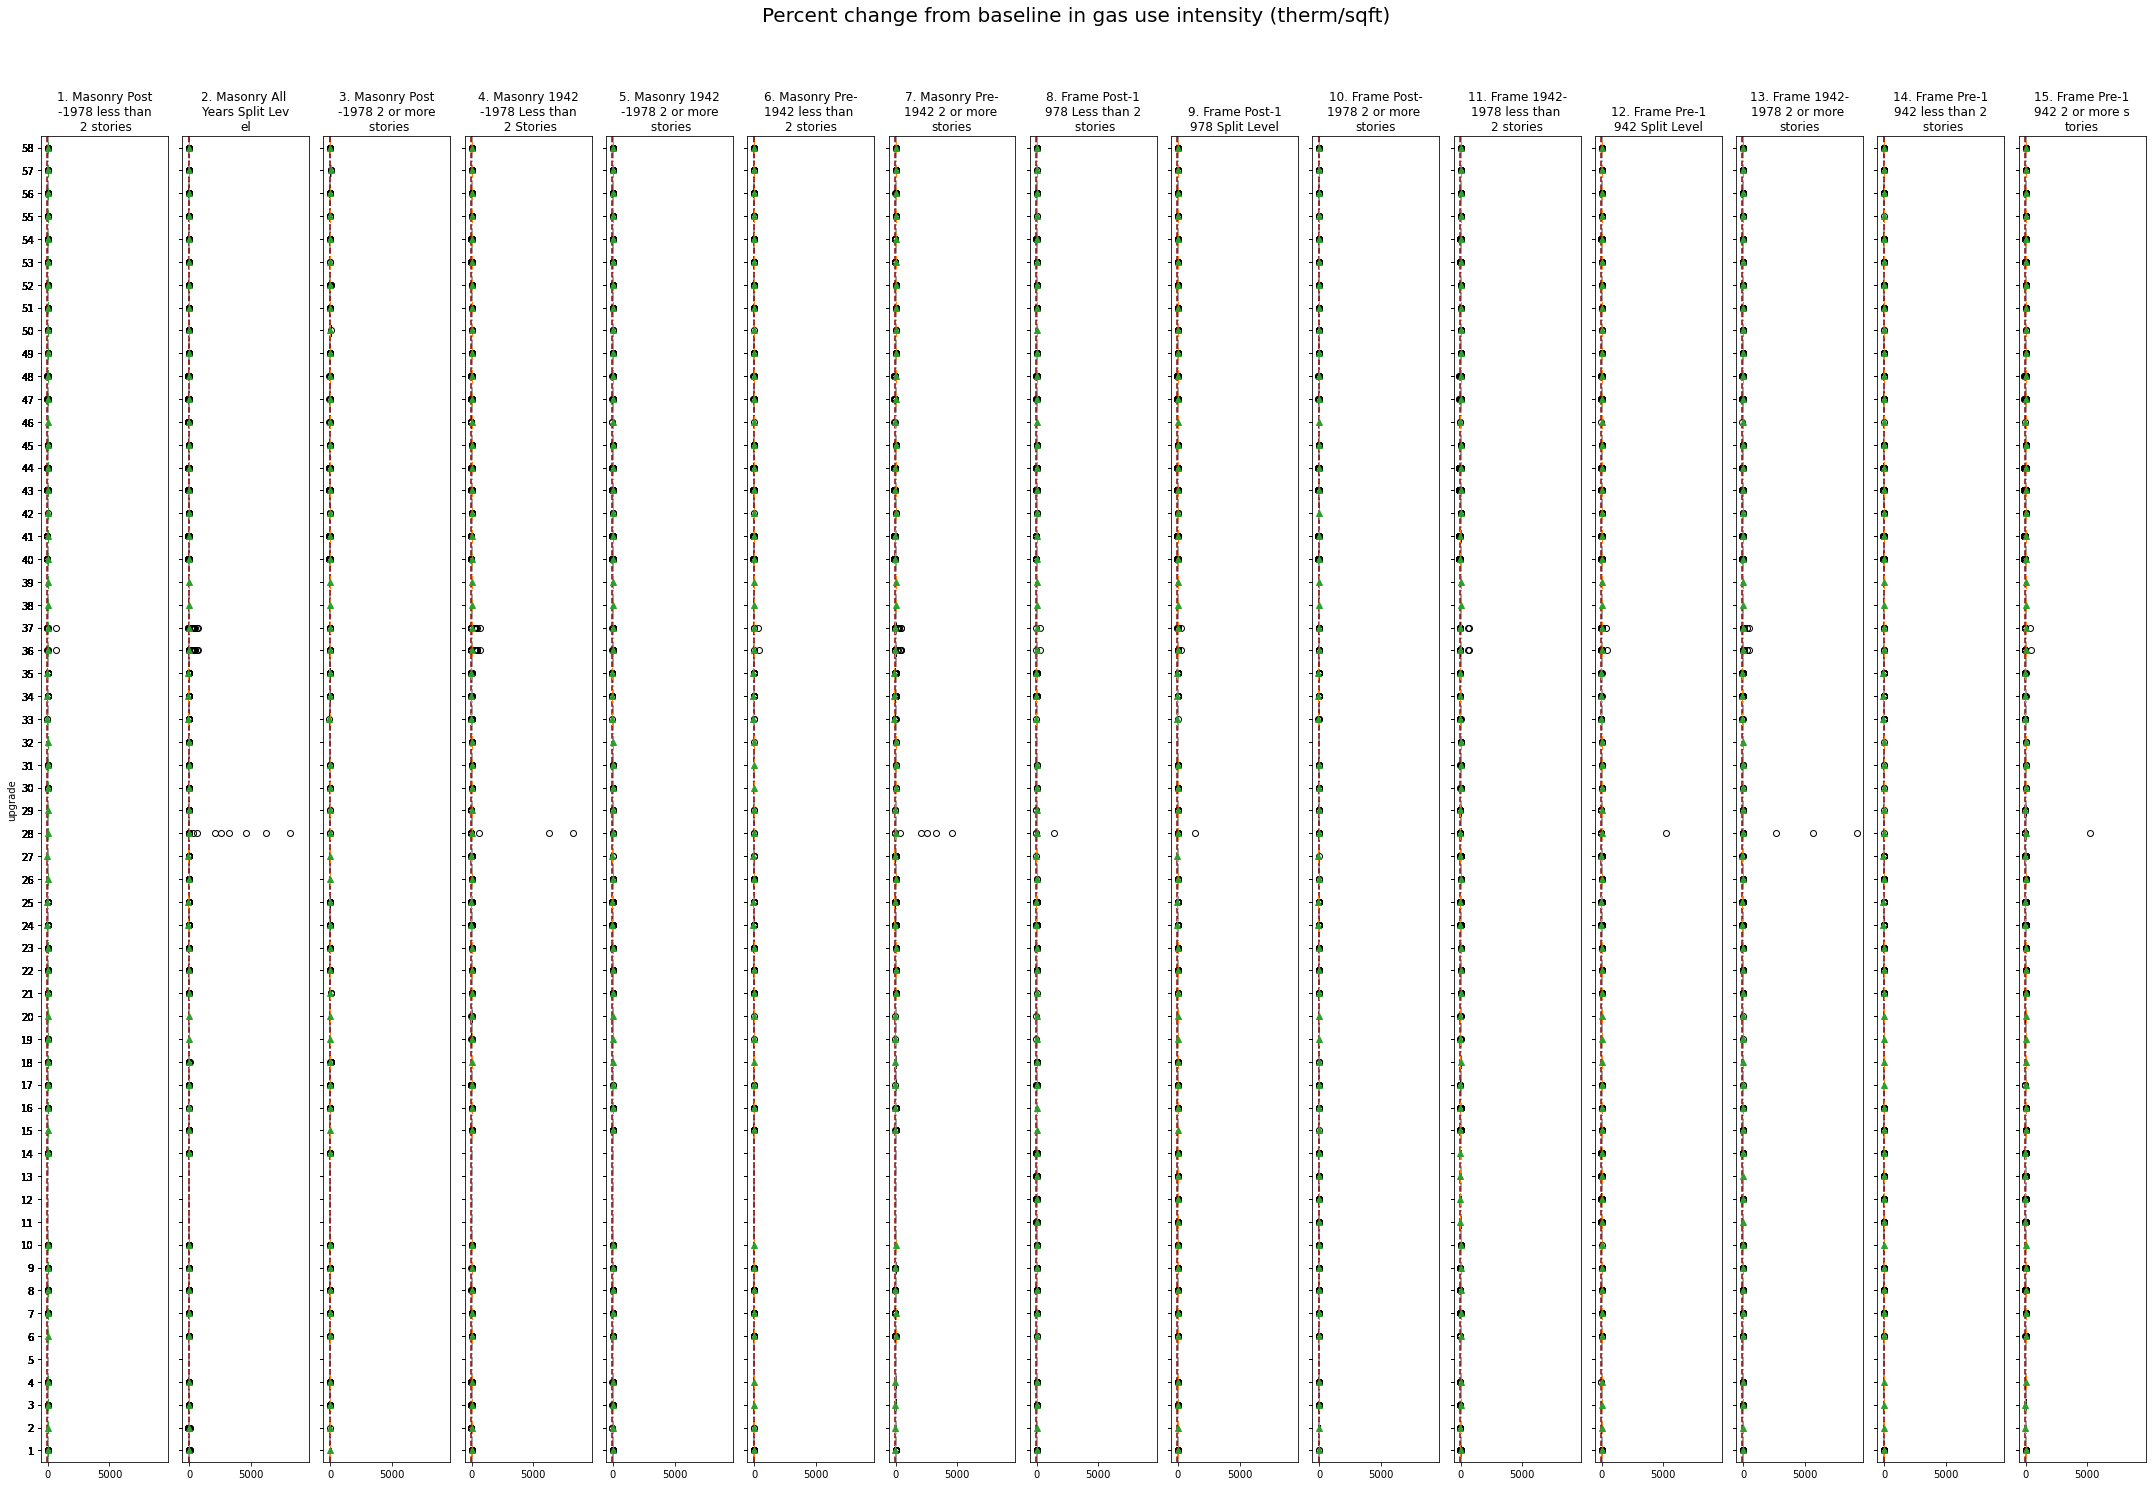

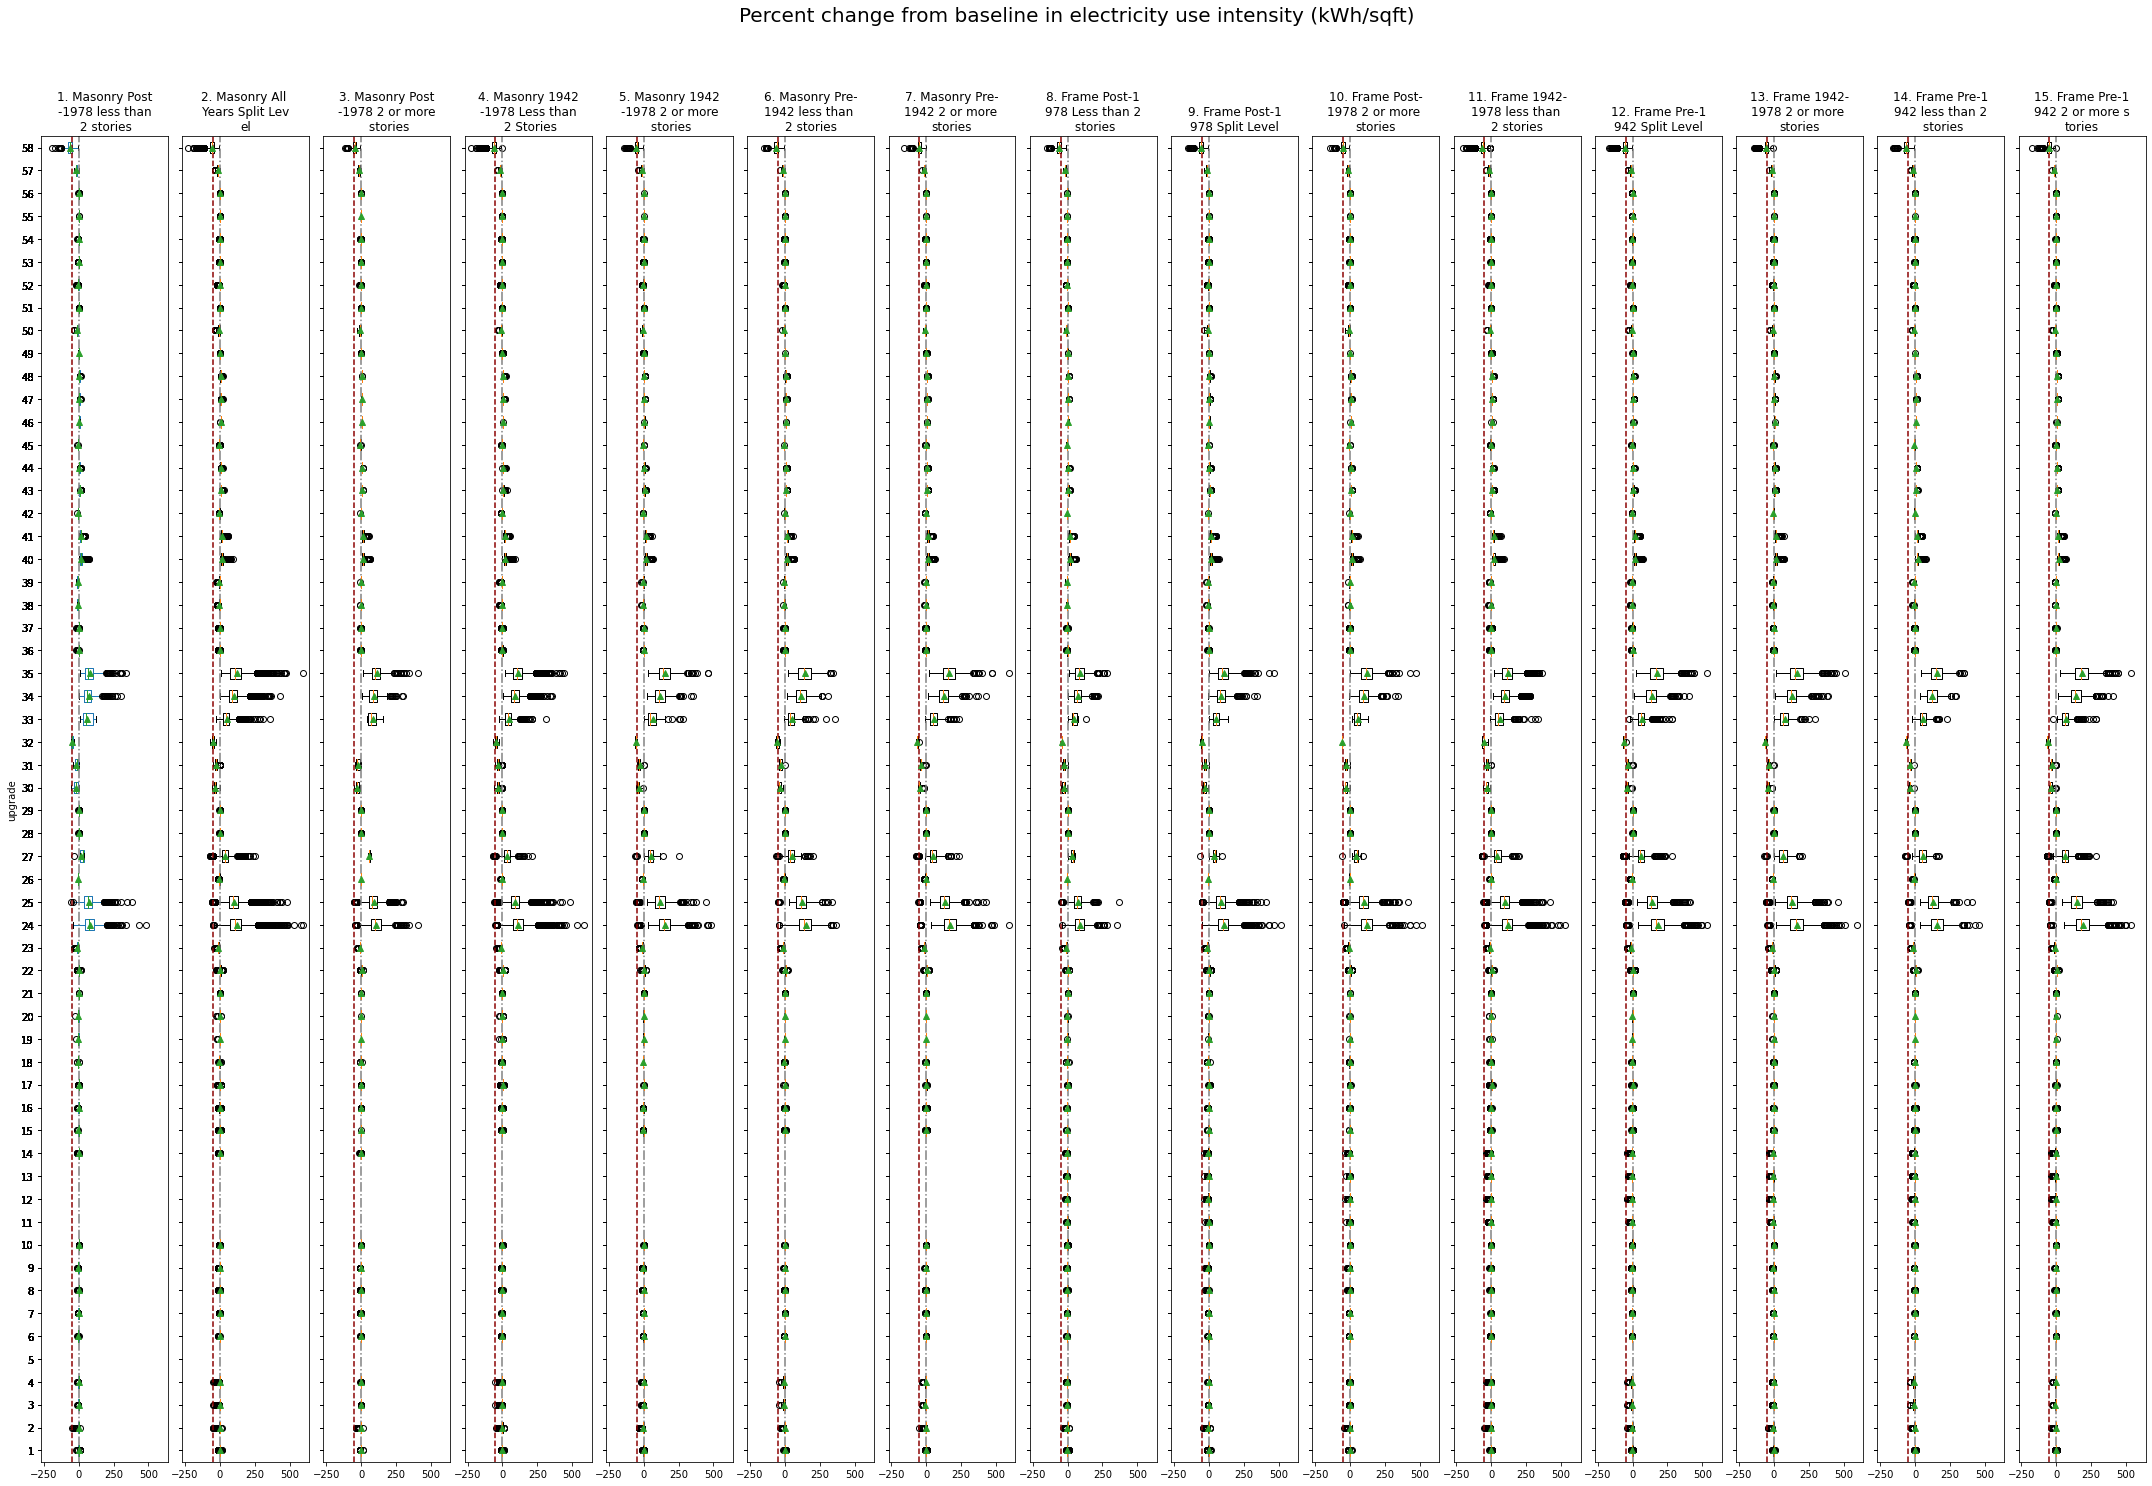

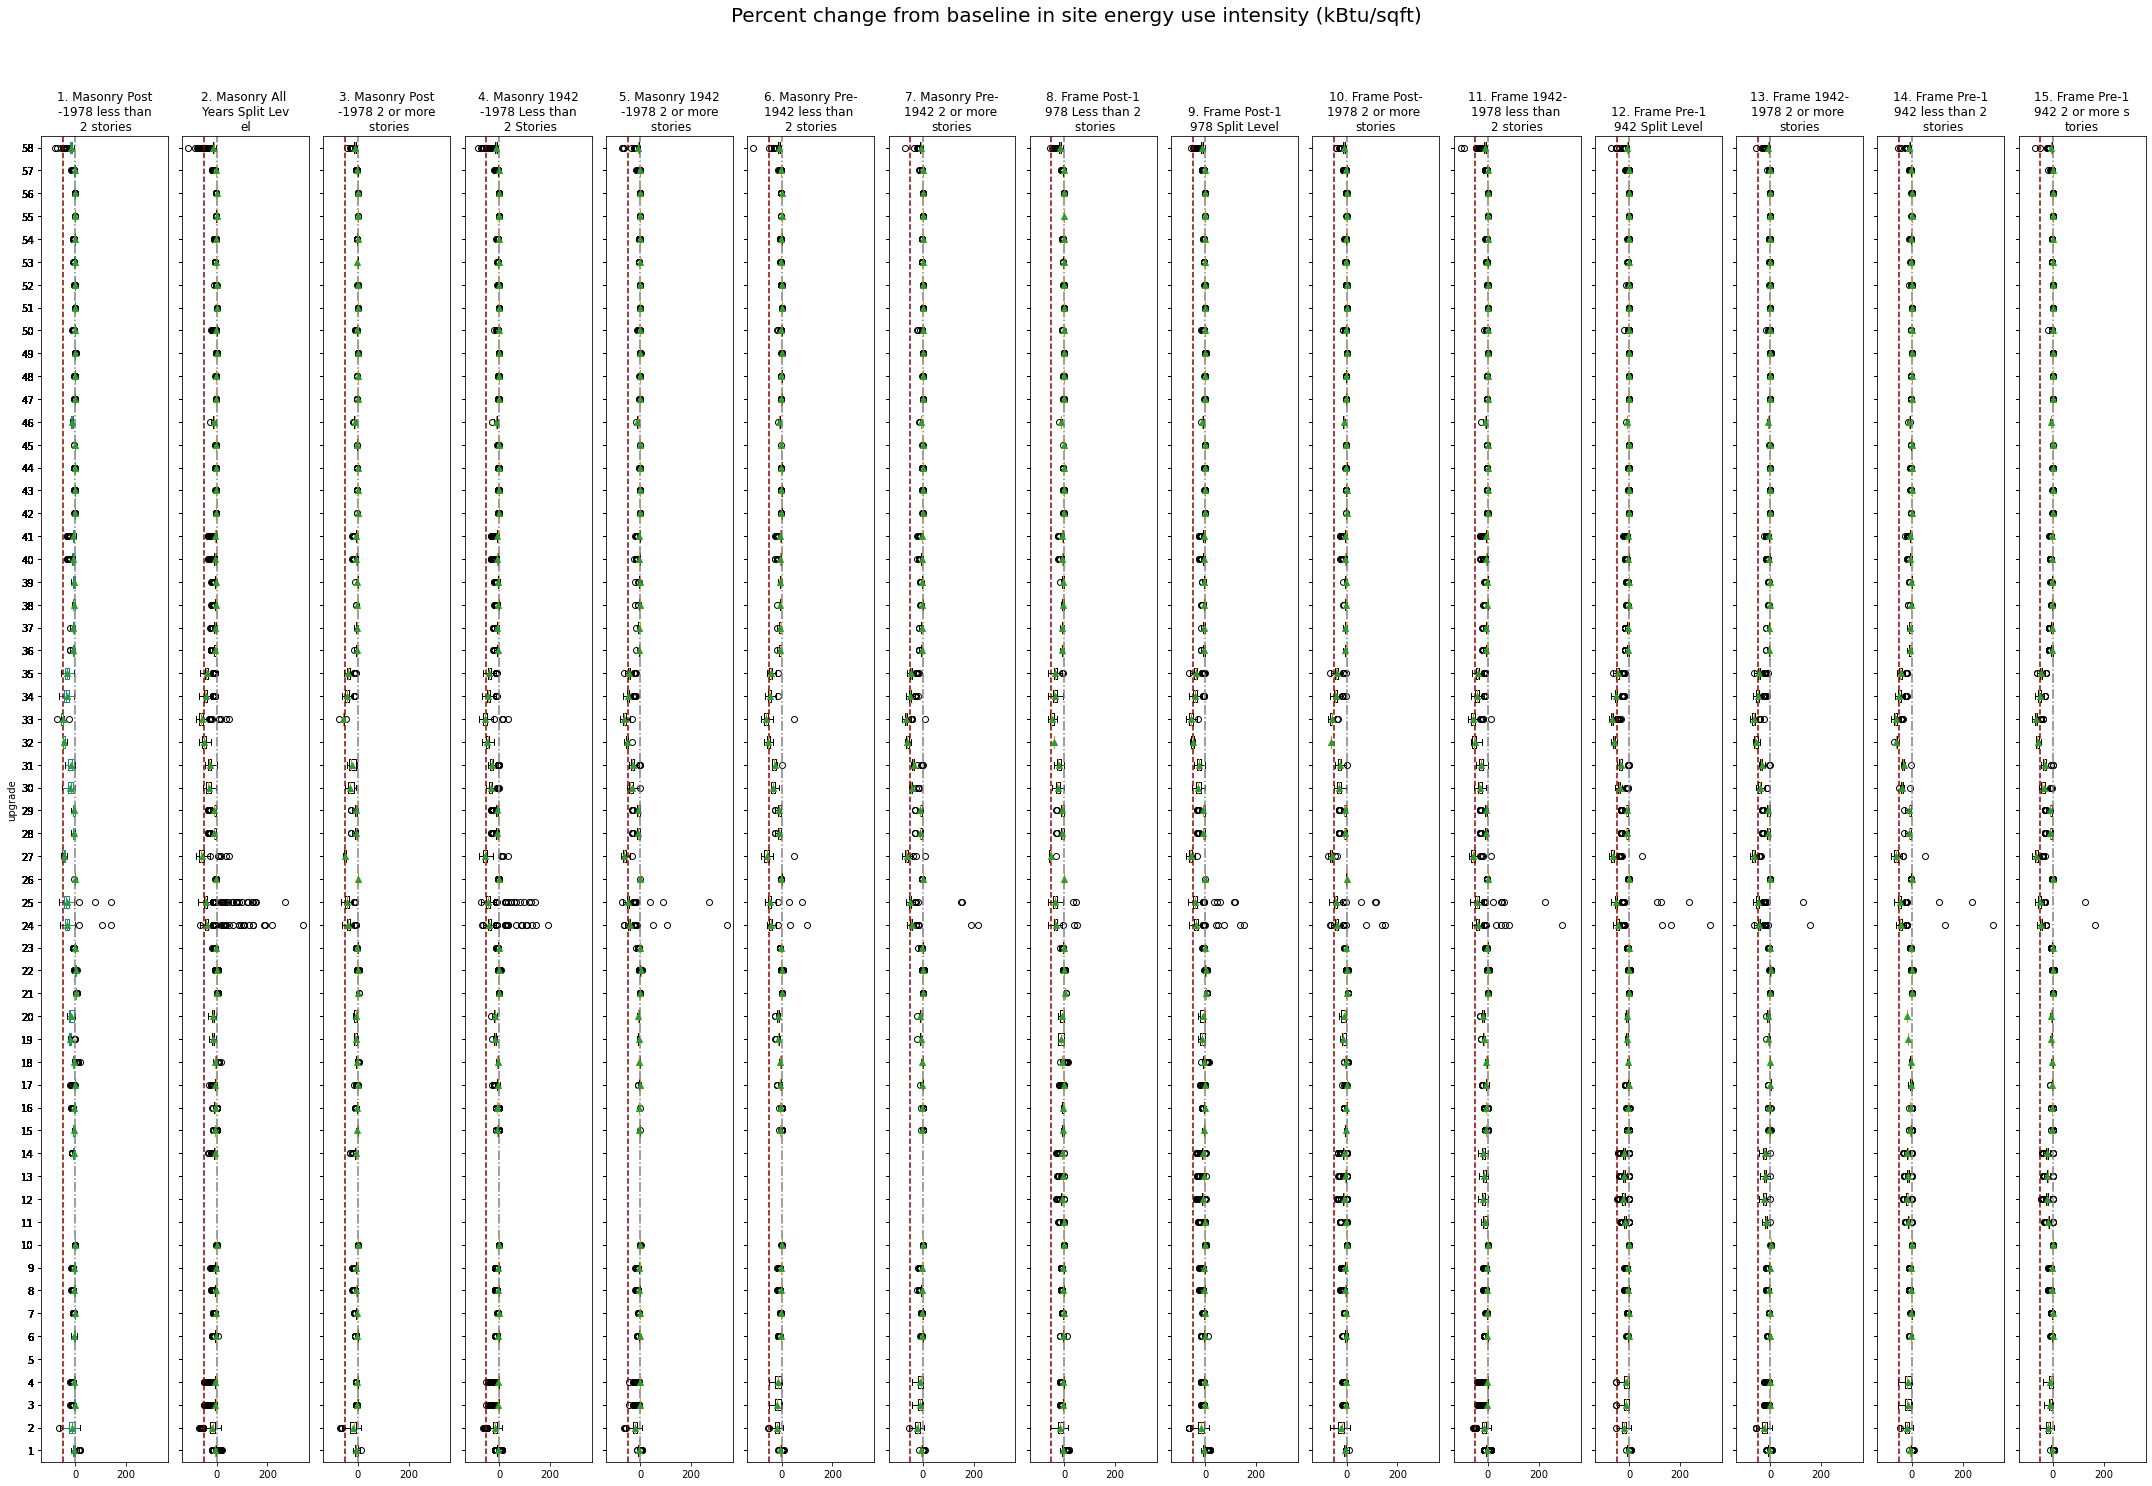

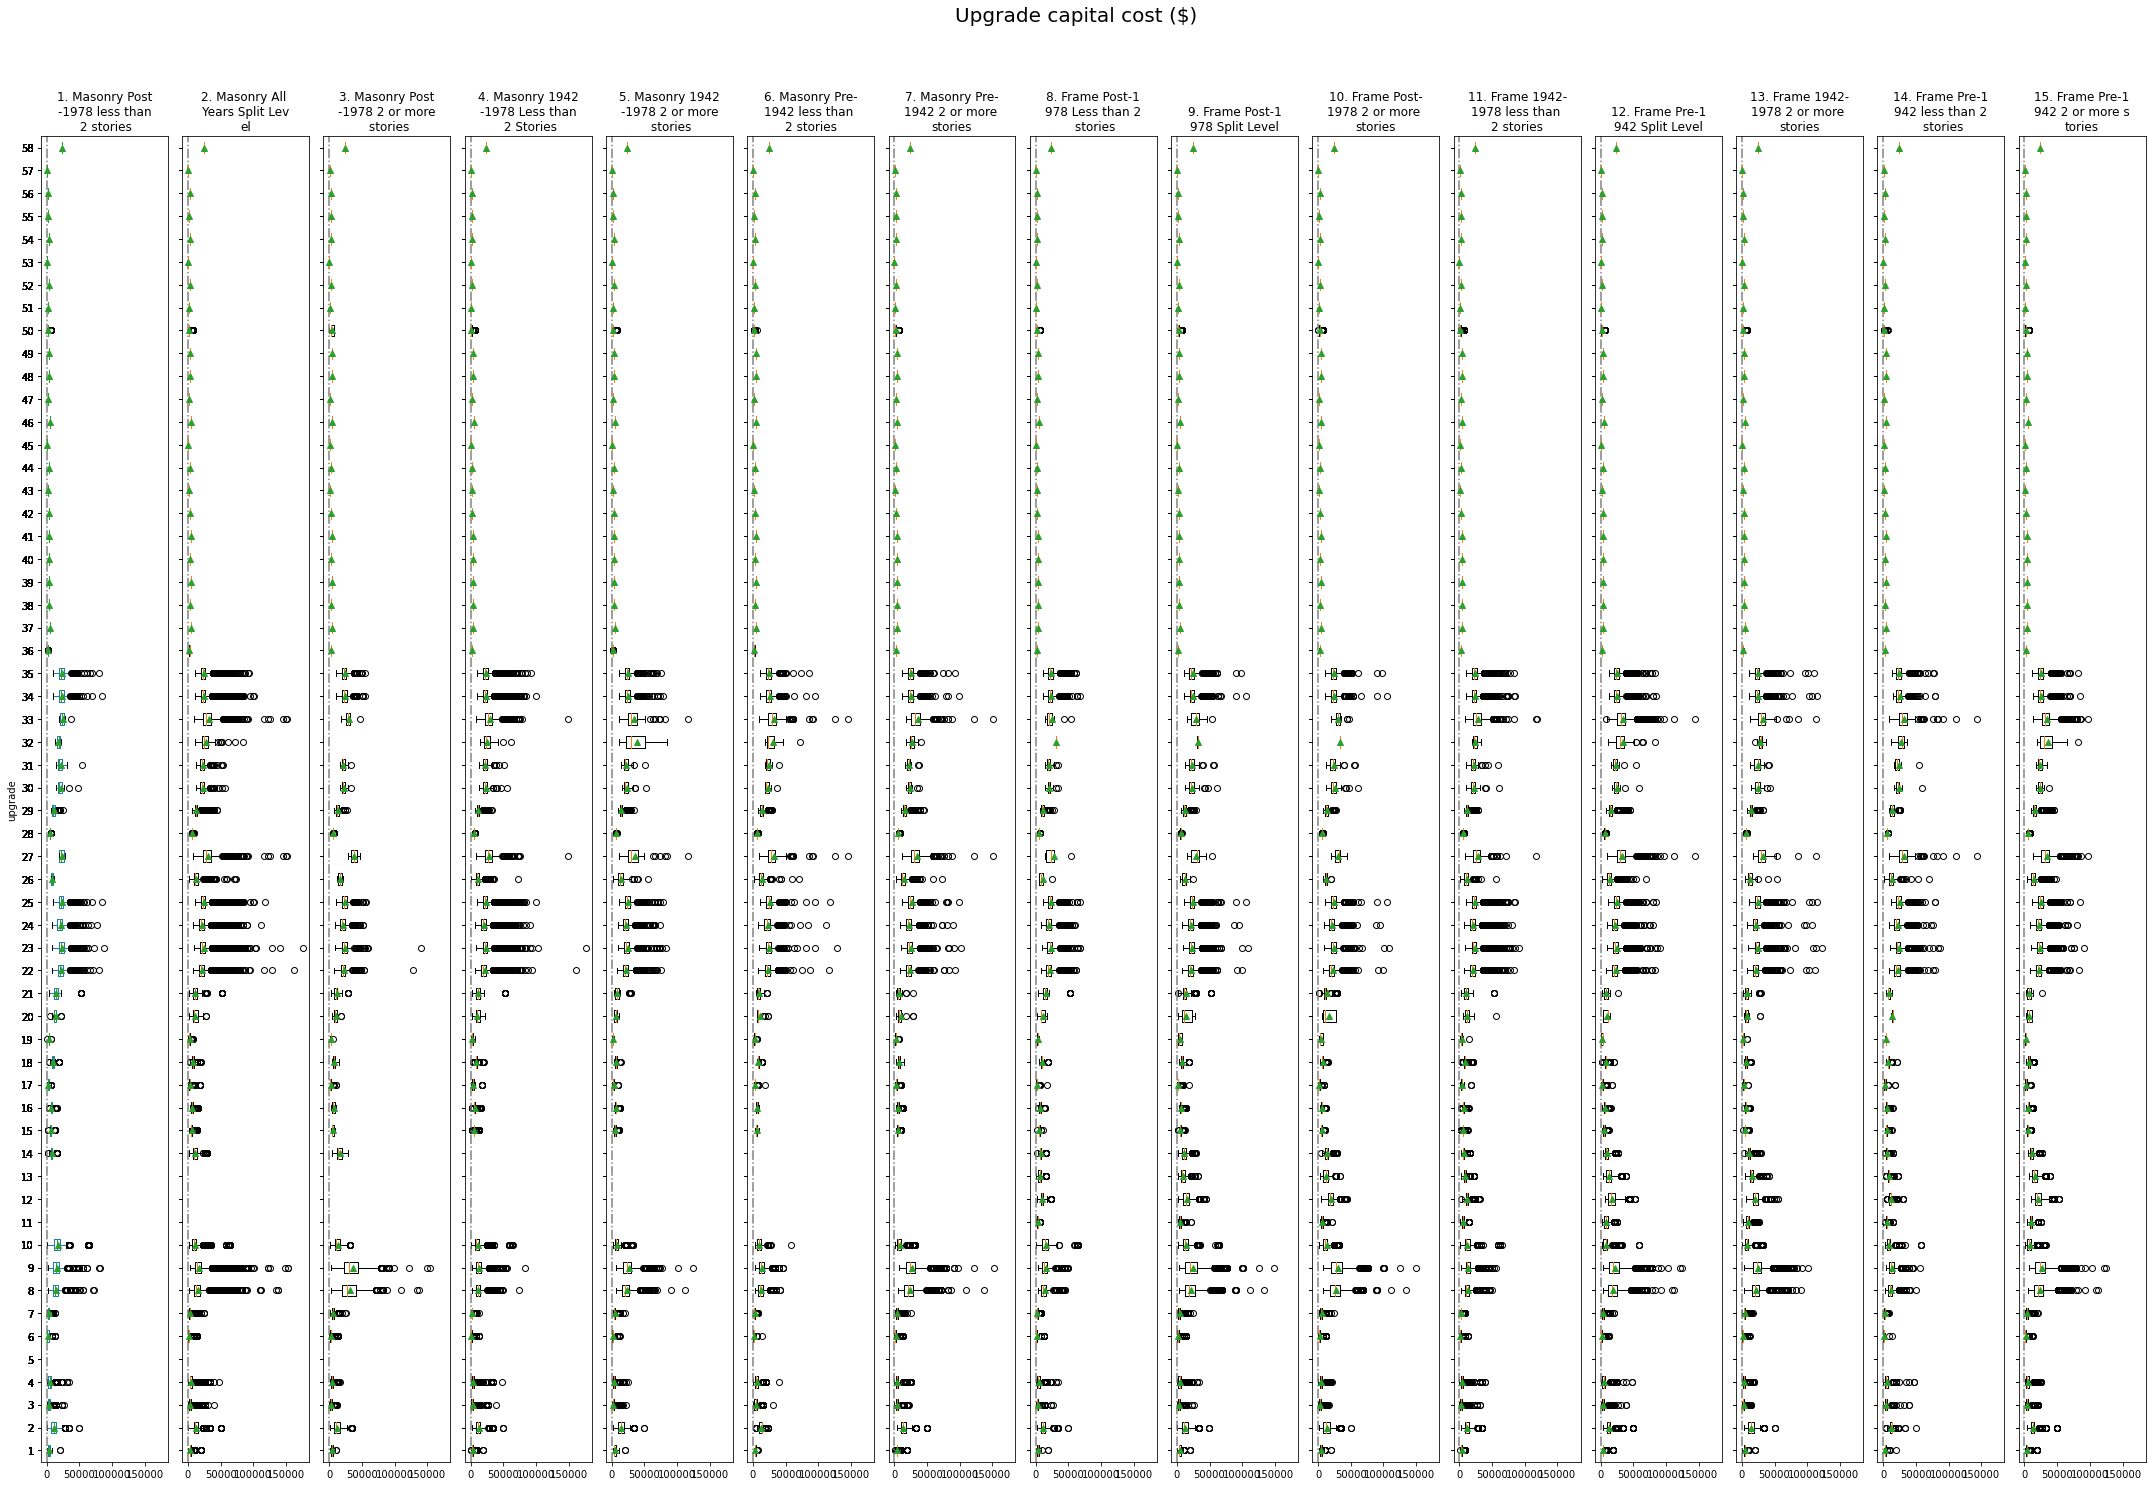

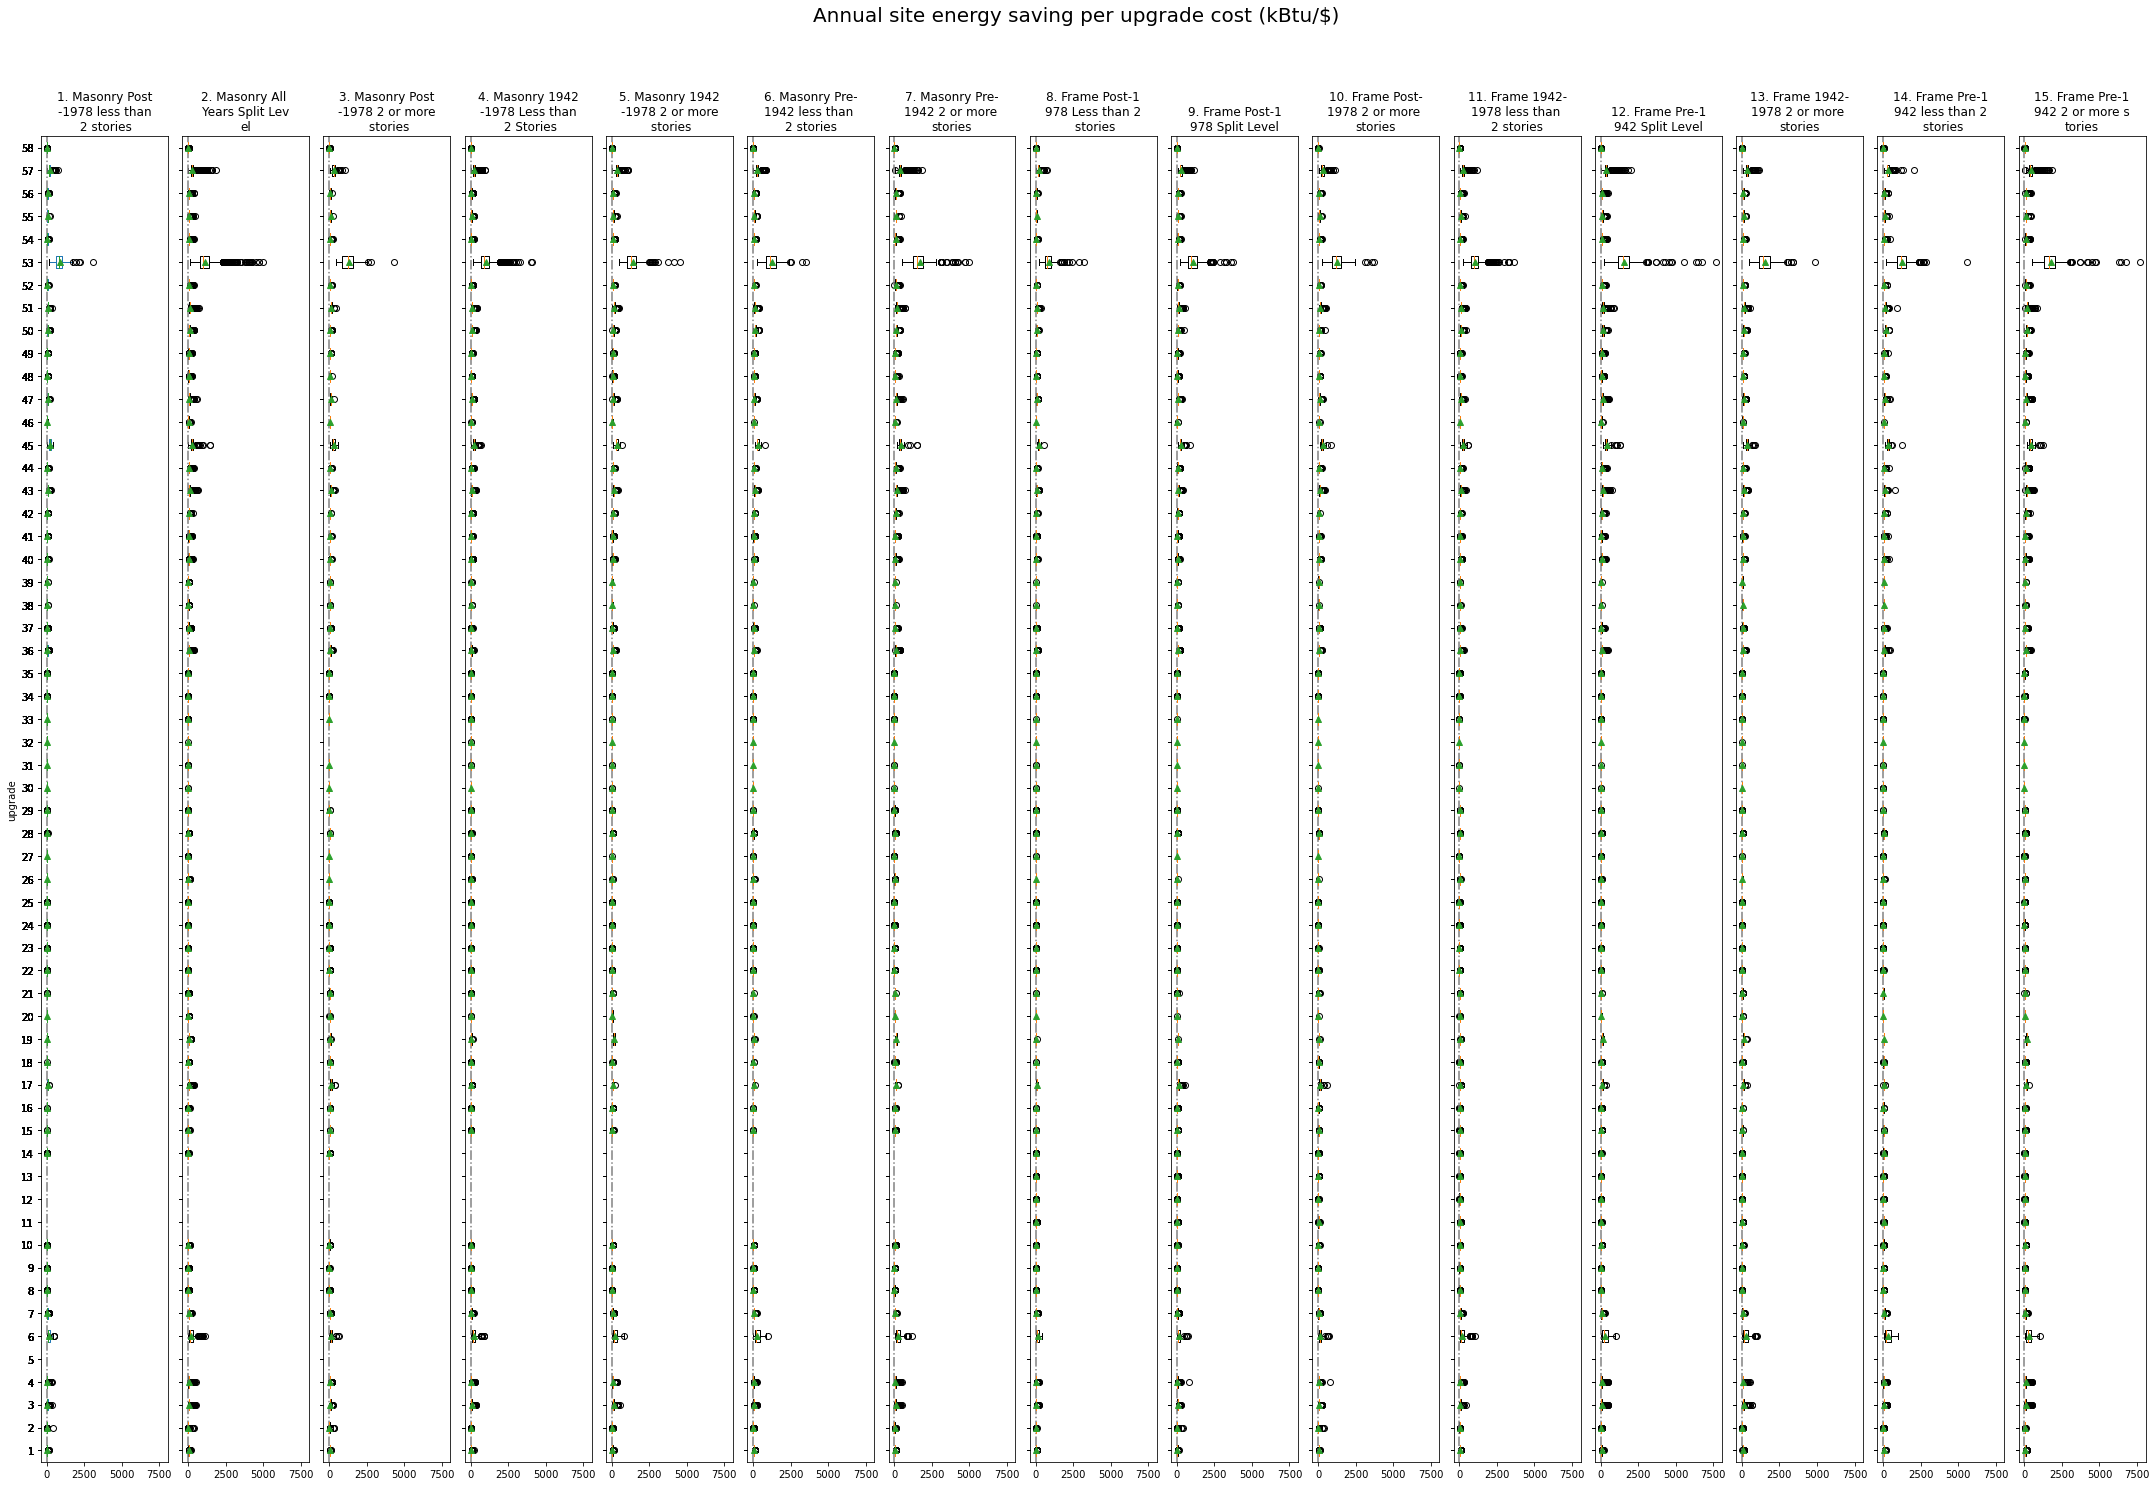

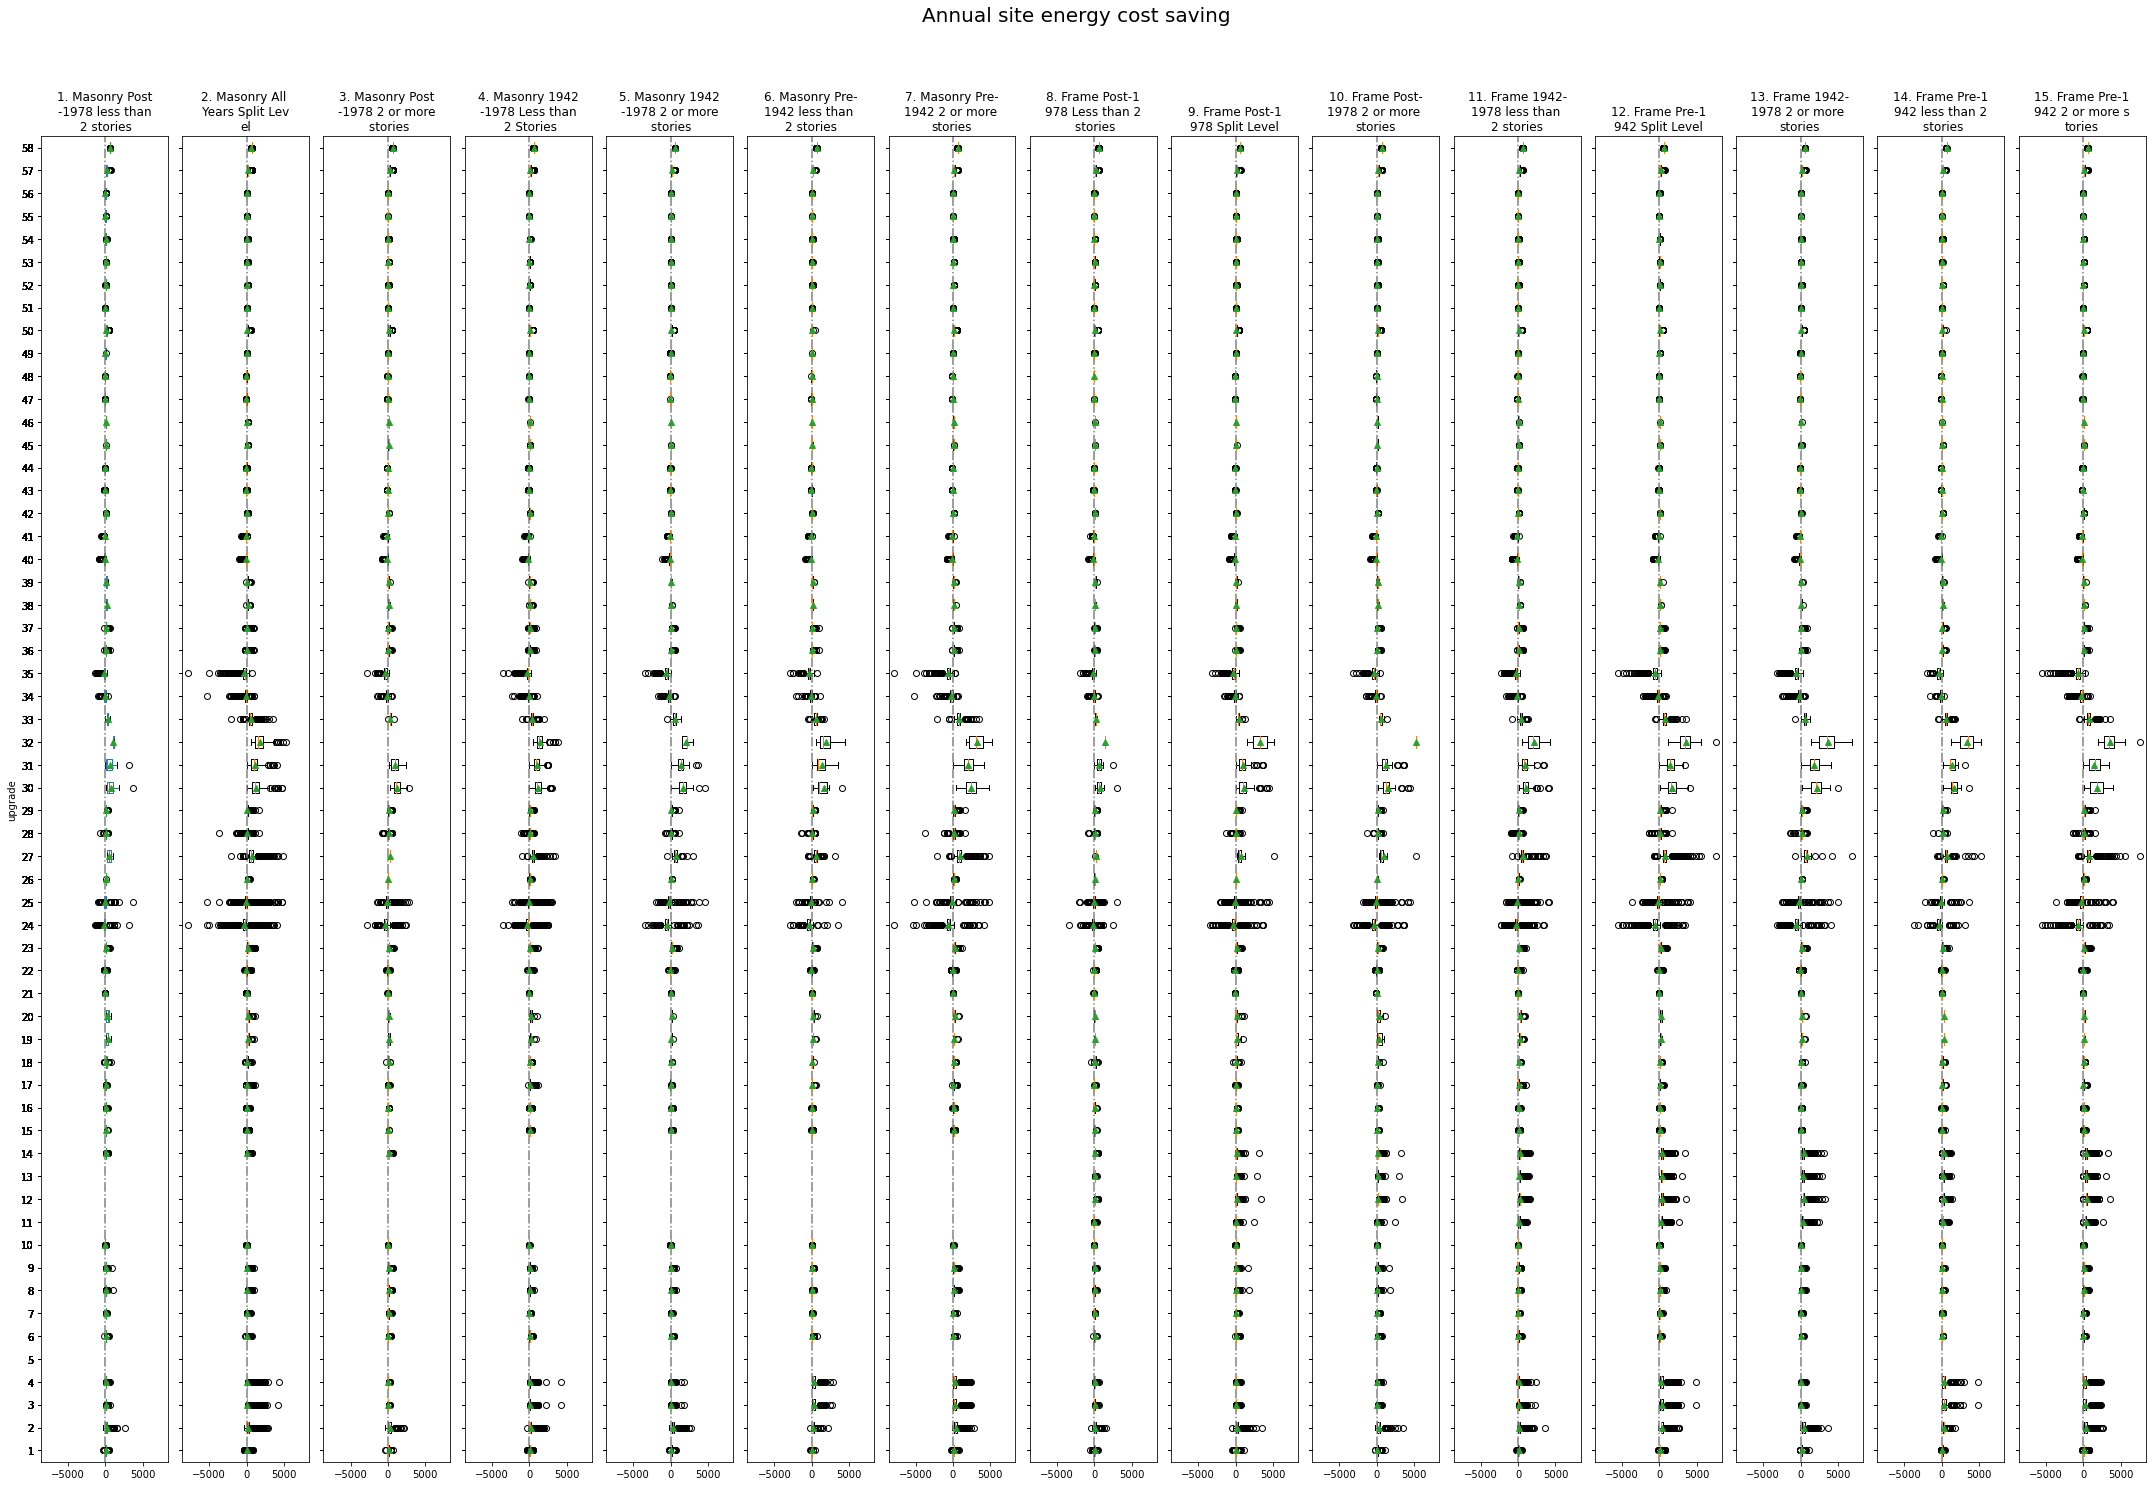

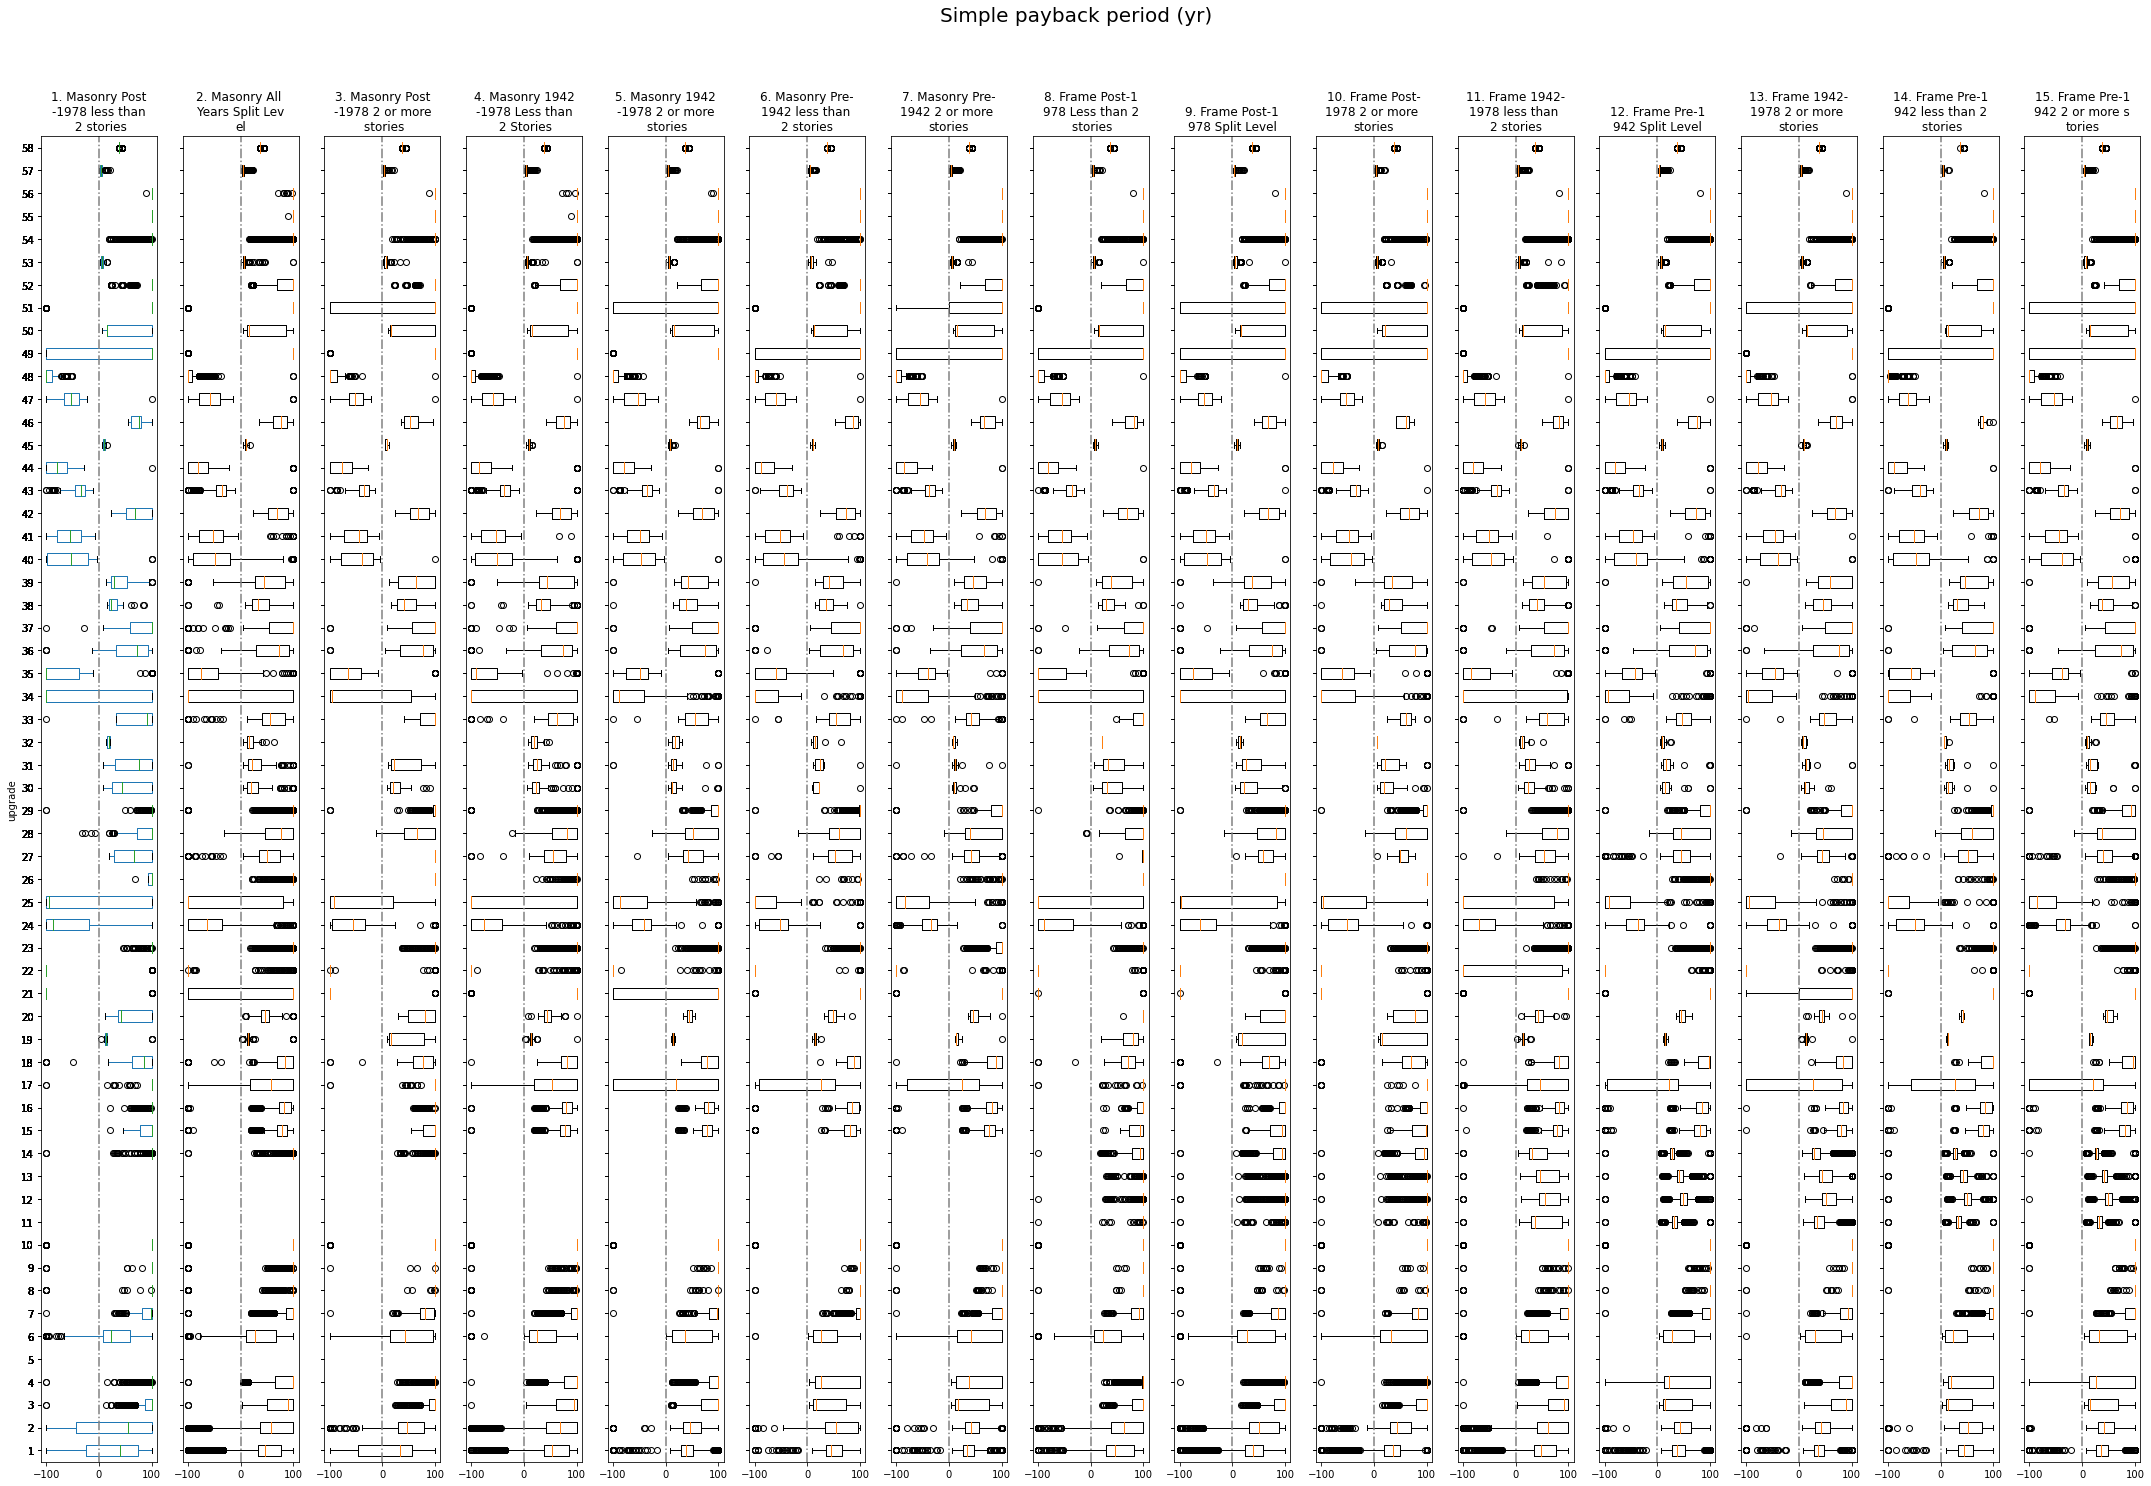

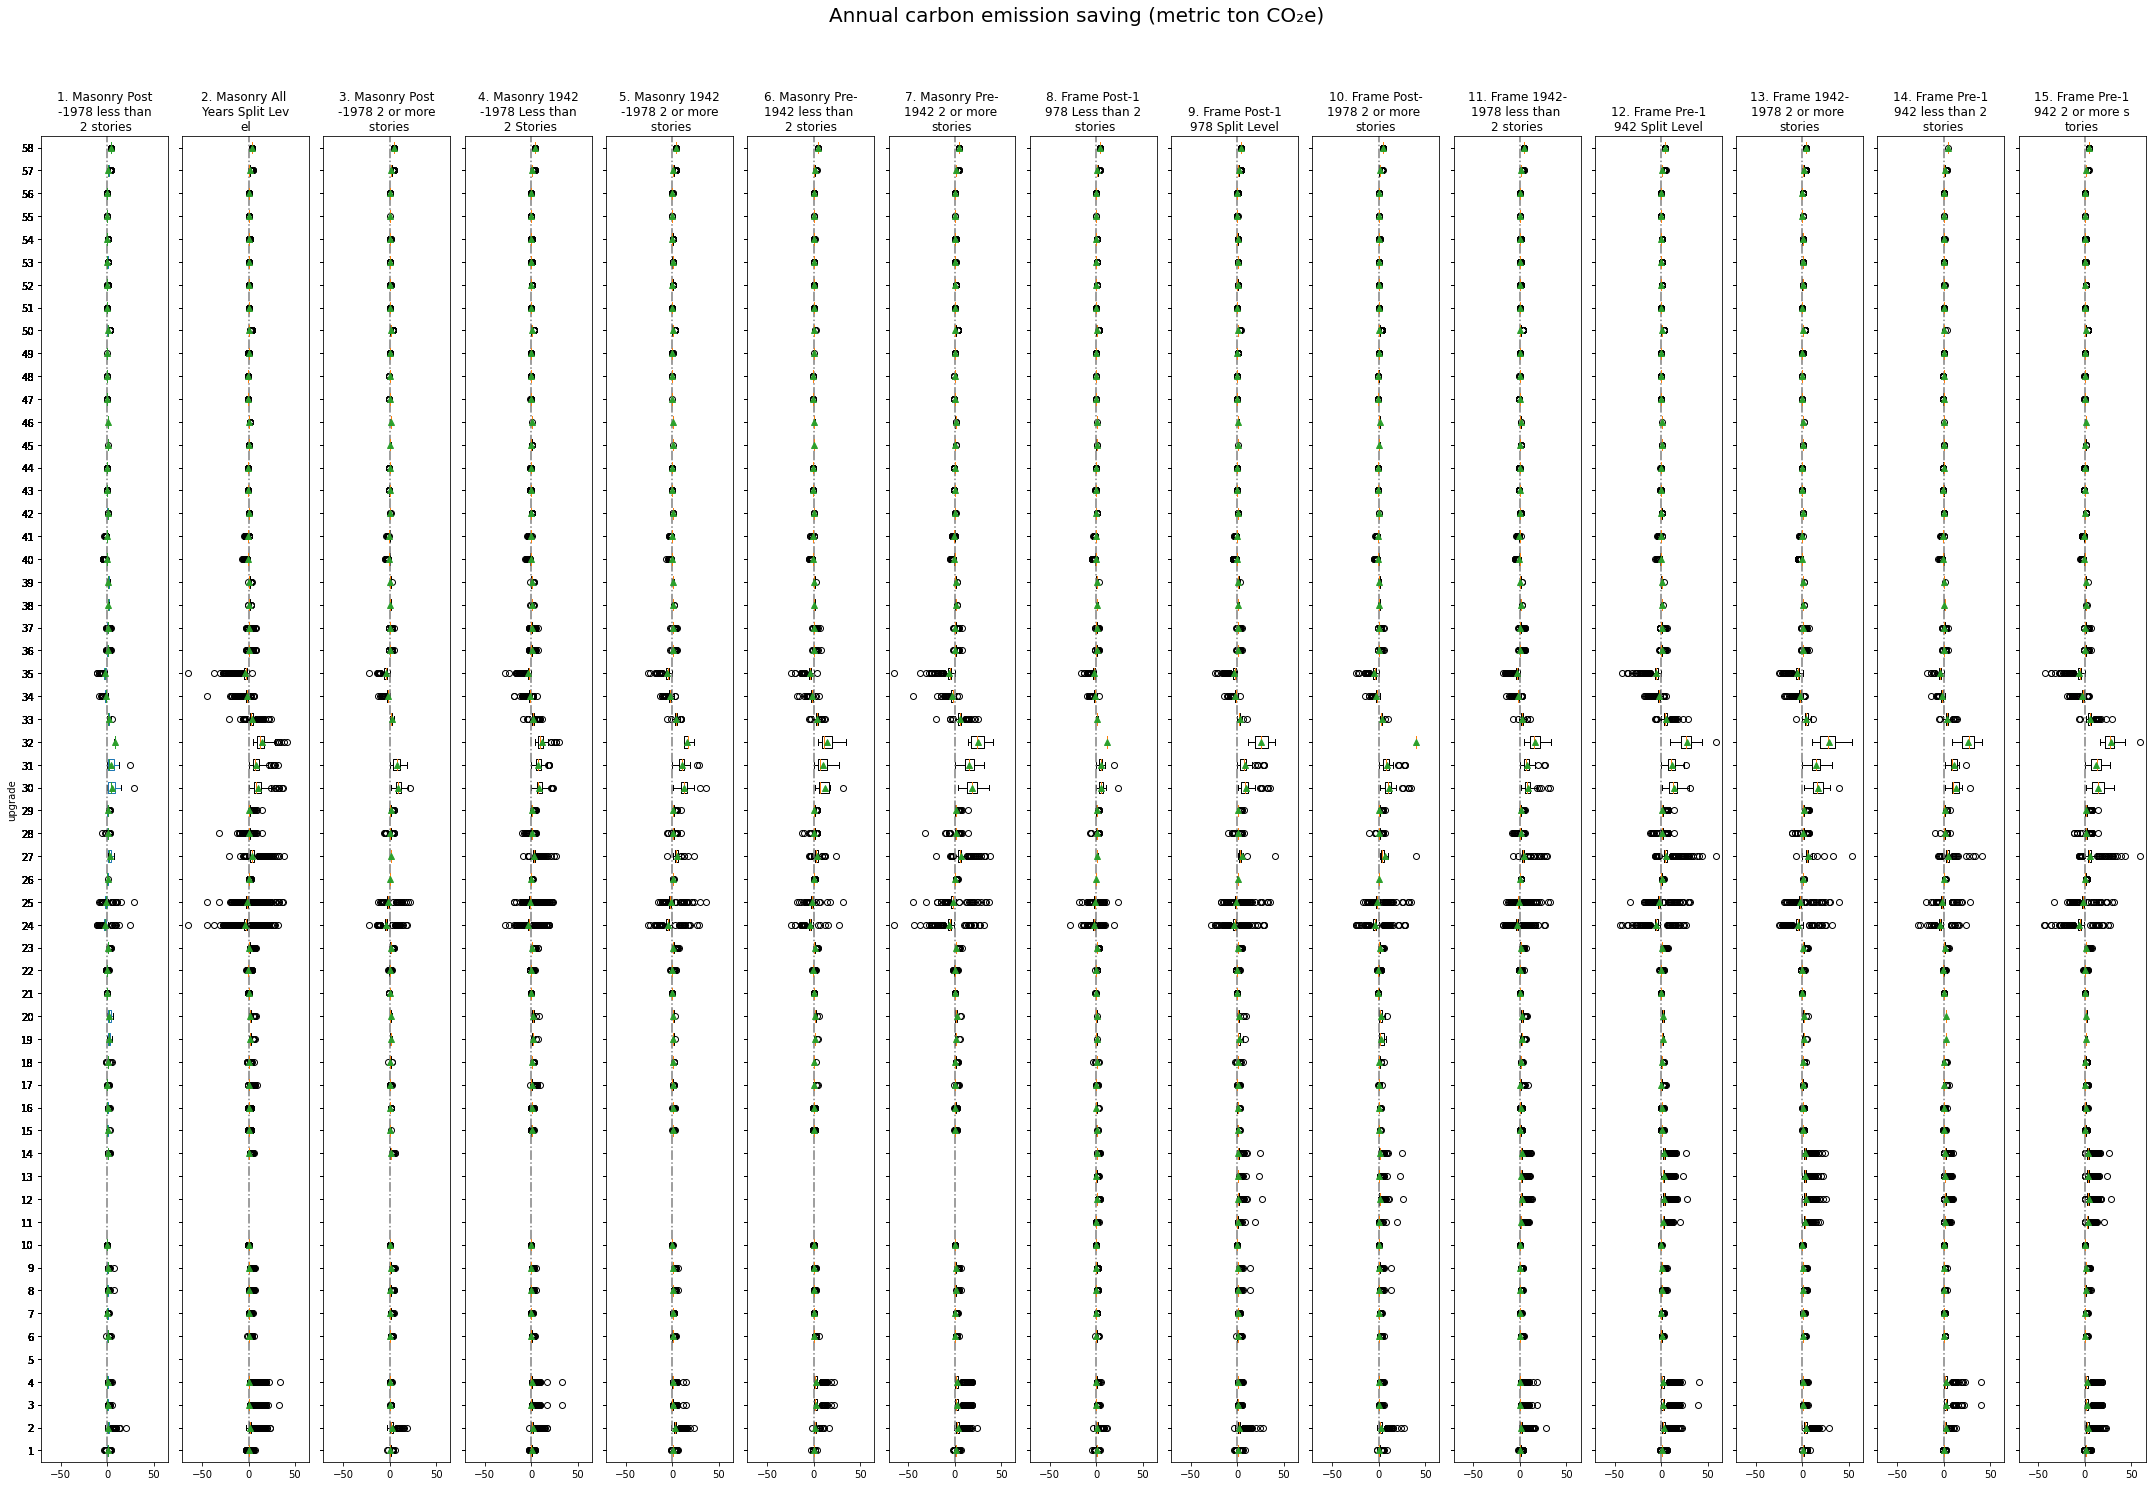

In [125]:
### other metrics to consider:
# energy savings per dollar (gas, elec)
# carbon savings (require timeseries results)

# create subfolder for plots:
plot_path4 = os.path.join(plot_path, 'distribution_by_prototype')
if not os.path.exists(plot_path4):
    os.mkdir(plot_path4)
print(f'plot dir: {plot_path4}\n')

title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'

## modifying payback periods, cap either ends at [100,-100] 
all_proto_upgrades.loc[(all_proto_upgrades[all_proto_upgrades['simple_payback']>100]).index,
                       'simple_payback'] = 100
all_proto_upgrades.loc[(all_proto_upgrades[all_proto_upgrades['simple_payback']<-100]).index,
                       'simple_payback'] = -100

if NG_rate_multiplier == 1:
    para_labels = {
        'pct_delta_gas_eui': 'Percent change from baseline in gas use intensity (therm/sqft)',
        'pct_delta_elec_eui': 'Percent change from baseline in electricity use intensity (kWh/sqft)',
        'pct_delta_site_eui': 'Percent change from baseline in site energy use intensity (kBtu/sqft)',
        'upgrade_cost': 'Upgrade capital cost ($)',
        'ann_kbtu_saved_per_dollar': 'Annual site energy saving per upgrade cost (kBtu/$)',
        'ann_energy_cost_saving': f'Annual site energy cost saving{title_ext}',
        'simple_payback': f'Simple payback period (yr){title_ext}',
        'ann_metric_ton_co2e_saving': f'Annual carbon emission saving (metric ton CO₂e)',
    }
else:
    para_labels = {
        'ann_energy_cost_saving': f'Annual site energy cost saving{title_ext}',
        'simple_payback': f'Simple payback period (yr){title_ext}',
    }

cols_to_match = list(f'upg{str(i).zfill(2)}' for i in range(1,N_upgrades+1))

for i, para_to_plot in enumerate(para_labels.keys(),1):
    
    print(f'>> {i}. plotting {para_to_plot}...')
    xmin = all_proto_upgrades[para_to_plot].min(); xmax = all_proto_upgrades[para_to_plot].max()
    
    fig, axes = plt.subplots(ncols=15, nrows=1, sharex=True, sharey=True, figsize=(30, 20))
    for h in range(1,16):
        ax = axes[h-1]
        p = all_proto_upgrades.query('HousingGroupNo==@h')[['HousingGroupNo','HousingGroupName',
                                                            'upgrade_no', para_to_plot]]
        lab = f'{p["HousingGroupNo"].iloc[0]}. {p["HousingGroupName"].iloc[0]}'
        lab = '\n'.join([lab[i:i+15] for i in range(0, len(lab), 15)]) # break up long string
        p.loc[:,'upgrade_no'] = 'upg'+p['upgrade_no'].astype(str).str.zfill(2)
        p = p.sort_values(by='upgrade_no')
        p = p.set_index([p.index, 'upgrade_no'])[
            para_to_plot].unstack(level=-1).dropna(
            axis=0, how='all')

        ### show all upgrades
        for col in set(cols_to_match)-set(p.columns):
            p[col] = np.nan
        p = p.sort_index(axis=1)
        
        if para_to_plot == 'simple_payback':
            showmeans = False
        else:
            showmeans = True
            
        try:
            p.boxplot(ax=ax, vert=False, grid=False, showmeans=showmeans)
        except:
            pass

        ax.set_title(lab)
        if h==1:
            ax.set_ylabel('upgrade')
        ax.axvline(x=0, linestyle='-.', color='gray')
        if (para_to_plot[-3:]=='eui') & (xmin < -50):
            ax.axvline(x=-50, linestyle='--', color='darkred') 
        
    para_label = para_labels[para_to_plot]
    fig.suptitle(para_label, fontsize=20, y=1.03)
    plt.tight_layout()
    
    filename = os.path.join(plot_path4, f'{iter_path}-distribution_{para_to_plot}{fn_ext}.pdf')
    fig.savefig(filename, bbox_inches='tight')


### 3. Optional: Useful aggregations for diagnosis

### Add additional metrics to ResStock results

In [69]:
### get sqft distr by building type and vintage
res_sqft_distr = res.groupby(['build_existing_model.geometry_building_type_recs', 'build_existing_model.vintage_acs',
    'build_existing_model.geometry_floor_area'])['building_id'].count().to_frame()

# normalize
res_sqft_distr = res_sqft_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=2)

# export
res_sqft_distr.to_csv(os.path.join(result_path, 'baseline', 'building_type_vintage_floor_area.csv'), index=True)
print('sqft distr by vintage & bldg type exported')


sqft distr by vintage & bldg type exported


In [73]:
### get foundation type distr by building type, vintage (EE prototype)
print('>> prevalence')
res_found_distr = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage_ee', 'stories',
    'build_existing_model.geometry_foundation_type'])['building_id'].count().to_frame()

# normalize
res_found_distr = res_found_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=-1)
display(res_found_distr)

print('\n>> gas usage')
res_found_gas = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage_ee', 'stories',
    'build_existing_model.geometry_foundation_type'])[
    'simulation_output_report.total_site_natural_gas_therm'].mean().to_frame()
res_found_gas.unstack(level=-1)


>> prevalence


build_existing_model.geometry_foundation_type                          Crawl  \
build_existing_model.geometry_wall_type vintage_ee   stories                   
Masonry                                 1: pre-1942  1: <2 stories  0.067395   
                                                     2: 2+ stories  0.085610   
                                        2: 1942-1978 1: <2 stories  0.118911   
                                                     2: 2+ stories  0.013690   
                                        3: post-1978 1: <2 stories  0.102585   
                                                     2: 2+ stories  0.077565   
WoodStud                                1: pre-1942  1: <2 stories  0.050282   
                                                     2: 2+ stories  0.123120   
                                        2: 1942-1978 1: <2 stories  0.106988   
                                                     2: 2+ stories  0.043855   
                                        3: post-1978 1: <2 stories  0.075724   
                                                     2: 2+ stories  0.073497   

build_existing_model.geometry_foundation_type                       Heated Basement  \
build_existing_model.geometry_wall_type vintage_ee   stories                          
Masonry                                 1: pre-1942  1: <2 stories         0.141469   
                                                     2: 2+ stories         0.163327   
                                        2: 1942-1978 1: <2 stories         0.381566   
                                                     2: 2+ stories         0.058580   
                                        3: post-1978 1: <2 stories         0.206005   
                                                     2: 2+ stories         0.156797   
WoodStud                                1: pre-1942  1: <2 stories         0.093985   
                                                     2: 2+ stories         0.163534   
                                        2: 1942-1978 1: <2 stories         0.239759   
                                                     2: 2+ stories         0.089398   
                                        3: post-1978 1: <2 stories         0.154417   
                                                     2: 2+ stories         0.195991   

build_existing_model.geometry_foundation_type                       Pier and Beam  \
build_existing_model.geometry_wall_type vintage_ee   stories                        
Masonry                                 1: pre-1942  1: <2 stories       0.011536   
                                                     2: 2+ stories       0.009107   
                                        2: 1942-1978 1: <2 stories       0.014963   
                                                     2: 2+ stories       0.001273   
                                        3: post-1978 1: <2 stories       0.019183   
                                                     2: 2+ stories       0.011676   
WoodStud                                1: pre-1942  1: <2 stories       0.001410   
                                                     2: 2+ stories       0.003759   
                                        2: 1942-1978 1: <2 stories       0.018795   
                                                     2: 2+ stories       0.008434   
                                        3: post-1978 1: <2 stories       0.005197   
                                                     2: 2+ stories       0.008909   

build_existing_model.geometry_foundation_type                           Slab  \
build_existing_model.geometry_wall_type vintage_ee   stories                   
Masonry                                 1: pre-1942  1: <2 stories  0.034608   
                                                     2: 2+ stories  0.051002   
                                        2: 1942-1978 1: <2 stories  0.178606   
                                                     2: 2+ stories  0


>> gas usage


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.geometry_foundation_type                                                                      Crawl   
build_existing_model.geometry_wall_type vintage_ee   stories                                                               
Masonry                                 1: pre-1942  1: <2 stories                                        1940.461603      
                                                     2: 2+ stories                                        2458.390036      
                                        2: 1942-1978 1: <2 stories                                        1569.225704      
                                                     2: 2+ stories                                        2085.599435      
                                        3: post-1978 1: <2 stories                                         997.958444      
                                                     2: 2+ stories                                        1465.916083      
WoodStud                                1: pre-1942  1: <2 stories                                        1832.262789      
                                                     2: 2+ stories                                        2339.902964      
                                        2: 1942-1978 1: <2 stories                                        1563.475069      
                                                     2: 2+ stories                                        2059.848575      
                                        3: post-1978 1: <2 stories                                        1106.906242      
                                                     2: 2+ stories                                        1749.793063      

                                                                                    \
build_existing_model.geometry_foundation_type                      Heated Basement   
build_existing_model.geometry_wall_type vintage_ee   stories                         
Masonry                                 1: pre-1942  1: <2 stories      927.833921   
                                                     2: 2+ stories     1610.622552   
                                        2: 1942-1978 1: <2 stories      849.796824   
                                                     2: 2+ stories     1435.606517   
                                        3: post-1978 1: <2 stories      613.756635   
                                                     2: 2+ stories     1130.098897   
WoodStud                                1: pre-1942  1: <2 stories     1073.996908   
                                                     2: 2+ stories     1659.683948   
                                        2: 1942-1978 1: <2 stories      861.448258   
                                                     2: 2+ stories     1541.657212   
                                        3: post-1978 1: <2 stories      661.310294   
                                                     2: 2+ stories     1143.715722   

                                                                                  \
build_existing_model.geometry_foundation_type                      Pier and Beam   
build_existing_model.geometry_wall_type vintage_ee   stories                       
Masonry                                 1: pre-1942  1: <2 stories   1993.172841   
                                                     2: 2+ stories   2648.913123   
                                        2: 1942-1978 1: <2 stories   1795.871929   
                                                     2: 2+ stories   2183.880144   
                                        3: post-1978 1: <2 stories   1517.001083   
                                                     2: 2+ stories   2047.359080   
WoodStud                                1: pre-1942  1: <2 stories   2367.532625   
                                                     2: 2+ stories   2506.8

In [78]:
res[(res['completed_status']=="Success") &
    (res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached")
   ].groupby(['build_existing_model.vintage', 'build_existing_model.geometry_stories'])[
    'simulation_output_report.total_site_natural_gas_therm','gas_eui', 
    'simulation_output_report.total_site_electricity_kwh', 'elec_eui','sqft'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.vintage build_existing_model.geometry_stories                                                          
1940s                        1                                                                            1165.567346       
                             2                                                                            1663.586278       
                             3                                                                            2902.876088       
1950s                        1                                                                            1151.998294       
                             2                                                                            1758.102403       
                             3                                                                            2356.456906       
1960s                        1                                                                            1210.069079       
                             2                                                                            1803.041217       
                             3                                                                            2253.285793       
1970s                        1                                                                            1085.069685       
                             2                                                                            1568.397085       
                             3                                                                            1992.237307       
1980s                        1                                                                            1023.246750       
                             2                                                                            1562.276096       
                             3                                                                            2130.240485       
1990s                        1                                                                             959.363511       
                             2                                                                            1459.369301       
                             3                                                                            2122.163827       
2000s                        1                                                                             744.748035       
                             2                                                                            1074.057426       
                             3                                                                            1340.696042       
2010s                        1                                                                             651.038006       
                             2                                                                            1200.248688       
                             3                                                                            1918.241436       
<1940                        1                                                                            1480.098034       
                             2                                                                            2005.382117       
                             3                                                                            2718.633120       

                                                                     gas_eui  \
build_existing_model.vintage build_existing_model.geometry_stories             
1940s                        1                                      0.785852   
                             2                                      0.897455   
                             3                                      1.158714   
1950s                        1            